# Auditory Perceptual Framing Analysis Script (2021). Click discrimination task.
## Pupil info extract

# 0.  Load pupil data participants


In [26]:
# Select participants
#select_subj = [2] 
#choiceNameFrames = list()

#for i in np.arange(len(select_subj)):
choiceNameFrames1 = glob.glob('/Volumes/BdMLab2021/Prady_backup/pupilPEB2021/Pilots Clicks/pupil data/Output/eyeData_pilots_1_24_blinkSacc_XYinfo_100hz.txt')

In [27]:
choiceNameFrames1

['/Volumes/BdMLab2021/Prady_backup/pupilPEB2021/Pilots Clicks/pupil data/Output/eyeData_pilots_1_24_blinkSacc_XYinfo_100hz.txt']

# Modify input so it can constructed as dataframe

In [28]:
# replace elements in txt to allow separation to dataframe
f1 = open(choiceNameFrames1[0], 'r')
f2 = open('/Volumes/BdMLab2021/Prady_backup/pupilPEB2021/Pilots Clicks/pupil data/Output/eye_info_report_fix_blink_100Hz.txt', 'w')
for line in f1:
    if line.find('TRACKER_TIME')>-1:
        tracker_idx = line.find('TRACKER_TIME')
        semicol_idx = line.find(';')
        
        if semicol_idx>-1: # if there is a semicolon, i.e. there is another event in the line, delete an leave the other event
            to_remove = line[tracker_idx:semicol_idx+1]
            line = line.replace(to_remove, '')
        else: # if there us only a tracker event
            to_remove = line[tracker_idx:tracker_idx+27]
            line = line.replace(to_remove, '.')

        #remove lines that cause trouble for inclusion in dataframe later
        print('Changed LINE')
        print(line)
        
        f2.write(line)

    else:
        if '!MODE RECORD CR 500 2 1 R' in line:
            f2.write(line.replace('!MODE RECORD CR 500 2 1 R', '!MODE_RECORD_CR_500_2_1_R'))
        else:
            f2.write(line.replace('!MODE RECORD CR 500 2 1 L', '!MODE_RECORD_CR_500_2_1_L'))

f1.close()
f2.close()

Changed LINE
Pilot21	1	.	2487.00	SLIDER_KEYB_ACCEPT	873033.00	785313	.	0	529.50	336.10	.	.

Changed LINE
Pilot21	6	.	2537.00	TIMER_SND	1006275.00	1003205	.	0	524.60	359.00	.	.

Changed LINE
Pilot21	10	.	1565.00	SLIDER_KEYB_L	1066517.00	1059077	.	0	684.30	605.10	.	.

Changed LINE
Pilot21	12	.	2585.00	SND_CHOICE	1128252.00	1123332	.	0	524.00	423.50	.	.

Changed LINE
Pilot21	15	.	1646.00	FIRST_SOUND_R	1188774.00	1186674	.	0	469.20	328.20	.	.

Changed LINE
Pilot21	19	.	1093.00	SLIDER_KEYB_ACCEPT	1248800.00	1237520	.	0	526.90	700.40	.	.

Changed LINE
Pilot21	29	.	886.00	FIRST_SOUND_R	1441316.00	1439226	.	0	533.50	389.10	.	.

Changed LINE
Pilot21	36	.	2332.00	.	1575792.00	1569162	.	0	512.40	411.30	.	.

Changed LINE
Pilot21	40	.	1019.00	FIRST_SOUND_R	1636280.00	1634190	.	0	524.00	305.50	.	.

Changed LINE
Pilot21	48	.	1542.00	.	1757804.00	1755734	.	0	494.70	281.20	.	.

Changed LINE
Pilot21	52	.	2063.00	FIRST_SOUND_R	1818360.00	1816270	.	0	475.20	331.00	.	.

Changed LINE
Pilot21	60	.	2175.00	.	

# Load modified pupil info

In [29]:
pupilDF1 = glob.glob('/Volumes/BdMLab2021/Prady_backup/pupilPEB2021/Pilots Clicks/pupil data/Output/eye_info_report_fix_blink_100Hz.txt')
pupilInfo = pd.read_csv(pupilDF1[0],sep='\t')

/Users/pradyumna/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3170: DtypeWarning: Columns (6,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [30]:
pupilInfo

,RECORDING_SESSION_LABEL,TRIAL_INDEX,RIGHT_PUPIL_SIZE,LEFT_PUPIL_SIZE,SAMPLE_MESSAGE,TIMESTAMP,IP_START_TIME,RIGHT_IN_SACCADE,LEFT_IN_SACCADE,LEFT_GAZE_X,LEFT_GAZE_Y,RIGHT_GAZE_X,RIGHT_GAZE_Y
0,Pilot21,1,.,2747.00,!MODE_RECORD_CR_500_2_1_L,785313.0,785313,.,0,507.30,365.00,.,.
1,Pilot21,1,.,2758.00,.,785323.0,785313,.,0,508.80,363.40,.,.
2,Pilot21,1,.,2770.00,.,785333.0,785313,.,0,510.10,361.10,.,.
3,Pilot21,1,.,2788.00,.,785343.0,785313,.,0,511.30,358.70,.,.
4,Pilot21,1,.,2790.00,.,785353.0,785313,.,0,512.20,358.90,.,.
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4585380,Pilot23,200,.,1827.00,.,7078301.0,7069421,.,0,768.30,656.40,.,.
4585381,Pilot23,200,.,1835.00,.,7078311.0,7069421,.,0,767.70,652.80,.,.
4585382,Pilot23,200,.,1845.00,SLIDER_KEYB_ACCEPT,7078321.0,7069421,.,0,767.70,653.30,.,.
4585383,Pilot23,200,.,1848.00,.,7078331.0,7069421,.,0,767.70,652.00,.,.


---------------------------

# 1. Preliminar analysis 

# reject participants 

In [31]:
#rej_part = ['pilot3']
#rej_part = ['Pilot2','pilot3','pilot5']
rej_part = []


In [32]:
for j in rej_part:
    pupilInfo = pupilInfo.loc[(pupilInfo['RECORDING_SESSION_LABEL'] !=  j)]

In [33]:
pupilInfo

,RECORDING_SESSION_LABEL,TRIAL_INDEX,RIGHT_PUPIL_SIZE,LEFT_PUPIL_SIZE,SAMPLE_MESSAGE,TIMESTAMP,IP_START_TIME,RIGHT_IN_SACCADE,LEFT_IN_SACCADE,LEFT_GAZE_X,LEFT_GAZE_Y,RIGHT_GAZE_X,RIGHT_GAZE_Y
0,Pilot21,1,.,2747.00,!MODE_RECORD_CR_500_2_1_L,785313.0,785313,.,0,507.30,365.00,.,.
1,Pilot21,1,.,2758.00,.,785323.0,785313,.,0,508.80,363.40,.,.
2,Pilot21,1,.,2770.00,.,785333.0,785313,.,0,510.10,361.10,.,.
3,Pilot21,1,.,2788.00,.,785343.0,785313,.,0,511.30,358.70,.,.
4,Pilot21,1,.,2790.00,.,785353.0,785313,.,0,512.20,358.90,.,.
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4585380,Pilot23,200,.,1827.00,.,7078301.0,7069421,.,0,768.30,656.40,.,.
4585381,Pilot23,200,.,1835.00,.,7078311.0,7069421,.,0,767.70,652.80,.,.
4585382,Pilot23,200,.,1845.00,SLIDER_KEYB_ACCEPT,7078321.0,7069421,.,0,767.70,653.30,.,.
4585383,Pilot23,200,.,1848.00,.,7078331.0,7069421,.,0,767.70,652.00,.,.


In [34]:
len(pupilInfo['RECORDING_SESSION_LABEL'].unique())

24

In [35]:
pupilInfo

,RECORDING_SESSION_LABEL,TRIAL_INDEX,RIGHT_PUPIL_SIZE,LEFT_PUPIL_SIZE,SAMPLE_MESSAGE,TIMESTAMP,IP_START_TIME,RIGHT_IN_SACCADE,LEFT_IN_SACCADE,LEFT_GAZE_X,LEFT_GAZE_Y,RIGHT_GAZE_X,RIGHT_GAZE_Y
0,Pilot21,1,.,2747.00,!MODE_RECORD_CR_500_2_1_L,785313.0,785313,.,0,507.30,365.00,.,.
1,Pilot21,1,.,2758.00,.,785323.0,785313,.,0,508.80,363.40,.,.
2,Pilot21,1,.,2770.00,.,785333.0,785313,.,0,510.10,361.10,.,.
3,Pilot21,1,.,2788.00,.,785343.0,785313,.,0,511.30,358.70,.,.
4,Pilot21,1,.,2790.00,.,785353.0,785313,.,0,512.20,358.90,.,.
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4585380,Pilot23,200,.,1827.00,.,7078301.0,7069421,.,0,768.30,656.40,.,.
4585381,Pilot23,200,.,1835.00,.,7078311.0,7069421,.,0,767.70,652.80,.,.
4585382,Pilot23,200,.,1845.00,SLIDER_KEYB_ACCEPT,7078321.0,7069421,.,0,767.70,653.30,.,.
4585383,Pilot23,200,.,1848.00,.,7078331.0,7069421,.,0,767.70,652.00,.,.


## Notice some pilots have pupil information of the left eye and other of the right eye. Put them both in a single column

In [36]:
pupilInfo['pupilSizeAll'] = pd.to_numeric(pupilInfo['RIGHT_PUPIL_SIZE'].replace('.', 0)) +  pd.to_numeric(pupilInfo['LEFT_PUPIL_SIZE'].replace('.', 0))
pupilInfo = pupilInfo.drop(columns=['RIGHT_PUPIL_SIZE', 'LEFT_PUPIL_SIZE'])

pupilInfo['saccAll'] = pd.to_numeric(pupilInfo['RIGHT_IN_SACCADE'].replace('.', 0)) +  pd.to_numeric(pupilInfo['LEFT_IN_SACCADE'].replace('.', 0))
pupilInfo = pupilInfo.drop(columns=['RIGHT_IN_SACCADE', 'LEFT_IN_SACCADE'])

## sort participants within dataframe

In [37]:
pupilInfo = pupilInfo.sort_values(by=['RECORDING_SESSION_LABEL', 'TRIAL_INDEX','TIMESTAMP'])
pupilInfo = pupilInfo.reset_index(drop=True)

In [38]:
#pupilInfo

In [39]:
pupilInfo.RECORDING_SESSION_LABEL.unique()

array(['Pilot10', 'Pilot11', 'Pilot12', 'Pilot13', 'Pilot14', 'Pilot15',
       'Pilot16', 'Pilot17', 'Pilot18', 'Pilot19', 'Pilot20', 'Pilot21',
       'Pilot22', 'Pilot23', 'Pilot24', 'Pilot3', 'Pilot4', 'Pilot5',
       'Pilot6', 'Pilot7', 'Pilot8', 'Pilot9', 'pilot1', 'pilot2'],
      dtype=object)

In [40]:
#pupilInfo.loc[(pupilInfo['RECORDING_SESSION_LABEL']  == 'pilot1')].TRIAL_INDEX.unique()


In [41]:
#pupilInfo.RECORDING_SESSION_LABEL.unique()

## remove practice trials (for pilots) (pilots have 20 practice trials) 

In [42]:
pupilInfo = pupilInfo.loc[pupilInfo['TRIAL_INDEX']>20] 
#pupilInfo = pupilInfo.loc[((pupilInfo['TRIAL_INDEX']>20) & ((pupilInfo['RECORDING_SESSION_LABEL']  == 'pilot4') | (pupilInfo['RECORDING_SESSION_LABEL']  == 'pilot5')))  | (pupilInfo['RECORDING_SESSION_LABEL']  == 'Pilot2')] 

pupilInfo = pupilInfo.reset_index(drop = True)

In [43]:
len(pupilInfo.TRIAL_INDEX.unique())

180

In [44]:
pupilInfo

,RECORDING_SESSION_LABEL,TRIAL_INDEX,SAMPLE_MESSAGE,TIMESTAMP,IP_START_TIME,LEFT_GAZE_X,LEFT_GAZE_Y,RIGHT_GAZE_X,RIGHT_GAZE_Y,pupilSizeAll,saccAll
0,Pilot10,21,.,5847133.0,5847133,.,.,518.40,369.60,1154.0,0.0
1,Pilot10,21,.,5847143.0,5847133,.,.,517.60,372.30,1158.0,0.0
2,Pilot10,21,.,5847153.0,5847133,.,.,514.70,367.70,1160.0,0.0
3,Pilot10,21,.,5847163.0,5847133,.,.,517.20,366.70,1161.0,0.0
4,Pilot10,21,.,5847173.0,5847133,.,.,515.80,367.80,1161.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4075708,pilot2,200,.,2875711.0,2867701,.,.,661.70,671.40,3601.0,0.0
4075709,pilot2,200,.,2875721.0,2867701,.,.,660.40,671.30,3599.0,0.0
4075710,pilot2,200,SLIDER_KEYB_ACCEPT,2875731.0,2867701,.,.,659.30,670.40,3600.0,0.0
4075711,pilot2,200,.,2875741.0,2867701,.,.,658.70,669.70,3607.0,0.0


## Blink (saccade) percent of all pupil time

In [45]:
blinkPerCent = []
for i in pupilInfo.RECORDING_SESSION_LABEL.unique():
    pupilInfoPart = pupilInfo.loc[pupilInfo['RECORDING_SESSION_LABEL'] == i]
    blinkPerCent.append([i,np.sum (np.isnan(pupilInfoPart.saccAll)),np.nansum(pupilInfoPart.saccAll.values), len(pupilInfoPart.saccAll),np.nansum(pupilInfoPart.saccAll.values)/len(pupilInfoPart.saccAll)])

In [46]:
blinkPerCent=pd.DataFrame(blinkPerCent,columns=['part','NanNum', 'saccNum', 'SampleNum','SaccPercent']) 

In [47]:
blinkPerCent

,part,NanNum,saccNum,SampleNum,SaccPercent
0,Pilot10,0,41442.0,196601,0.210792
1,Pilot11,0,28191.0,173805,0.162199
2,Pilot12,0,10247.0,159878,0.064093
3,Pilot13,0,22292.0,176897,0.126017
4,Pilot14,0,10762.0,156295,0.068857
5,Pilot15,0,31350.0,181152,0.173059
6,Pilot16,0,18936.0,149836,0.126378
7,Pilot17,0,43243.0,173109,0.249802
8,Pilot18,0,32128.0,173377,0.185307
9,Pilot19,0,45536.0,168267,0.270618


----------------------------------

# 2.1 Clean  Blinks

Notice that blinks are including inside the indicator of saccades as created by EyeLink dataviewer

In [48]:
## pupilCorrected = []
## i = 0
## totalNPupil  = len(pupilInfo)
## porcnt = 1
## while i < len(pupilInfo):
##     currInfo = pupilInfo.iloc[i]
##     currSacc = currInfo.saccAll    
##     
##     if currSacc == 0: # if this trial is not saccade (or blink)
##         pupilCorrected.append(currInfo.pupilSizeAll)
##         i += 1
##         continue
##     else:
##         pupilBegin = pupilInfo.iloc[i-1].pupilSizeAll
##         iBegin = i 
##         while pupilInfo.iloc[i].saccAll == 1:
##             i += 1
##             
##         pupilEnd = pupilInfo.iloc[i].pupilSizeAll
##         iEnd = i 
##         
##         interpolPupil = []
##         for ii in range(iEnd-iBegin):
##             
##             interpolPupil.append(pupilBegin + (ii - iBegin)/(iEnd-iBegin)*(pupilEnd -pupilBegin )) 
##         
##         pupilCorrected.extend(interpolPupil)
##         pupilCorrected.append(pupilInfo.iloc[i].pupilSizeAll)
##     
## 
##     
##     if i > totalNPupil*(0.05*porcnt):
##         print('5% done')
##         porcnt += 1
##         

In [49]:
pupilBlinkedSacc = pupilInfo.pupilSizeAll * (1 - pupilInfo.saccAll)
pupilBlinkedSacc = pupilBlinkedSacc.replace(0, np.nan)
pupilCorrected = pupilBlinkedSacc.interpolate()
#pupilInfo['pupilSizeAllRaw'] = pupilCorrected.pupilSizeAll

# 2.2. Apply bandpass filter on pupil signal

In [50]:
# from scipy.signal import butter, lfilter
# from scipy.signal import freqz
# 
# def butter_bandpass(lowcut, highcut, fs, order=2): # butterworth filter second order as used in Urai et al., 2017 (Nature Comms.)
#     nyq = 0.5 * fs
#     low = lowcut / nyq
#     high = highcut / nyq
#     b, a = butter(order, [low, high], btype='band')
#     return b, a
# 
# 
# def butter_bandpass_filter(data, lowcut, highcut, fs, order=2):
#     b, a = butter_bandpass(lowcut, highcut, fs, order=order)
#     y = lfilter(b, a, data)
#     return y
# 
# # Sample rate and desired cutoff frequencies (in Hz).
# fs = 500.0
# lowcut = 0.1
# highcut = 10.0
# 
# b, a = butter_bandpass(lowcut, highcut, fs, order = 2 )
# pupilCorrected = butter_bandpass_filter(pupilCorrected.values, lowcut, highcut, fs, order=2)

In [51]:
pupilInfo['pupilSizeBlinkInterp'] = pupilCorrected

# 2.3 Z-score each trial pupil info

In [52]:
zPupil = []
for i in pupilInfo.RECORDING_SESSION_LABEL.unique():
    print('Participant.....' + str(i))
    pupilInfoPart = pupilInfo.loc[pupilInfo['RECORDING_SESSION_LABEL'] == i]

    for j in pupilInfoPart.TRIAL_INDEX.unique():
            pupilInfoPTrial = pupilInfoPart.loc[pupilInfoPart['TRIAL_INDEX'] == j]
             
            pupilTrial = pupilInfoPTrial.pupilSizeBlinkInterp.values
            zPupilInfoPTrial = (pupilTrial - np.mean(pupilTrial))/np.std(pupilTrial)       
      
            zPupil.extend(zPupilInfoPTrial) 
           
pupilInfo['zPupil'] = zPupil

Participant.....Pilot10
Participant.....Pilot11
Participant.....Pilot12
Participant.....Pilot13
Participant.....Pilot14
Participant.....Pilot15
Participant.....Pilot16
Participant.....Pilot17
Participant.....Pilot18
Participant.....Pilot19
Participant.....Pilot20
Participant.....Pilot21
Participant.....Pilot22
Participant.....Pilot23
Participant.....Pilot24
Participant.....Pilot3
Participant.....Pilot4
Participant.....Pilot5
Participant.....Pilot6
Participant.....Pilot7
Participant.....Pilot8
Participant.....Pilot9
Participant.....pilot1
Participant.....pilot2


# 3 . Extract  pupil info surrounding event

In [53]:
indexDF = []

for i in pupilInfo.RECORDING_SESSION_LABEL.unique():
    print('Participant.....' + str(i))
    pupilInfoPart = pupilInfo.loc[pupilInfo['RECORDING_SESSION_LABEL'] == i]
    for j in pupilInfoPart.TRIAL_INDEX.unique():
        pupilInfoPTrial = pupilInfoPart.loc[pupilInfoPart['TRIAL_INDEX'] == j]
    
        firstSndDF = pupilInfoPTrial.loc[ (pupilInfoPTrial['SAMPLE_MESSAGE'].str.contains('FIRST_SOUND_R')) ]
        choiceDF = pupilInfoPTrial.loc[(pupilInfoPTrial['SAMPLE_MESSAGE'].str.contains('DISPLAY_FEEDBACK_R')) |(pupilInfoPTrial['SAMPLE_MESSAGE'].str.contains('DISPLAY_FEEDBACK_L')) ]
        itiDF = pupilInfoPTrial.loc[pupilInfoPTrial['SAMPLE_MESSAGE'].str.contains('ITI_APPEAR')]
        sliderAcceptDF = pupilInfoPTrial.loc[pupilInfoPTrial['SAMPLE_MESSAGE'].str.contains('SLIDER_KEYB_ACCEPT')]
        confBeginDF = pupilInfoPTrial.loc[pupilInfoPTrial['SAMPLE_MESSAGE'].str.contains('DISPLAY_BDM_CONF')] # moment confidence screen appears
        
        if firstSndDF.empty | choiceDF.empty | itiDF.empty | sliderAcceptDF.empty | confBeginDF.empty:
            firstSndDF = np.nan
            choiceDF = np.nan
            itiDF = np.nan
            sliderAcceptDF= np.nan
            confBeginDF= np.nan

            # IF THERE IS NO DATA, SKIP THIS TRIAL
            continue
        else:
            firstSndDF = int(firstSndDF.index.values[0])
            choiceDF = int(choiceDF.index.values[0])
            itiDF = int(itiDF.index.values[0])
            sliderAcceptDF= int(sliderAcceptDF.index.values[0])     
            confBeginDF= int(confBeginDF.index.values[0])     # pick the first confidence screen that appears on the trial
        
        indexDF.append([i,j, firstSndDF, choiceDF, itiDF, sliderAcceptDF, confBeginDF]) 
        

Participant.....Pilot10
Participant.....Pilot11
Participant.....Pilot12
Participant.....Pilot13
Participant.....Pilot14
Participant.....Pilot15
Participant.....Pilot16
Participant.....Pilot17
Participant.....Pilot18
Participant.....Pilot19
Participant.....Pilot20
Participant.....Pilot21
Participant.....Pilot22
Participant.....Pilot23
Participant.....Pilot24
Participant.....Pilot3
Participant.....Pilot4
Participant.....Pilot5
Participant.....Pilot6
Participant.....Pilot7
Participant.....Pilot8
Participant.....Pilot9
Participant.....pilot1
Participant.....pilot2


In [54]:
indexDF=pd.DataFrame(indexDF,columns=['part','trial', 'firstSndIdx', 'choiceIdx','itiIdx', 'confAcceptIdx','confBeginIdx'])
indexDF

,part,trial,firstSndIdx,choiceIdx,itiIdx,confAcceptIdx,confBeginIdx
0,Pilot10,21,210,616,10,1637,918
1,Pilot10,22,1849,2152,1649,2755,2454
2,Pilot10,23,2968,3146,2767,3780,3447
3,Pilot10,24,3993,4223,3793,4607,4525
4,Pilot10,25,4819,5139,4619,5965,5441
...,...,...,...,...,...,...,...
4314,pilot2,196,4071567,4071805,4071367,4072266,4072107
4315,pilot2,197,4072479,4072690,4072278,4073194,4072992
4316,pilot2,198,4073404,4073585,4073204,4074039,4073887
4317,pilot2,199,4074251,4074416,4074051,4074904,4074717


In [55]:
indexDF.loc[(indexDF['part'] == 'Pilot10') & (indexDF['trial'] == 21) ]

,part,trial,firstSndIdx,choiceIdx,itiIdx,confAcceptIdx,confBeginIdx
0,Pilot10,21,210,616,10,1637,918


In [56]:
indexDF

,part,trial,firstSndIdx,choiceIdx,itiIdx,confAcceptIdx,confBeginIdx
0,Pilot10,21,210,616,10,1637,918
1,Pilot10,22,1849,2152,1649,2755,2454
2,Pilot10,23,2968,3146,2767,3780,3447
3,Pilot10,24,3993,4223,3793,4607,4525
4,Pilot10,25,4819,5139,4619,5965,5441
...,...,...,...,...,...,...,...
4314,pilot2,196,4071567,4071805,4071367,4072266,4072107
4315,pilot2,197,4072479,4072690,4072278,4073194,4072992
4316,pilot2,198,4073404,4073585,4073204,4074039,4073887
4317,pilot2,199,4074251,4074416,4074051,4074904,4074717


In [57]:
pupilInfo

,RECORDING_SESSION_LABEL,TRIAL_INDEX,SAMPLE_MESSAGE,TIMESTAMP,IP_START_TIME,LEFT_GAZE_X,LEFT_GAZE_Y,RIGHT_GAZE_X,RIGHT_GAZE_Y,pupilSizeAll,saccAll,pupilSizeBlinkInterp,zPupil
0,Pilot10,21,.,5847133.0,5847133,.,.,518.40,369.60,1154.0,0.0,1154.0,1.001210
1,Pilot10,21,.,5847143.0,5847133,.,.,517.60,372.30,1158.0,0.0,1158.0,1.016292
2,Pilot10,21,.,5847153.0,5847133,.,.,514.70,367.70,1160.0,0.0,1160.0,1.023833
3,Pilot10,21,.,5847163.0,5847133,.,.,517.20,366.70,1161.0,0.0,1161.0,1.027603
4,Pilot10,21,.,5847173.0,5847133,.,.,515.80,367.80,1161.0,0.0,1161.0,1.027603
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4075708,pilot2,200,.,2875711.0,2867701,.,.,661.70,671.40,3601.0,0.0,3601.0,-1.734506
4075709,pilot2,200,.,2875721.0,2867701,.,.,660.40,671.30,3599.0,0.0,3599.0,-1.740645
4075710,pilot2,200,SLIDER_KEYB_ACCEPT,2875731.0,2867701,.,.,659.30,670.40,3600.0,0.0,3600.0,-1.737575
4075711,pilot2,200,.,2875741.0,2867701,.,.,658.70,669.70,3607.0,0.0,3607.0,-1.716088


In [58]:
indexDF.iloc[2500]


part             Pilot23
trial                182
firstSndIdx      2378854
choiceIdx        2379015
itiIdx           2378653
confAcceptIdx    2379516
confBeginIdx     2379316
Name: 2500, dtype: object

# Estimate baseline pupil

remember that the sampling time was 100hz, so we have 10ms between samples

In [59]:
pupilBaseline = []
for i in indexDF['firstSndIdx'].values.astype(int):
    pupilBaseline.append(pupilInfo.iloc[i-200:i-1].zPupil.values)

    
baseP = [None]*len(pupilBaseline)
for j in range(len(pupilBaseline)):
    pupilSeq1S = [None]*len(pupilBaseline[j])
    for jj in range(len(pupilBaseline[j])):
        if pupilBaseline[j][jj]=='.':
            pupilSeq1S[jj]=np.nan
        else:
            pupilSeq1S[jj] = float(pupilBaseline[j][jj])
    baseP[j] = np.nanmean(pupilSeq1S) # baseP contains the value of pupil for the baseline of each trial
indexDF['basePupil'] = baseP

remember that the sampling time was 100hz, so we have 10ms between samples , so we need to consider that i,i+1 corresponds to skip of 10 miliseconds

In [60]:
pupilFirstSnd = []
pupilChoice = []
pupilIti = []
pupilSlider = []

for i in indexDF['firstSndIdx'].values.astype(int):
    pupilFirstSnd.append(pupilInfo.iloc[i-100:i+200].zPupil.values)
    
for i in indexDF['choiceIdx'].values.astype(int):
    pupilChoice.append(pupilInfo.iloc[i-100:i+100].zPupil.values)
    
for i in indexDF['itiIdx'].values.astype(int):
    pupilIti.append(pupilInfo.iloc[i-10:i+100].zPupil.values)    

for i in indexDF['confAcceptIdx'].values.astype(int):
    pupilSlider.append(pupilInfo.iloc[i-200:i+1].zPupil.values)    # if increase more than 10 you can start reading outside the list 
    

In [184]:
def show_raw_pupil(pupilBase,event_time, baseP, title = ""):
    
    # check if the size (number of trials) of pupil info and baseline pupil is the same
    if len(pupilBase) != len(baseP):
        print('pupil baseline and pupil trials have not the same number of trials. Beware!')
    
    
    base = [None]*len(pupilBase)
    for j in range(len(pupilBase)):
        pupilSeq1S = [None]*len(pupilBase[j])
        for jj in range(len(pupilBase[j])):
            if pupilBase[j][jj]=='':
                pupilSeq1S[jj]=np.nan
            else:
                pupilSeq1S[jj] = float(pupilBase[j][jj])
        base[j] = pupilSeq1S - baseP[j]
        
        # create array with nans if base is empty
        if len(base[j]) == 0:
            a = numpy.empty((1,len(pupilBase[0])))
            a[:] = np.nan
            base[j] = a[0]
            
    base = np.asarray(base)
    
    baseTimeMean =np.nanmean(base, axis= 0)
    #baseTimeStd =np.nanstd(base, axis= 0)
    baseTimeStd =scipy.stats.sem(base, axis= 0,nan_policy='omit')
    
#    for k in range(len(base[0])): # temporal dimension
#        tempData = []
#        for kk in range(len(base)): # trial dimension
#            tempData.append(base[kk][k])
#            

    
    figsize(6, 5)
    
    #xsecs = range(0,len(instantEffectDDT_like))
    colorP = ['#000000','#4F6A9A','#AC5255','#B5C8E9','#F2CECF']
    labFrame = ['Pupil','']
    xSecs = np.array(range(0,len(baseTimeMean)))
    
    plt.errorbar(xSecs,baseTimeMean, yerr= baseTimeStd, color=colorP[0],marker='', alpha = 0.2 );
    plot(xSecs,baseTimeMean,color=colorP[0],label = labFrame[0],ls = '--')
    plt.axvline(event_time, color='black', lw=2, alpha=0.5,ls = '--')

    plt.title(title,size=18)
    plt.xlabel("Time Samples",size=18)
    plt.ylabel("Relative Pupil Area",size=18)
    plt.xticks(fontsize= 15)
    plt.yticks(fontsize= 15)
    
    plt.legend(frameon=False, fontsize = 15)
    sns.set_style("white")
    sns.despine()

pupil baseline and pupil trials have not the same number of trials. Beware!


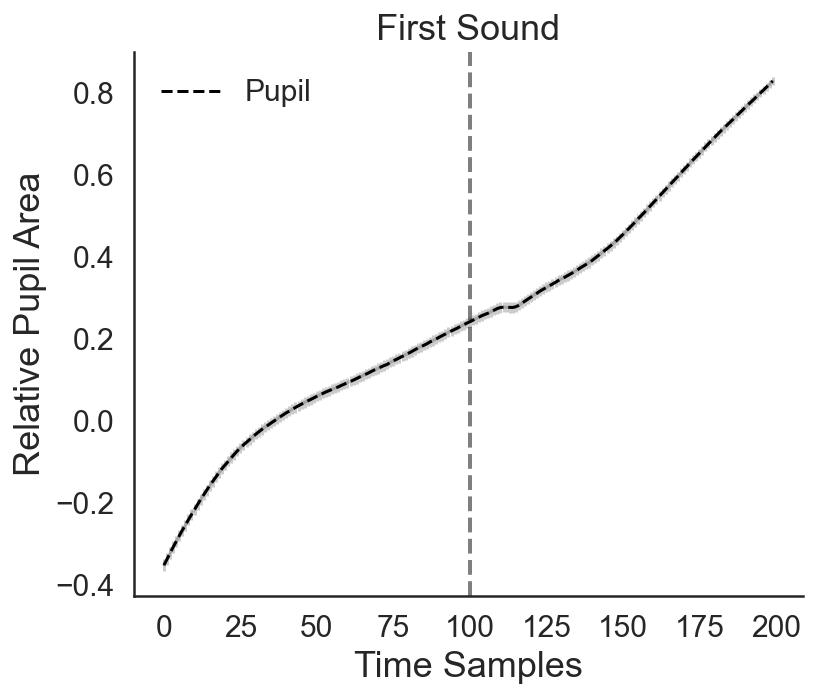

In [185]:
show_raw_pupil(pupilFirstSnd,100,baseP, title = 'First Sound')

pupil baseline and pupil trials have not the same number of trials. Beware!


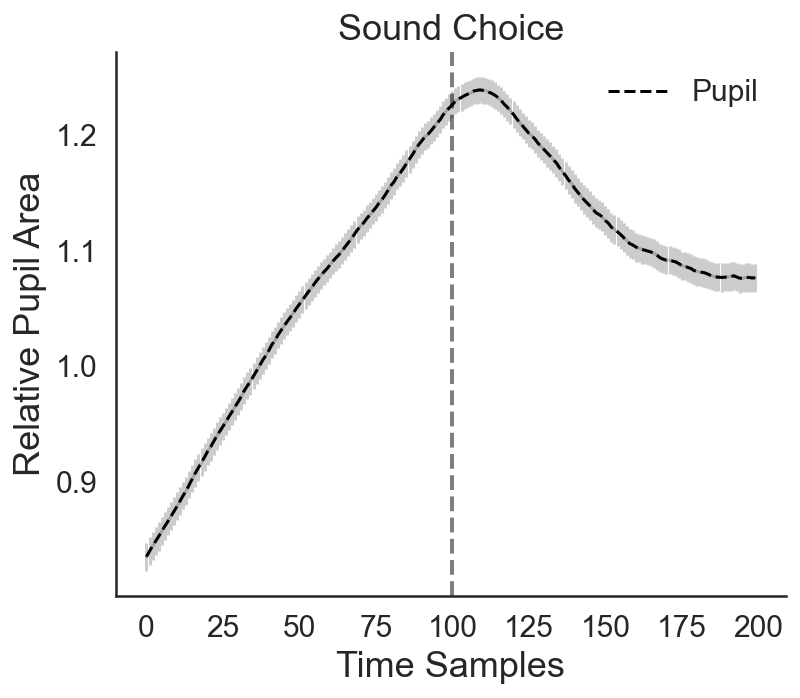

In [186]:
show_raw_pupil(pupilChoice,100,baseP, title = 'Sound Choice') # we add -10 becuase we use "feedback" event with happens 20ms after actual choice 

pupil baseline and pupil trials have not the same number of trials. Beware!


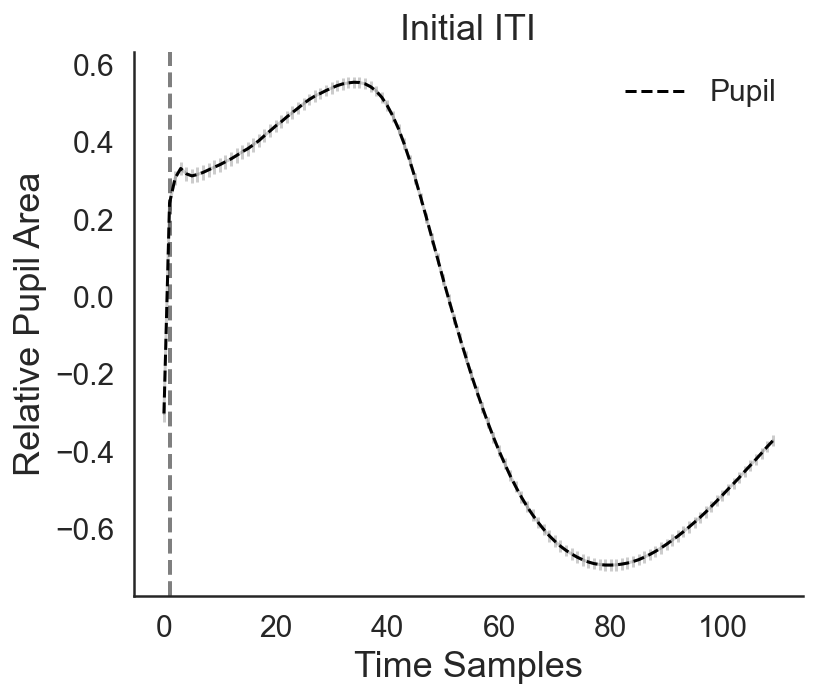

In [187]:
show_raw_pupil(pupilIti,1,baseP, title = 'Initial ITI')

pupil baseline and pupil trials have not the same number of trials. Beware!


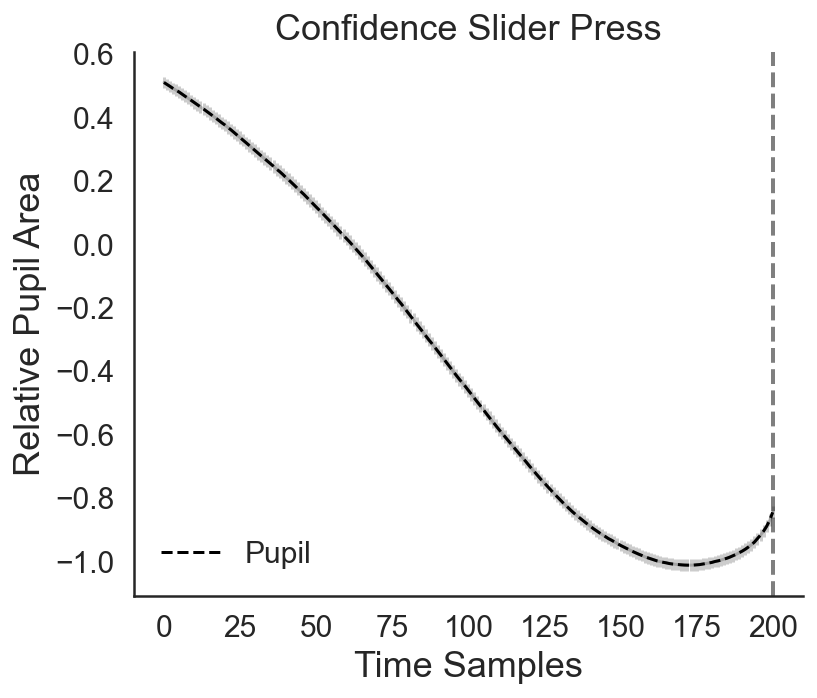

In [188]:
show_raw_pupil(pupilSlider,200,baseP, title= 'Confidence Slider Press') 

----------------------------------

# 4.  Include Behavioural data

# Load choice info

In [66]:
# Select participants accepted from Behavioural analysis
select_subj = [1,2,3,4,5,8,9,10,11,12,13,15,17,18,19,20,21,22,23,24] 

choiceNameFrames = list()

for i in np.arange(len(select_subj)):
    choiceNameFrames1 = glob.glob('/Volumes/BdMLab2021/Prady_backup/pupilPEB2021/Pilots Clicks/pilot'+str(select_subj[i])+'/RESULTS_FILE.txt')
    
    choiceNameFrames1.sort()
    
    choiceNameFrames.extend(choiceNameFrames1)


In [67]:
choiceNameFrames

['/Volumes/BdMLab2021/Prady_backup/pupilPEB2021/Pilots Clicks/pilot1/RESULTS_FILE.txt',
 '/Volumes/BdMLab2021/Prady_backup/pupilPEB2021/Pilots Clicks/pilot2/RESULTS_FILE.txt',
 '/Volumes/BdMLab2021/Prady_backup/pupilPEB2021/Pilots Clicks/pilot3/RESULTS_FILE.txt',
 '/Volumes/BdMLab2021/Prady_backup/pupilPEB2021/Pilots Clicks/pilot4/RESULTS_FILE.txt',
 '/Volumes/BdMLab2021/Prady_backup/pupilPEB2021/Pilots Clicks/pilot5/RESULTS_FILE.txt',
 '/Volumes/BdMLab2021/Prady_backup/pupilPEB2021/Pilots Clicks/pilot8/RESULTS_FILE.txt',
 '/Volumes/BdMLab2021/Prady_backup/pupilPEB2021/Pilots Clicks/pilot9/RESULTS_FILE.txt',
 '/Volumes/BdMLab2021/Prady_backup/pupilPEB2021/Pilots Clicks/pilot10/RESULTS_FILE.txt',
 '/Volumes/BdMLab2021/Prady_backup/pupilPEB2021/Pilots Clicks/pilot11/RESULTS_FILE.txt',
 '/Volumes/BdMLab2021/Prady_backup/pupilPEB2021/Pilots Clicks/pilot12/RESULTS_FILE.txt',
 '/Volumes/BdMLab2021/Prady_backup/pupilPEB2021/Pilots Clicks/pilot13/RESULTS_FILE.txt',
 '/Volumes/BdMLab2021/Prady_

## Join dataframes 

In [68]:
partic_num=len(choiceNameFrames) #number of participants

rateFrameRawAll = pd.DataFrame( )
choiceFrameAll = pd.DataFrame( )

for j in range (partic_num):
    choiceFrames = pd.read_csv(choiceNameFrames[j],delim_whitespace=True) 

    # add participant name column
    partNamesChoice = [int(j)]*len(choiceFrames)
    #sessionChoice = [int(os.path.basename(rateNameFrames[j])[-5])]*len(choiceFrames)

    choiceFrames['part'] = partNamesChoice 
    
    choiceFrameAll = pd.concat([choiceFrameAll,choiceFrames],ignore_index=True)


In [69]:
choiceNameFrames

['/Volumes/BdMLab2021/Prady_backup/pupilPEB2021/Pilots Clicks/pilot1/RESULTS_FILE.txt',
 '/Volumes/BdMLab2021/Prady_backup/pupilPEB2021/Pilots Clicks/pilot2/RESULTS_FILE.txt',
 '/Volumes/BdMLab2021/Prady_backup/pupilPEB2021/Pilots Clicks/pilot3/RESULTS_FILE.txt',
 '/Volumes/BdMLab2021/Prady_backup/pupilPEB2021/Pilots Clicks/pilot4/RESULTS_FILE.txt',
 '/Volumes/BdMLab2021/Prady_backup/pupilPEB2021/Pilots Clicks/pilot5/RESULTS_FILE.txt',
 '/Volumes/BdMLab2021/Prady_backup/pupilPEB2021/Pilots Clicks/pilot8/RESULTS_FILE.txt',
 '/Volumes/BdMLab2021/Prady_backup/pupilPEB2021/Pilots Clicks/pilot9/RESULTS_FILE.txt',
 '/Volumes/BdMLab2021/Prady_backup/pupilPEB2021/Pilots Clicks/pilot10/RESULTS_FILE.txt',
 '/Volumes/BdMLab2021/Prady_backup/pupilPEB2021/Pilots Clicks/pilot11/RESULTS_FILE.txt',
 '/Volumes/BdMLab2021/Prady_backup/pupilPEB2021/Pilots Clicks/pilot12/RESULTS_FILE.txt',
 '/Volumes/BdMLab2021/Prady_backup/pupilPEB2021/Pilots Clicks/pilot13/RESULTS_FILE.txt',
 '/Volumes/BdMLab2021/Prady_

## Normalize (z-score) values

In [70]:
choiceFrameAll["zRT"] = z_score1(choiceFrameAll,'part',"Choice_SND1_RT")
choiceFrameAll["zConf"] = z_score1(choiceFrameAll,'part',"CONF")

choiceFrameAll["zLFreq"] = z_score1(choiceFrameAll,'part',"freql")
choiceFrameAll["zRFreq"] = z_score1(choiceFrameAll,'part',"freqr")

choiceFrameAll["Choice"] = (choiceFrameAll['Choice_SND1'] == 'm')*1 + (choiceFrameAll['Choice_SND1'] == 'z')*0

## Include new variables

In [71]:
choiceFrameAll["totFreq"] = choiceFrameAll['freql'] + choiceFrameAll['freqr'] 
choiceFrameAll["dFreq"] =  - choiceFrameAll['freql'] +  choiceFrameAll['freqr'] 
choiceFrameAll["absDFreq"] =  np.abs(- choiceFrameAll['freql'] +  choiceFrameAll['freqr'] )

choiceFrameAll["zTotFreq"] = z_score1(choiceFrameAll,'part',"totFreq")
choiceFrameAll["zDFreq"] = z_score1(choiceFrameAll,'part',"dFreq")
choiceFrameAll["zAbsDFreq"] = z_score1(choiceFrameAll,'part',"absDFreq")


choiceFrameAll["choFreq"] =  ((choiceFrameAll["Choice"] == 0) * choiceFrameAll['freql']) +  ((choiceFrameAll["Choice"] == 1) *choiceFrameAll['freqr'] )
choiceFrameAll["unchoFreq"] =  ((choiceFrameAll["Choice"] == 1) * choiceFrameAll['freql']) +  ((choiceFrameAll["Choice"] == 0) *choiceFrameAll['freqr'] )

choiceFrameAll["zChoFreq"] = z_score1(choiceFrameAll,'part',"choFreq")
choiceFrameAll["zUnchoFreq"] = z_score1(choiceFrameAll,'part',"unchoFreq")

## split data : by confidence

In [72]:
data_splits = splitBy(choiceFrameAll, Splits_headers = ['ConfSplit'],Splits_variables = ['zConf'])
choiceFrameAll['ConfSplit'] = data_splits['ConfSplit'].values

## split data : by Totfreq and DFreq

In [73]:
data_splits = splitBy(choiceFrameAll, Splits_headers = ['TotFreqSplit'],Splits_variables = ['zTotFreq'])
choiceFrameAll['TotFreqSplit'] = data_splits['TotFreqSplit'].values

data_splits = splitBy(choiceFrameAll, Splits_headers = ['DFreqSplit'],Splits_variables = ['zAbsDFreq'])
choiceFrameAll['DFreqSplit'] = data_splits['DFreqSplit'].values

data_splits = splitBy(choiceFrameAll, Splits_headers = ['ChoFreqSplit'],Splits_variables = ['zChoFreq'])
choiceFrameAll['ChoFreqSplit'] = data_splits['ChoFreqSplit'].values


In [74]:
choiceFrameAll

,Session_Name_,Trial_Index_,expcond,trialn,noisecond,whichfirstopt,noiseinl,noiseinr,freql,freqr,...,zDFreq,zAbsDFreq,choFreq,unchoFreq,zChoFreq,zUnchoFreq,ConfSplit,TotFreqSplit,DFreqSplit,ChoFreqSplit
0,pilot1,21,Experiment,118,1,0,1,1,4,1,...,-0.700649,-0.301511,1,4,-1.565104,-0.504956,0.0,0.0,0.0,0.0
1,pilot1,22,Experiment,134,1,0,1,1,5,9,...,0.934199,0.150756,5,9,-0.197537,1.270279,0.0,1.0,1.0,1.0
2,pilot1,23,Experiment,140,1,0,1,1,6,5,...,-0.233550,-1.206045,5,6,-0.197537,0.205138,0.0,0.0,0.0,1.0
3,pilot1,24,Experiment,177,1,0,1,1,10,6,...,-0.934199,0.150756,6,10,0.144354,1.625326,0.0,1.0,1.0,1.0
4,pilot1,25,Experiment,107,1,0,1,1,2,9,...,1.634848,1.507557,2,9,-1.223212,1.270279,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3594,Pilot24,196,Experiment,112,1,0,1,1,3,5,...,0.467099,-0.753778,3,5,-0.851419,-0.187343,0.0,0.0,0.0,0.0
3595,Pilot24,197,Experiment,94,1,0,1,1,1,5,...,0.934199,0.150756,1,5,-1.541758,-0.187343,1.0,0.0,1.0,0.0
3596,Pilot24,198,Experiment,178,1,0,1,1,10,7,...,-0.700649,-0.301511,7,10,0.529260,1.568996,0.0,1.0,1.0,1.0
3597,Pilot24,199,Experiment,120,1,0,1,1,4,3,...,-0.233550,-1.206045,3,4,-0.851419,-0.538611,0.0,0.0,0.0,0.0


In [75]:
#data_expHigh = choiceFrameAll.loc[(choiceFrameAll['frame'] == 1)] # 1 = high, 2 = low
#data_expLow = choiceFrameAll.loc[(choiceFrameAll['frame'] == 2)] # 1 = high, 2 = low

# Pick for confidence levels across both frames
data_expHigh = choiceFrameAll.loc[(choiceFrameAll['ConfSplit'] == 1)] 
data_expLow = choiceFrameAll.loc[(choiceFrameAll['ConfSplit'] == 0)] 

 # extract relevant participants for pupil info

In [76]:
kept_part = choiceFrameAll.Session_Name_.unique()

In [77]:
pupiInfoBehav = []
for j in kept_part:
    indexDFPart = indexDF.loc[(indexDF['part'] ==  j)].copy()
    pupiInfoBehav.extend(indexDFPart.values.tolist())
    
pupiIdxBehav = pd.DataFrame(pupiInfoBehav, columns=indexDF.columns)

In [78]:
pupiIdxBehav

,part,trial,firstSndIdx,choiceIdx,itiIdx,confAcceptIdx,confBeginIdx,basePupil
0,pilot1,21,3761377,3761600,3761177,3762083,3761902,0.133810
1,pilot1,22,3762295,3762483,3762095,3762902,3762785,-0.652043
2,pilot1,23,3763115,3763410,3762915,3763815,3763711,-0.894678
3,pilot1,24,3764027,3764267,3763827,3764713,3764568,-0.426198
4,pilot1,25,3764926,3765125,3764726,3765525,3765426,-0.389972
...,...,...,...,...,...,...,...,...
3594,Pilot24,196,2556529,2556722,2556329,2557273,2557024,-0.962706
3595,Pilot24,197,2557487,2557625,2557287,2558187,2557927,-1.146356
3596,Pilot24,198,2558400,2558773,2558200,2559296,2559075,-0.808432
3597,Pilot24,199,2559507,2559740,2559307,2560313,2560042,-0.819927


In [79]:
pupilBaseline = []
for i in pupiIdxBehav['firstSndIdx'].values.astype(int):
    pupilBaseline.append(pupilInfo.iloc[i-200:i-1].zPupil.values)

    
basePBehav = [None]*len(pupilBaseline)
for j in range(len(pupilBaseline)):
    pupilSeq1S = [None]*len(pupilBaseline[j])
    for jj in range(len(pupilBaseline[j])):
        if pupilBaseline[j][jj]=='':
            pupilSeq1S[jj]=np.nan
        else:
            pupilSeq1S[jj] = float(pupilBaseline[j][jj])
    basePBehav[j] = np.nanmean(pupilSeq1S) # baseP contains the value of pupil for the baseline of each trial
pupiIdxBehav['basePupil'] = basePBehav

remember that the sampling time was 100hz, so we have 10ms between samples

In [80]:
pupilFirstSnd = []
pupilChoice = []
pupilIti = []
pupilSlider = []

for i in pupiIdxBehav['firstSndIdx'].values.astype(int):
    pupilFirstSnd.append(pupilInfo.iloc[i-100:i+100].zPupil.values)
    
for i in pupiIdxBehav['choiceIdx'].values.astype(int):
    pupilChoice.append(pupilInfo.iloc[i-100:i+100].zPupil.values)
    
for i in pupiIdxBehav['itiIdx'].values.astype(int):
    pupilIti.append(pupilInfo.iloc[i-10:i+100].zPupil.values)    

for i in pupiIdxBehav['confAcceptIdx'].values.astype(int):
    pupilSlider.append(pupilInfo.iloc[i-200:i+1].zPupil.values)    # if increase more than 10 you can start reading outside the list 
    

In [189]:
def show_raw_pupil_split(pupilBase,event_time,choiceFrameAll,baseP, splitVar = 'ConfSplit', title = "",labFrame = ['High','Low']
):
    
    # check if the size (number of trials) of pupil info and baseline pupil is the same
    if len(pupilBase) != len(baseP):
        print('pupil baseline and pupil trials have not the same number of trials. Beware!')    
    if len(choiceFrameAll) != len(baseP):
        print('behaviour trials and pupil trials have not the same number of trials. Beware!')      
    
    data_expHigh = choiceFrameAll.loc[(choiceFrameAll[splitVar] == 1)] # 1 = high, 0 = low
    data_expLow = choiceFrameAll.loc[(choiceFrameAll[splitVar] == 0)] #
    
#    index_high = data_expHigh.TRIAL_N_LIVE.values-1
#    index_low = data_expLow.TRIAL_N_LIVE.values-1

    index_high = data_expHigh.index.values
    index_low = data_expLow.index.values

    # extract high
    base1 = [None]*len(index_high)
    idxx= 0 
    for j in index_high:
        pupilSeq1S = [None]*len(pupilBase[j])
        for jj in range(len(pupilBase[j])):
            if pupilBase[j][jj]=='':
                pupilSeq1S[jj]=np.nan
            else:
                pupilSeq1S[jj] = float(pupilBase[j][jj])
        base1[idxx] = pupilSeq1S - baseP[j]
        idxx=idxx+1
    base1 = np.asarray(base1)
    baseTimeMean1 =np.nanmean(base1, axis= 0)
    #baseTimeStd1 =np.nanstd(base1, axis= 0)
    baseTimeStd1 =scipy.stats.sem(base1, axis= 0,nan_policy='omit')

    figsize(6, 5)
    
    
    # extract low    
    base2 = [None]*len(index_low)
    idxx= 0 
    for j in index_low:
        pupilSeq1S = [None]*len(pupilBase[j])
        for jj in range(len(pupilBase[j])):
            if pupilBase[j][jj]=='':
                pupilSeq1S[jj]=np.nan
            else:
                pupilSeq1S[jj] = float(pupilBase[j][jj])
        base2[idxx] = pupilSeq1S - baseP[j]
        idxx=idxx+1
    base2 = np.asarray(base2)
    baseTimeMean2 =np.nanmean(base2, axis= 0)
    #baseTimeStd2 =np.nanstd(base2, axis= 0)
    baseTimeStd2 =scipy.stats.sem(base2, axis= 0,nan_policy='omit')

    
    #xsecs = range(0,len(instantEffectDDT_like))
    colorP = ['#5BC8AF','#F9CB40','#4F6A9A','#AC5255','#B5C8E9','#F2CECF']
    xSecs = np.array(range(0,len(baseTimeMean1)))
    
    #plot High
    plt.errorbar(xSecs,baseTimeMean1, yerr= baseTimeStd1, color=colorP[0],marker='', alpha = 0.05 );
    plot(xSecs,baseTimeMean1,color=colorP[0],label = labFrame[0],ls = '-')
    #plot low    
    plt.errorbar(xSecs,baseTimeMean2, yerr= baseTimeStd2, color=colorP[1],marker='', alpha = 0.05 );
    plot(xSecs,baseTimeMean2,color=colorP[1],label = labFrame[1],ls = '-')
    
    plt.axvline(event_time, color='black', lw=2, alpha=0.5,ls = '--')

    plt.title(title,size=18)
    plt.xlabel("Time Samples [ms]",size=18)
    plt.ylabel("Relative Pupil Area",size=18)
    # since we have 500 hz samples (i.e. the distance between each sample is 2ms) we multiple by 2 the interval
    plt.xticks([0, event_time/2 ,event_time,event_time*3/2,len(xSecs)], [
        int(-event_time*2),int(-event_time/2*2) ,0, int(event_time/2*2),int((len(xSecs)-event_time)*2) ],fontsize= 15)
    
    
    plt.yticks(fontsize= 15)
    
    
    plt.legend(frameon=False, fontsize = 15)
    sns.set_style("white")
    sns.despine()

In [190]:
len(pupilFirstSnd)

3599

In [191]:
len(basePBehav)

3599

In [192]:
len(choiceFrameAll)

3599

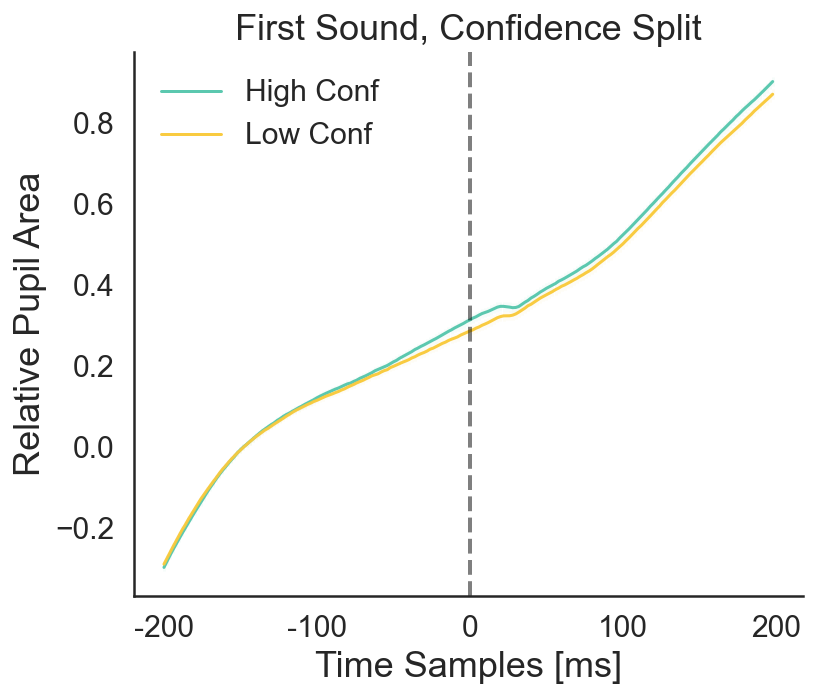

In [211]:
show_raw_pupil_split(pupilFirstSnd,100,choiceFrameAll,basePBehav,'TotFreqSplit',title = 'First Sound, Confidence Split',labFrame = ['High Conf','Low Conf'])

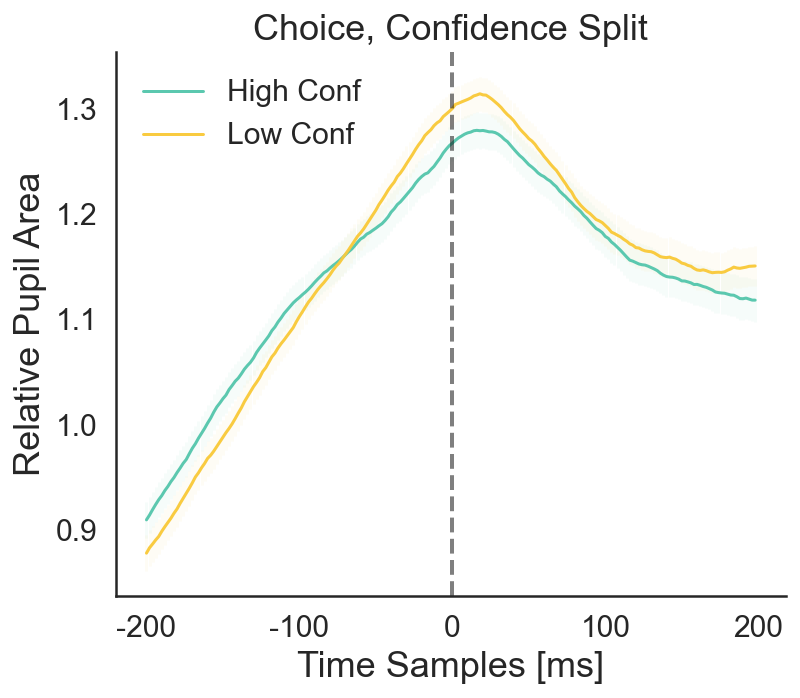

In [212]:
show_raw_pupil_split(pupilChoice,100,choiceFrameAll,basePBehav,'TotFreqSplit',title = 'Choice, Confidence Split',labFrame = ['High Conf','Low Conf'])

# Checking relative change in pupil size separating by frame

# Separate by frame

In [197]:

def show_frame_pupil_split(pupilBase,event_time,choiceFrameAll,baseP, splitVar = 'ConfSplit', title = "", labFrame = ['High','Low']):
    
    # check if the size (number of trials) of pupil info and baseline pupil is the same
    if len(pupilBase) != len(baseP):
        print('pupil baseline and pupil trials have not the same number of trials. Beware!')    
    if len(choiceFrameAll) != len(baseP):
        print('behaviour trials and pupil trials have not the same number of trials. Beware!')      
    
    
    # initialize figure
    
    figsize(12, 5)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
    
    #############################################
    ### Pick for the data for the FIRST FRAME ###
    #############################################
    
    choiceFrameAll0 = choiceFrameAll.loc[(choiceFrameAll['frame'] == 1)] 
    
    
    data_expHigh = choiceFrameAll0.loc[(choiceFrameAll0[splitVar] == 1)] # 1 = high, 0 = low
    data_expLow = choiceFrameAll0.loc[(choiceFrameAll0[splitVar] == 0)] #
    
    
    # with this we pick always the index only for the first part
    #index_high = data_expHigh.TRIAL_N_LIVE.values-1
    #index_low = data_expLow.TRIAL_N_LIVE.values-1
    
    index_high = data_expHigh.index.values
    index_low = data_expLow.index.values

    
    
    # extract high
    base1 = [None]*len(index_high)
    idxx= 0 
    for j in index_high:
        pupilSeq1S = [None]*len(pupilBase[j])
        for jj in range(len(pupilBase[j])):
            if pupilBase[j][jj]=='':
                pupilSeq1S[jj]=np.nan
            else:
                pupilSeq1S[jj] = float(pupilBase[j][jj])
        base1[idxx] = pupilSeq1S - baseP[j]
        idxx=idxx+1
    base1 = np.asarray(base1)
    baseTimeMean1 =np.nanmean(base1, axis= 0)
    baseTimeStd1 =scipy.stats.sem(base1, axis= 0,nan_policy='omit')
    
    # extract low    
    base2 = [None]*len(index_low)
    idxx= 0 
    for j in index_low:
        pupilSeq1S = [None]*len(pupilBase[j])
        for jj in range(len(pupilBase[j])):
            if pupilBase[j][jj]=='':
                pupilSeq1S[jj]=np.nan
            else:
                pupilSeq1S[jj] = float(pupilBase[j][jj])
        base2[idxx] = pupilSeq1S - baseP[j]
        idxx=idxx+1
    base2 = np.asarray(base2)
    baseTimeMean2 =np.nanmean(base2, axis= 0)
    baseTimeStd2 =scipy.stats.sem(base2, axis= 0,nan_policy='omit')
    
    #xsecs = range(0,len(instantEffectDDT_like))
    colorP = ['#4F6A9A','#AC5255','#B5C8E9','#F2CECF']
    #labFrame = ['High','Low']
    xSecs = np.array(range(0,len(baseTimeMean1)))
    
    #plot High
    ax1.errorbar(xSecs,baseTimeMean1, yerr= baseTimeStd1, color=colorP[0],marker='', alpha = 0.5 );
    ax1.plot(xSecs,baseTimeMean1,color=colorP[0],label = labFrame[0],ls = '-',linewidth=3.5)
    #plot low    
    ax1.errorbar(xSecs,baseTimeMean2, yerr= baseTimeStd2, color=colorP[2],marker='', alpha = 0.5 );
    ax1.plot(xSecs,baseTimeMean2,color=colorP[2],label = labFrame[1],ls = '-',linewidth=3.5)
    
    ax1.axvline(event_time, color='black', lw=2, alpha=0.5,ls = '--')

    ax1.set(xlabel = "Time Samples [ms]",ylabel = "Relative Pupil Area")

    
    
    sample_factor = 10
    
    plt.sca(ax1)    
    plt.xticks([0, event_time/2 ,event_time,event_time*3/2,len(xSecs)], [
        int(-event_time*sample_factor),int(-event_time/2*sample_factor) ,0, int(event_time/2*sample_factor),int((len(xSecs)-event_time)*sample_factor) ],fontsize= 15)
    plt.yticks(fontsize= 15)
    ax1.yaxis.label.set_size(15)
    ax1.xaxis.label.set_size(15)
   
    ax1.legend(frameon=False, fontsize = 15)
    ax1.set_title("High Clicks Frame", fontsize = 18)
    ##############################################
    ### Pick for the data for the SECOND FRAME ###
    ##############################################
    
    choiceFrameAll0 = choiceFrameAll.loc[(choiceFrameAll['frame'] == 2)] 
    
    data_expHigh = choiceFrameAll0.loc[(choiceFrameAll0[splitVar] == 1)] # 1 = high, 0 = low
    data_expLow = choiceFrameAll0.loc[(choiceFrameAll0[splitVar] == 0)] #
    
    #index_high = data_expHigh.TRIAL_N_LIVE.values-1
    #index_low = data_expLow.TRIAL_N_LIVE.values-1
    
    index_high = data_expHigh.index.values
    index_low = data_expLow.index.values
    
    # extract high
    base1 = [None]*len(index_high)
    idxx= 0 
    for j in index_high:
        pupilSeq1S = [None]*len(pupilBase[j])
        for jj in range(len(pupilBase[j])):
            if pupilBase[j][jj]=='':
                pupilSeq1S[jj]=np.nan
            else:
                pupilSeq1S[jj] = float(pupilBase[j][jj])
        base1[idxx] = pupilSeq1S - baseP[j]
        idxx=idxx+1
    base1 = np.asarray(base1)
    baseTimeMean1 =np.nanmean(base1, axis= 0)
    baseTimeStd1 =scipy.stats.sem(base1, axis= 0,nan_policy='omit')
    
    # extract low    
    base2 = [None]*len(index_low)
    idxx= 0 
    for j in index_low:
        pupilSeq1S = [None]*len(pupilBase[j])
        for jj in range(len(pupilBase[j])):
            if pupilBase[j][jj]=='':
                pupilSeq1S[jj]=np.nan
            else:
                pupilSeq1S[jj] = float(pupilBase[j][jj])
        base2[idxx] = pupilSeq1S - baseP[j]
        idxx=idxx+1
    base2 = np.asarray(base2)
    baseTimeMean2 =np.nanmean(base2, axis= 0)
    baseTimeStd2 =scipy.stats.sem(base2, axis= 0,nan_policy='omit')
    
    #xsecs = range(0,len(instantEffectDDT_like))
    colorP = ['#4F6A9A','#AC5255','#B5C8E9','#F2CECF']
    #labFrame = ['High','Low']
    xSecs = np.array(range(0,len(baseTimeMean1)))
    
    #plot High
    ax2.errorbar(xSecs,baseTimeMean1, yerr= baseTimeStd1, color=colorP[1],marker='', alpha = 0.5 );
    ax2.plot(xSecs,baseTimeMean1,color=colorP[1],label = labFrame[0],ls = '-',linewidth=3.5)
    ax2.errorbar(xSecs,baseTimeMean2, yerr= baseTimeStd2, color=colorP[3],marker='', alpha = 0.5 );
    ax2.plot(xSecs,baseTimeMean2,color=colorP[3],label = labFrame[1],ls = '-',linewidth=3.5)
    
    ax2.axvline(event_time, color='black', lw=2, alpha=0.5,ls = '--')

    ax2.set(xlabel = "Time Samples [ms]")

    
    
    plt.sca(ax2)    
    plt.xticks([0, event_time/2 ,event_time,event_time*3/2,len(xSecs)], [
        int(-event_time*sample_factor),int(-event_time/2*sample_factor) ,0, int(event_time/2*sample_factor),int((len(xSecs)-event_time)*sample_factor) ],fontsize= 15)
    plt.yticks(fontsize= 15)
    ax2.legend(frameon=False, fontsize = 15)
    ax2.set_title("Low Clicks Frame",fontsize = 18)
    ax2.xaxis.label.set_size(15)

    
    
    
    
    plt.suptitle(title,size=18)

    sns.set_style("white")
    sns.despine()


## split by TotFreq 

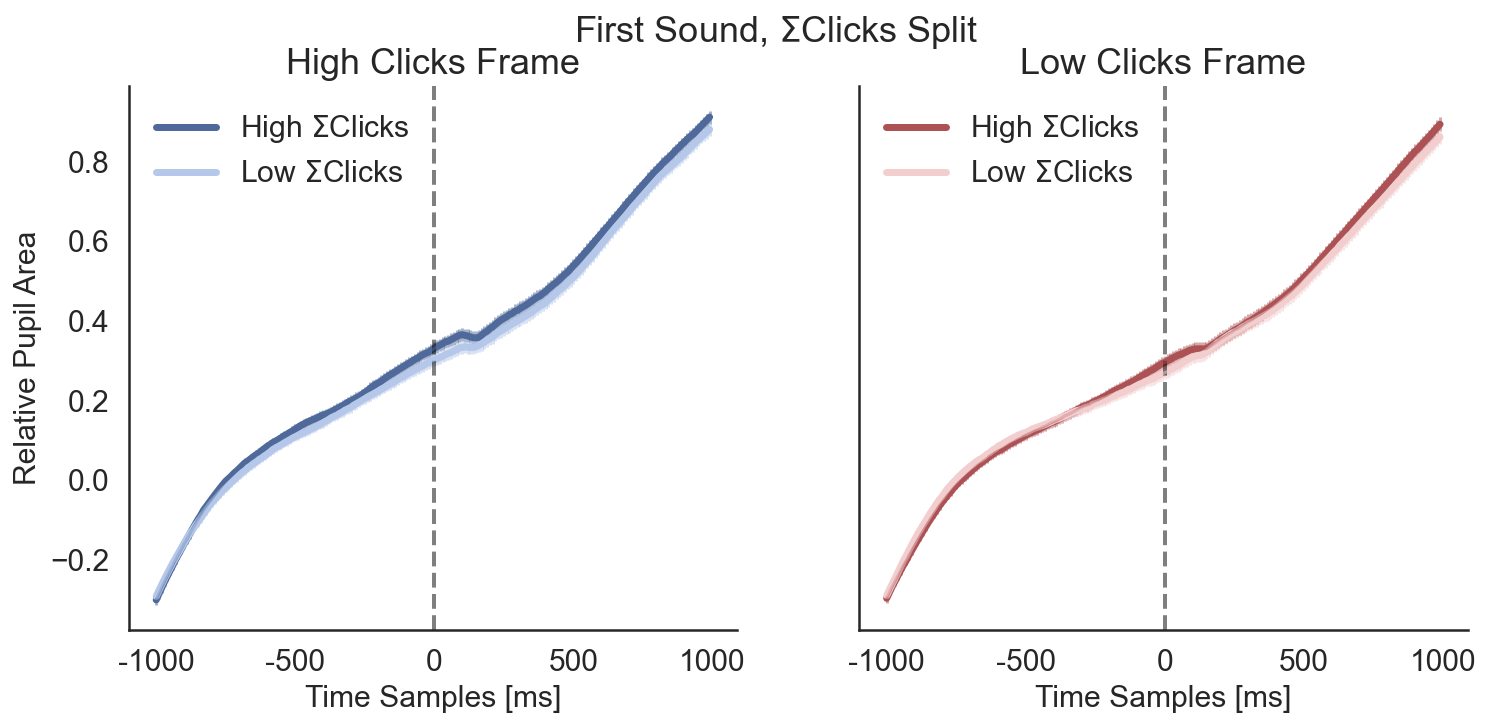

In [198]:
show_frame_pupil_split(pupilFirstSnd,100,choiceFrameAll,basePBehav,'TotFreqSplit',title = 'First Sound, $\Sigma$Clicks Split', labFrame = ['High $\Sigma$Clicks','Low $\Sigma$Clicks'])

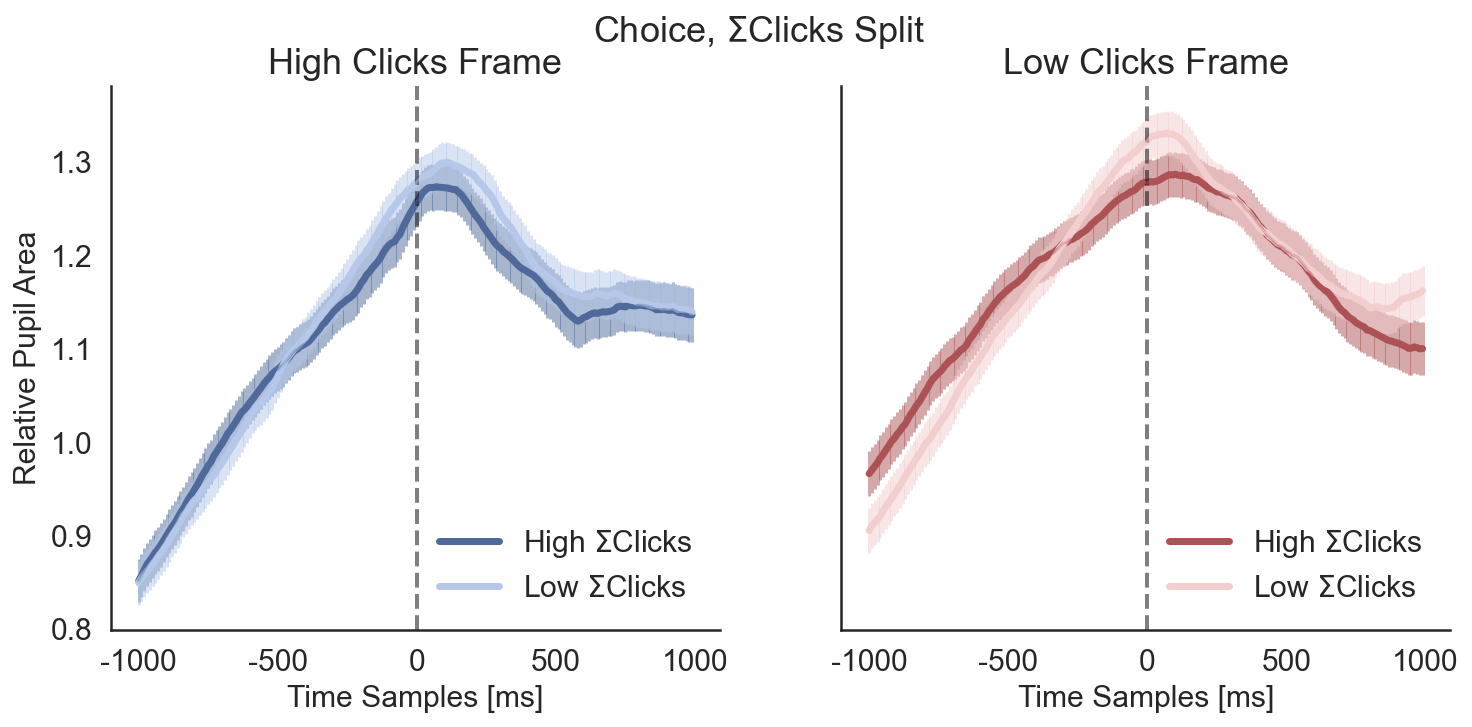

In [199]:
show_frame_pupil_split(pupilChoice,100,choiceFrameAll,basePBehav,'TotFreqSplit',title = 'Choice, $\Sigma$Clicks Split', labFrame = ['High $\Sigma$Clicks','Low $\Sigma$Clicks'])


## split by Confidence 

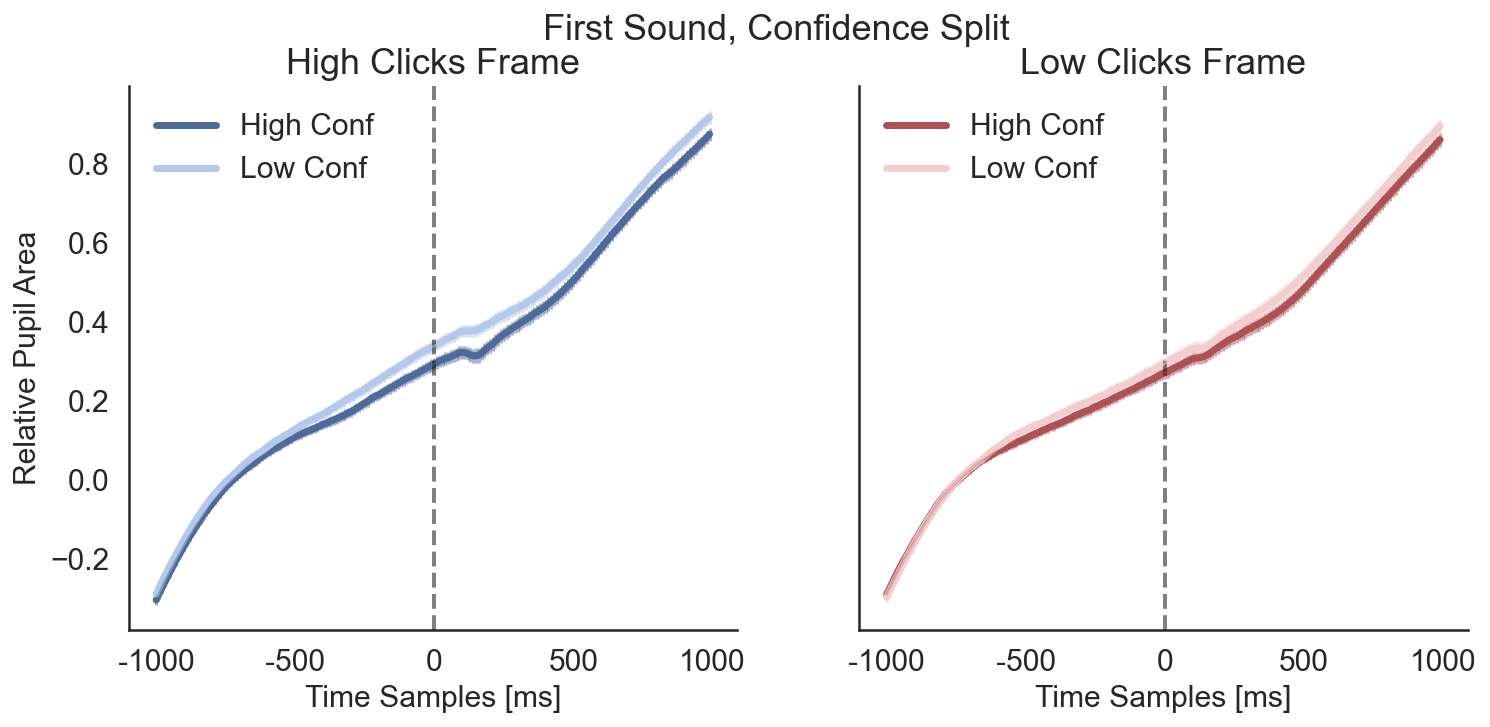

In [200]:
show_frame_pupil_split(pupilFirstSnd,100,choiceFrameAll,basePBehav,'ConfSplit',title = 'First Sound, Confidence Split', labFrame = ['High Conf','Low Conf'])

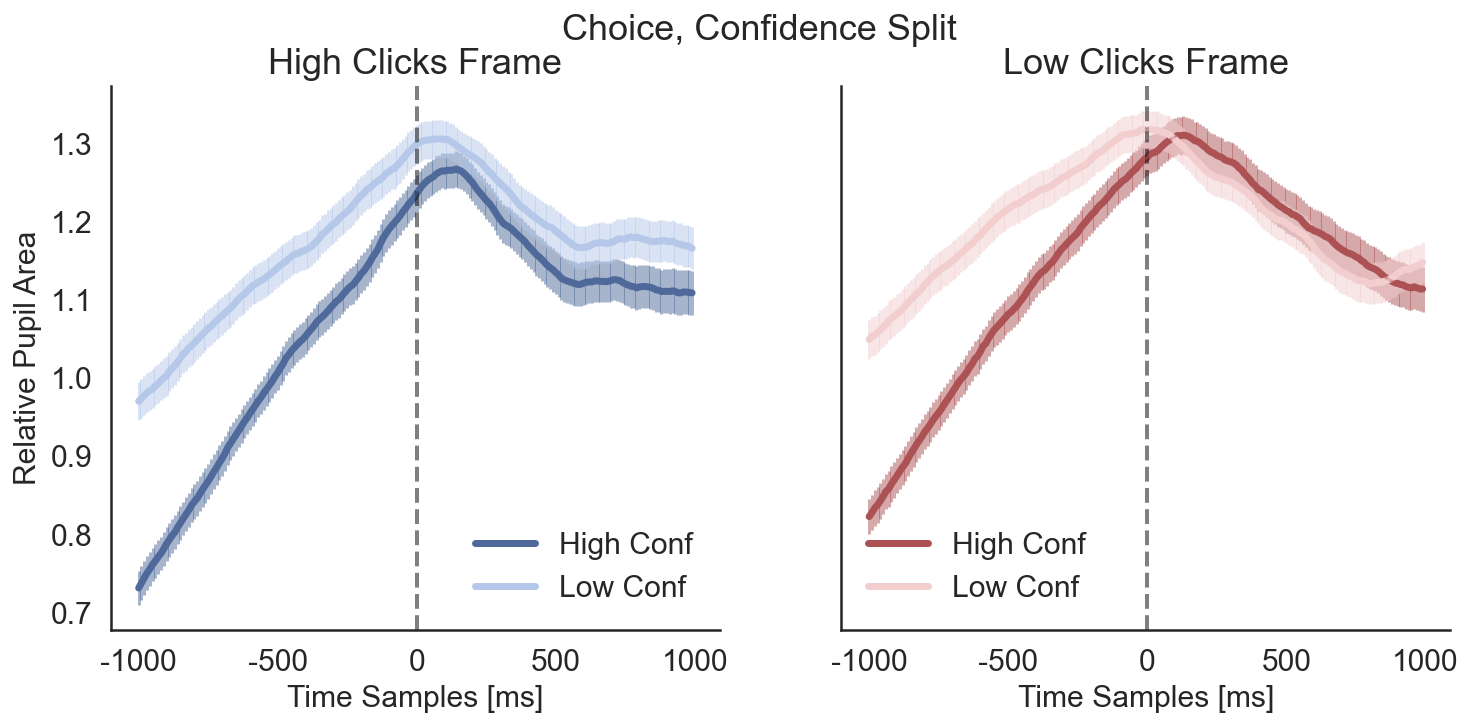

In [201]:
show_frame_pupil_split(pupilChoice,100,choiceFrameAll,basePBehav,'ConfSplit',title = 'Choice, Confidence Split', labFrame = ['High Conf','Low Conf'])


## split by DFreq 

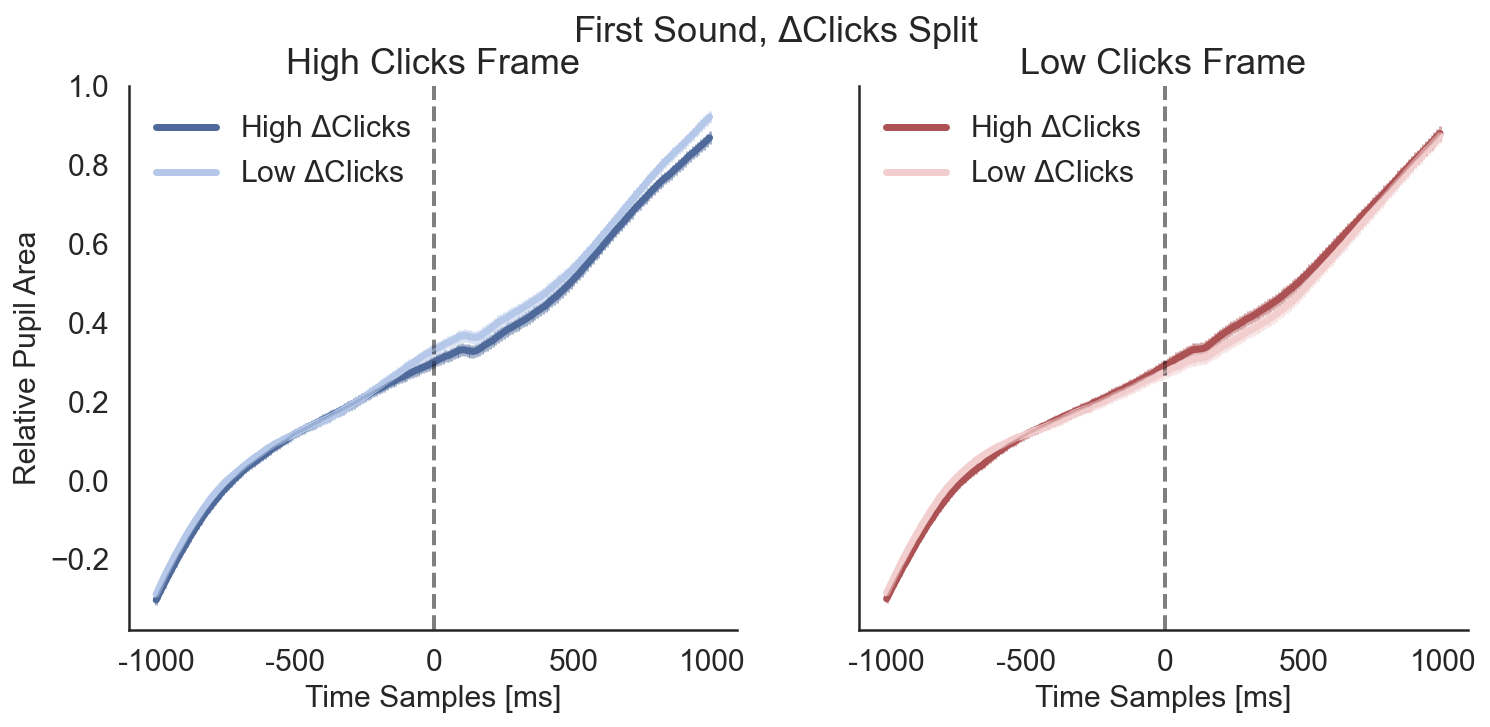

In [202]:
show_frame_pupil_split(pupilFirstSnd,100,choiceFrameAll,basePBehav,'DFreqSplit',title = 'First Sound, $\Delta$Clicks Split', labFrame = ['High $\Delta$Clicks','Low $\Delta$Clicks'])

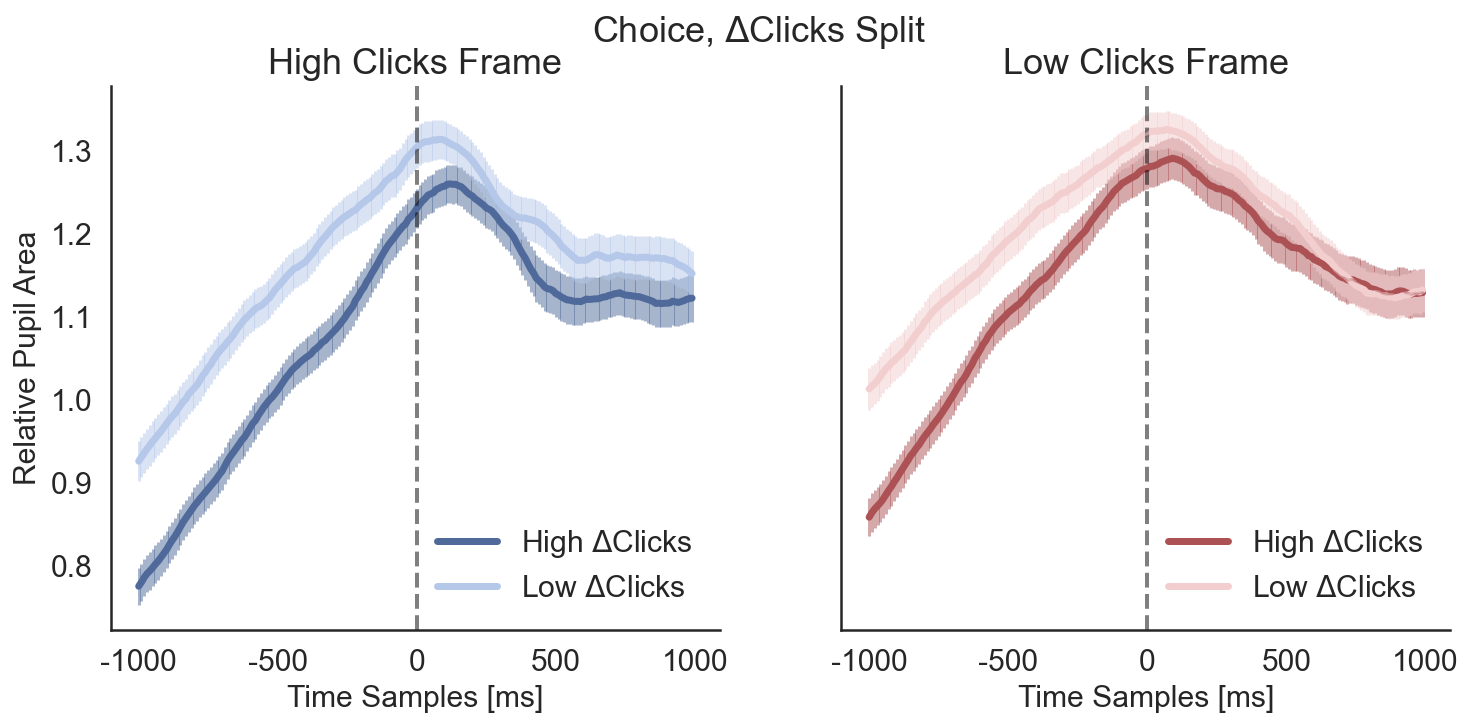

In [203]:
show_frame_pupil_split(pupilChoice,100,choiceFrameAll,basePBehav,'DFreqSplit',title = 'Choice, $\Delta$Clicks Split', labFrame = ['High $\Delta$Clicks','Low $\Delta$Clicks'])


# split by Chosen Clicks


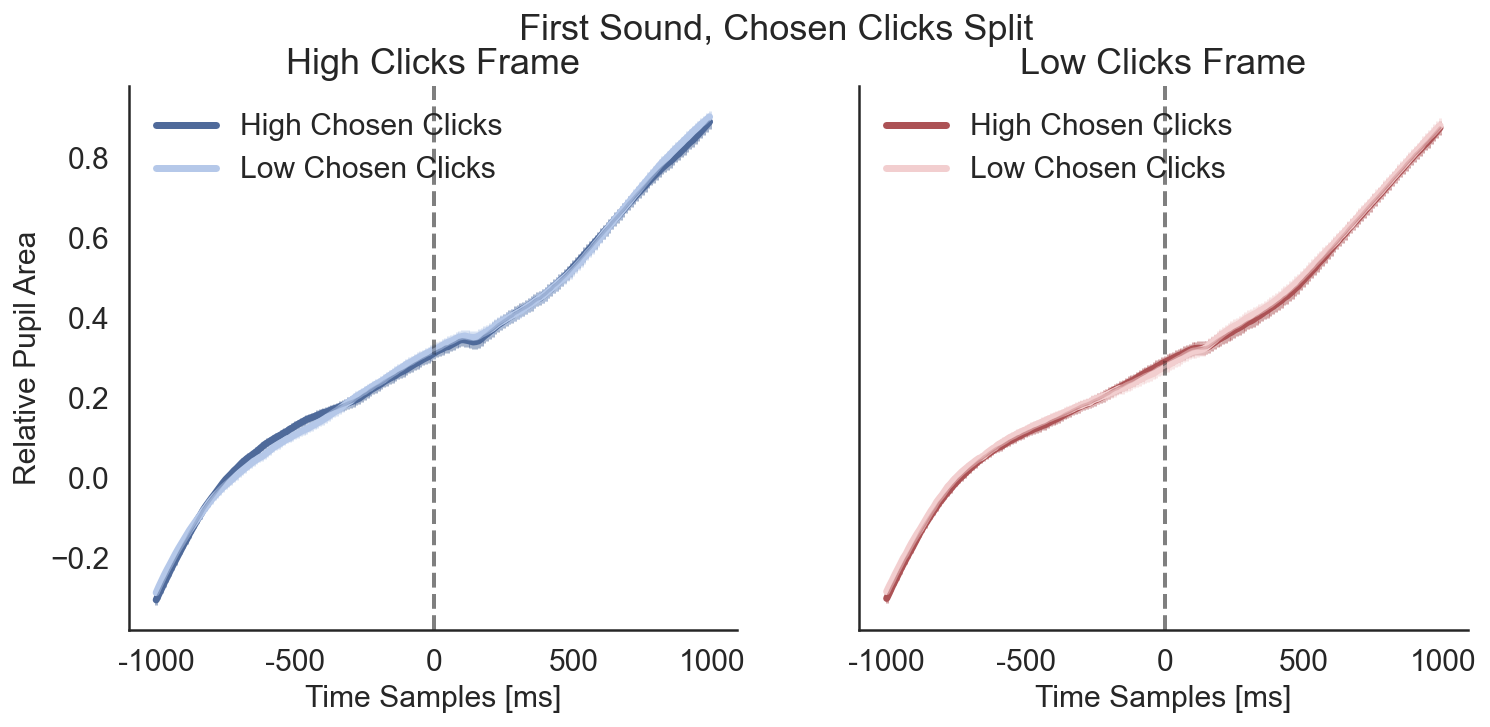

In [204]:
show_frame_pupil_split(pupilFirstSnd,100,choiceFrameAll,basePBehav,'ChoFreqSplit',title = 'First Sound, Chosen Clicks Split', labFrame = ['High Chosen Clicks','Low Chosen Clicks'])

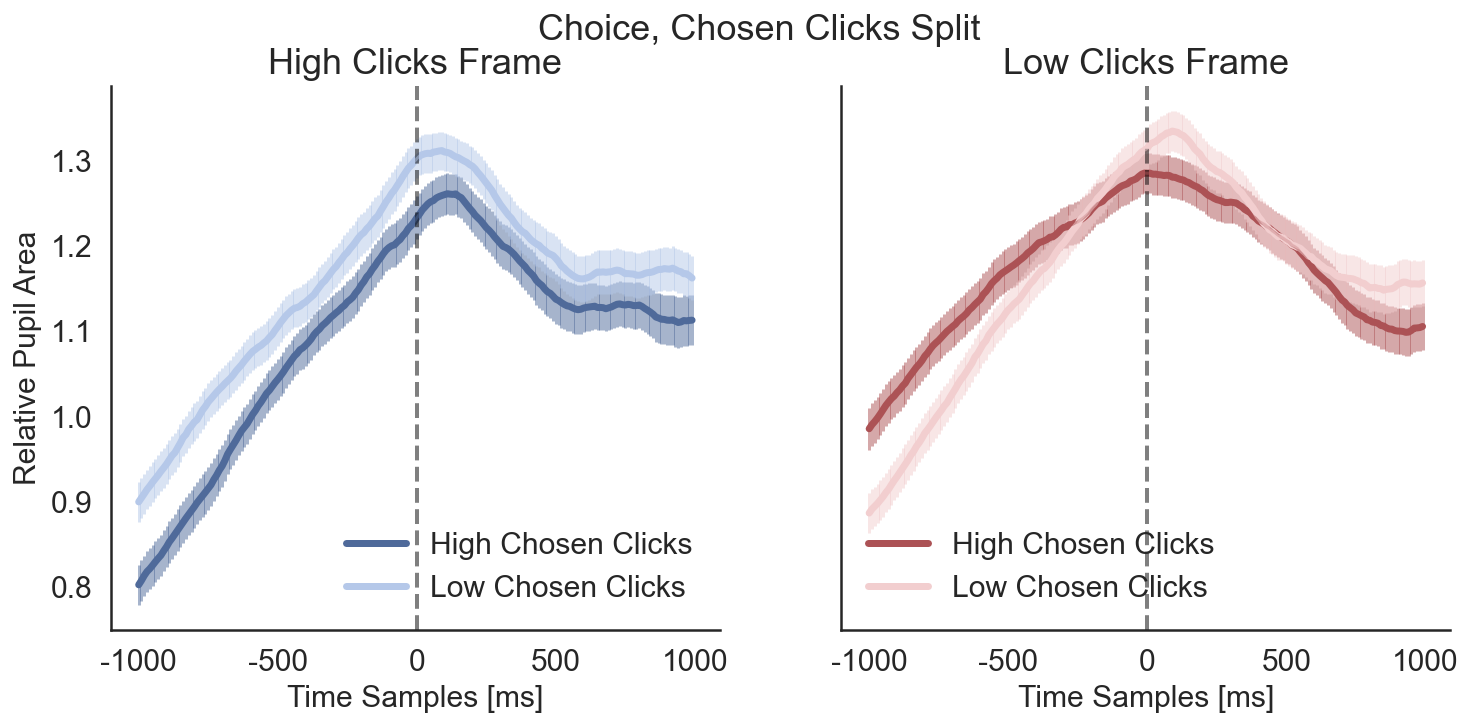

In [205]:
show_frame_pupil_split(pupilChoice,100,choiceFrameAll,basePBehav,'ChoFreqSplit',title = 'Choice, Chosen Clicks Split', labFrame = ['High Chosen Clicks','Low Chosen Clicks'])


# Separate correct from incorrect trials

In [206]:
Correct = []
for i in range(len(choiceFrameAll)):
    if choiceFrameAll.frame[i] == 1:
        if (choiceFrameAll.Choice[i] == 1 and (choiceFrameAll.zLFreq[i] <= choiceFrameAll.zRFreq[i])) or (choiceFrameAll.Choice[i] == 0 and (choiceFrameAll.zLFreq[i] >= choiceFrameAll.zRFreq[i])):
            Correct.append(1)
            
        else:
            Correct.append(0)
    if choiceFrameAll.frame[i] == 2:
        if (choiceFrameAll.Choice[i] == 0 and (choiceFrameAll.zLFreq[i] <= choiceFrameAll.zRFreq[i])) or (choiceFrameAll.Choice[i] == 1 and (choiceFrameAll.zLFreq[i] >= choiceFrameAll.zRFreq[i])):
            Correct.append(1)
        else:
            Correct.append(0)

choiceFrameAll["correct"] = Correct

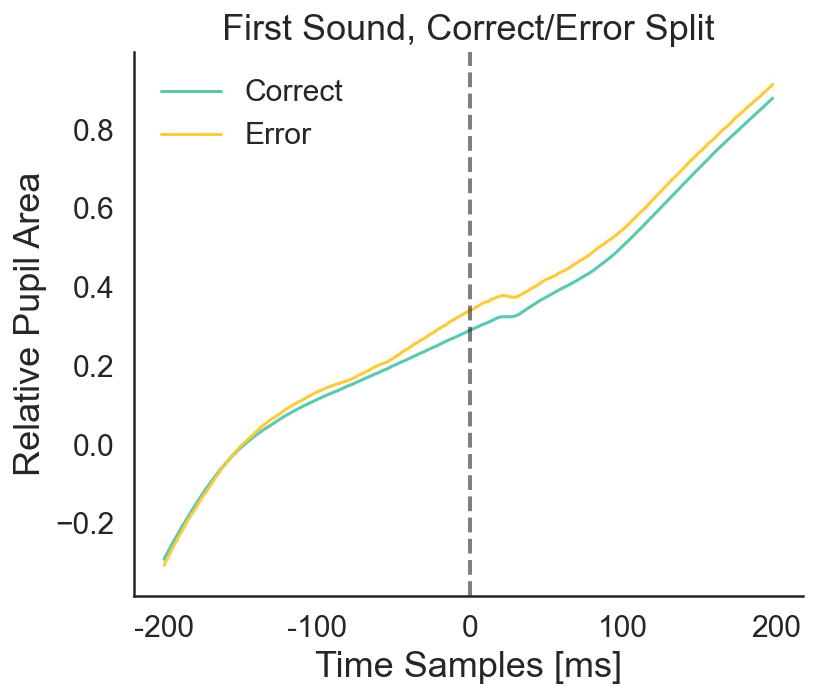

In [207]:
show_raw_pupil_split(pupilFirstSnd,100,choiceFrameAll,basePBehav,'correct',title = 'First Sound, Correct/Error Split',labFrame = ['Correct','Error'])

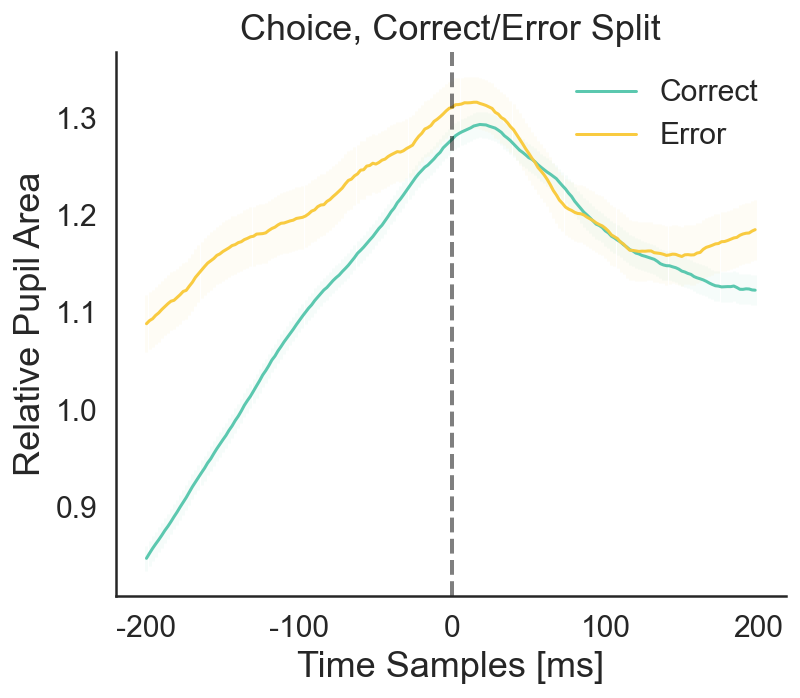

In [208]:
show_raw_pupil_split(pupilChoice,100,choiceFrameAll,basePBehav,'correct',title = 'Choice, Correct/Error Split',labFrame = ['Correct','Error'])

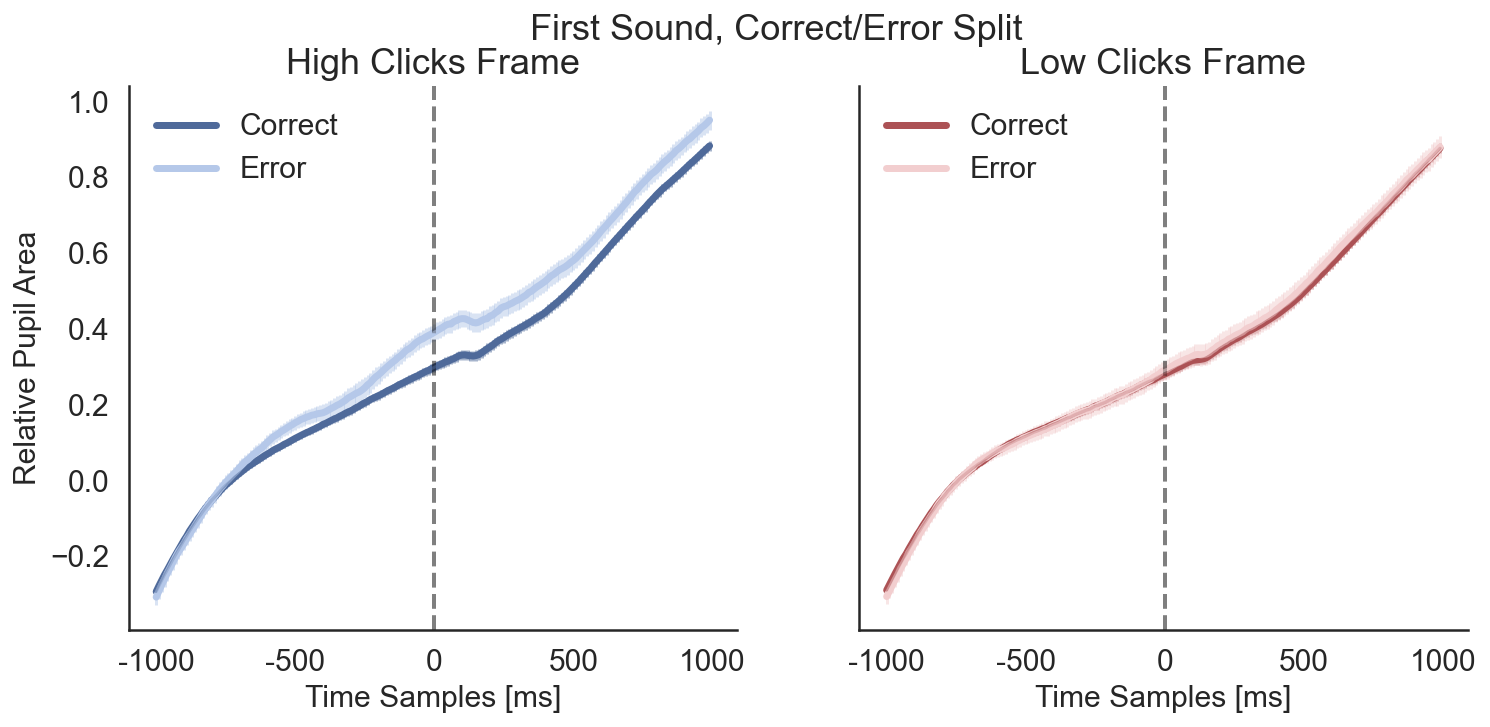

In [209]:
show_frame_pupil_split(pupilFirstSnd,100,choiceFrameAll,basePBehav,'correct',title = 'First Sound, Correct/Error Split', labFrame = ['Correct','Error'])

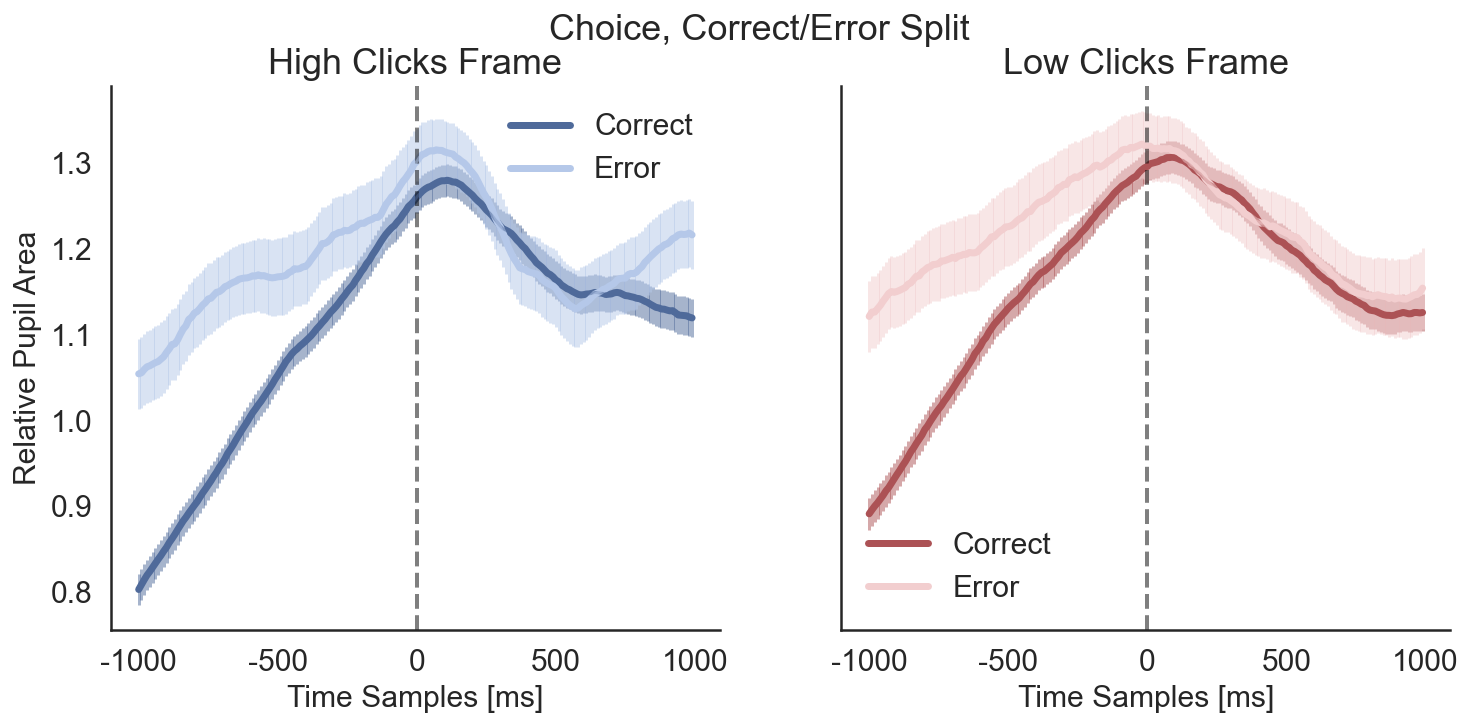

In [210]:
show_frame_pupil_split(pupilChoice,100,choiceFrameAll,basePBehav,'correct',title = 'Choice, Correct/Error Split', labFrame = ['Correct','Error'])

--------------------------------------

# 5. GLM model on pupil

## Pick trials course --  select between pupil info between ITI_APPEAR (moment beginning trial) and  CHOICE_FEEDBACK_TIMER (moment confidence screen will appear)

## canonical pupil response function (as used in Lempert et al., 2015; de Gee et al., 2014)

In [101]:
t = range(300)
s = 1/10**(27)
w = 10.1
tmax = 930 #[ms]
sample_factor = 10 # 100 Hz sampling


h = []
for ti in t:
    h.append(s*(ti*sample_factor)**w*exp(-(ti*sample_factor)*w/tmax)) # we multiply by sample_factor to adjust for sampling

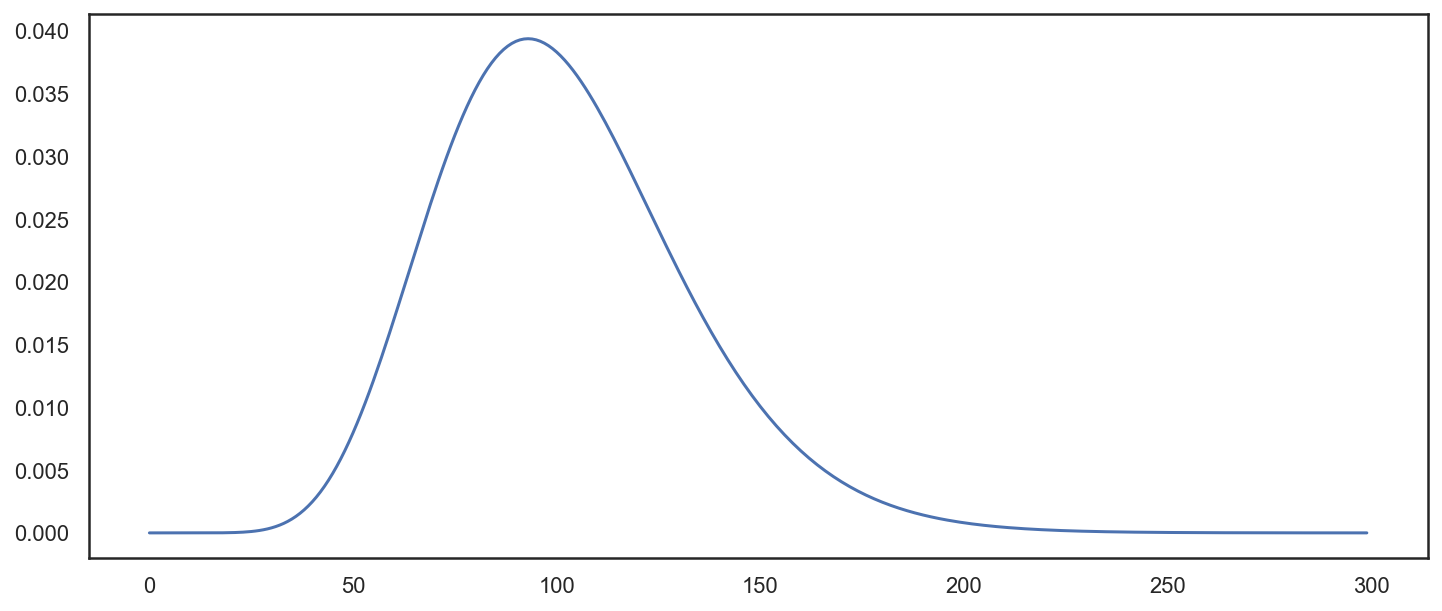

In [102]:
plt.plot(h)

# Estimate regressors , no frame separation

In [103]:
pupilTrialAll = []
# initialize regressors trials together
regSndOnsetlAll = []
regChoOnsetlAll = []
regPreDecAll = []
regPostDeclAll = []

regSndOnsetlAll_C = []
regChoOnsetlAll_C = []
regPreDecAll_C= []
regPostDeclAll_C = []

regSndOnsetlAll_D = []
regChoOnsetlAll_D = []
regPreDecAll_D = []
regPostDeclAll_D = []

beginTrialIdx = pupiIdxBehav['itiIdx'].values.astype(int)
endTrialIdx = pupiIdxBehav['confBeginIdx'].values.astype(int)

j = 0
for i in beginTrialIdx:
    
    trialPupilIter = pupilInfo.iloc[ i : endTrialIdx[j]]
    
    # define regressors:
    regSndOnset = ((trialPupilIter.SAMPLE_MESSAGE.str.contains('FIRST_SOUND_R'))*1).values # regressor for stimulus onset
    regChoiceOnset = (((trialPupilIter.SAMPLE_MESSAGE.str.contains('DISPLAY_FEEDBACK_R')) | (trialPupilIter.SAMPLE_MESSAGE.str.contains('DISPLAY_FEEDBACK_L')))*1).values # regressor for choice onset

    
    
    # boxcar regressor pre-decision
    reg0 = np.zeros(len(regSndOnset))
    reg0Begin = np.where(regSndOnset == 1)[0][0] # from the sound presentation
    reg0End = np.where(regChoiceOnset == 1)[0][0] # to the choice
    
    regLen = len(reg0[reg0Begin:reg0End])    
    reg0[reg0Begin:reg0End] = [1/regLen] * regLen # normalize boxcar regressor by its length
    regPreDecision = reg0
    
    # boxcar regressor post-decision
    reg0 = np.zeros(len(regSndOnset))
    reg0Begin = np.where(regChoiceOnset == 1)[0][0] # from the choice
    reg0End = len(regSndOnset) # to the end of the trial
    
    regLen = len(reg0[reg0Begin:reg0End])    
    reg0[reg0Begin:reg0End] = [1/regLen] * regLen # normalize boxcar regressor by its length
    regPostDecision = reg0
    
    
   #  # add up the pupil data 
   #  pupilTrialAll.extend(trialPupilIter.zPupil.values)
   #  
   #  # add up the regressor(NO CONVOLUTION)
   #  regSndOnsetlAll.extend(regSndOnset)
   #  regChoOnsetlAll.extend(regChoiceOnset)
   #  regPreDecAll.extend(regPreDecision)
   #  regPostDeclAll.extend(regPostDecision)
   #  
   #  
   #  # extract parametric modulators from behaviour.
   #  confParamIter = choiceFrameAll.iloc[j].zConf    
   #  absDFreqParamIter = choiceFrameAll.iloc[j].zAbsDFreq    
   #  
   #  # confidence modulated regressor
   #  regSndOnsetlAll_C.extend(regSndOnset*confParamIter)
   #  regChoOnsetlAll_C.extend(regChoiceOnset*confParamIter)
   #  regPreDecAll_C.extend(regPreDecision*confParamIter)
   #  regPostDeclAll_C.extend(regPostDecision*confParamIter)
   #  
   #  # difficulty modulated regressor
   #  regSndOnsetlAll_D.extend(regSndOnset*absDFreqParamIter)
   #  regChoOnsetlAll_D.extend(regChoiceOnset*absDFreqParamIter)
   #  regPreDecAll_D.extend(regPreDecision*absDFreqParamIter)
   #  regPostDeclAll_D.extend(regPostDecision*absDFreqParamIter)
    
    
    # add pupil data
    pupilTrialAll.extend(trialPupilIter.zPupil.values)
    
    # calculate convolved regressors
    conRegSndOnset =  numpy.convolve(regSndOnset, h, mode='full')[0:len(regSndOnset)]
    conRegChoiceOnset = numpy.convolve(regChoiceOnset, h, mode='full')[0:len(regChoiceOnset)]
    conRegPreDecision = numpy.convolve(regPreDecision, h, mode='full')[0:len(regPreDecision)]
    conRegPostDecision = numpy.convolve(regPostDecision, h, mode='full')[0:len(regPostDecision)]
    
    # add up the regressor
    regSndOnsetlAll.extend(conRegSndOnset)
    regChoOnsetlAll.extend(conRegChoiceOnset)
    regPreDecAll.extend(conRegPreDecision)
    regPostDeclAll.extend(conRegPostDecision)
    
    
    # extract parametric modulators from behaviour.
    confParamIter = choiceFrameAll.iloc[j].zConf    
    absDFreqParamIter = choiceFrameAll.iloc[j].zAbsDFreq    
    
    # confidence modulated regressor
    regSndOnsetlAll_C.extend(conRegSndOnset*confParamIter)
    regChoOnsetlAll_C.extend(conRegChoiceOnset*confParamIter)
    regPreDecAll_C.extend(conRegPreDecision*confParamIter)
    regPostDeclAll_C.extend(conRegPostDecision*confParamIter)
    
    # difficulty modulated regressor
    regSndOnsetlAll_D.extend(conRegSndOnset*absDFreqParamIter)
    regChoOnsetlAll_D.extend(conRegChoiceOnset*absDFreqParamIter)
    regPreDecAll_D.extend(conRegPreDecision*absDFreqParamIter)
    regPostDeclAll_D.extend(conRegPostDecision*absDFreqParamIter)

    j = j + 1
    
pupilRegressModel = pd.DataFrame()   
pupilRegressModel['pupil'] = pupilTrialAll
pupilRegressModel['SndOnset']=regSndOnsetlAll
pupilRegressModel['ChoOnset']=regChoOnsetlAll
pupilRegressModel['PreDecis']=regPreDecAll
pupilRegressModel['PostDecis']=regPostDeclAll
pupilRegressModel['CxSndOnset']=regSndOnsetlAll_C
pupilRegressModel['CxChoOnset']=regChoOnsetlAll_C
pupilRegressModel['CxPreDecis']=regPreDecAll_C
pupilRegressModel['CxPostDecis']=regPostDeclAll_C
pupilRegressModel['DxSndOnset']=regSndOnsetlAll_D
pupilRegressModel['DxChoOnset']=regChoOnsetlAll_D
pupilRegressModel['DxPreDecis']=regPreDecAll_D
pupilRegressModel['DxPostDecis']=regPostDeclAll_D

In [104]:
pupilRegressModel

,pupil,SndOnset,ChoOnset,PreDecis,PostDecis,CxSndOnset,CxChoOnset,CxPreDecis,CxPostDecis,DxSndOnset,DxChoOnset,DxPreDecis,DxPostDecis
0,1.592170,0.0,0.000000,0.000000e+00,0.000000,-0.0,-0.000000,-0.000000e+00,-0.000,-0.0,-0.000000e+00,-0.000000e+00,-0.00000
1,1.609236,0.0,0.000000,0.000000e+00,0.000000,-0.0,-0.000000,-0.000000e+00,-0.000,-0.0,-0.000000e+00,-0.000000e+00,-0.00000
2,1.579371,0.0,0.000000,0.000000e+00,0.000000,-0.0,-0.000000,-0.000000e+00,-0.000,-0.0,-0.000000e+00,-0.000000e+00,-0.00000
3,1.575104,0.0,0.000000,0.000000e+00,0.000000,-0.0,-0.000000,-0.000000e+00,-0.000,-0.0,-0.000000e+00,-0.000000e+00,-0.00000
4,1.583637,0.0,0.000000,0.000000e+00,0.000000,-0.0,-0.000000,-0.000000e+00,-0.000,-0.0,-0.000000e+00,-0.000000e+00,-0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2665628,1.029499,0.0,0.000001,1.320570e-08,0.009645,0.0,0.000002,1.779944e-08,0.013,-0.0,-8.789928e-07,-9.954173e-09,-0.00727
2665629,1.044184,0.0,0.000001,6.356131e-09,0.009645,0.0,0.000001,8.567174e-09,0.013,-0.0,-8.157633e-07,-4.791114e-09,-0.00727
2665630,1.066212,0.0,0.000001,0.000000e+00,0.009645,0.0,0.000001,0.000000e+00,0.013,-0.0,-7.569960e-07,-0.000000e+00,-0.00727
2665631,1.099255,0.0,0.000000,0.000000e+00,0.009645,0.0,0.000000,0.000000e+00,0.013,-0.0,-0.000000e+00,-0.000000e+00,-0.00727


In [105]:
%R -i pupilRegressModel

In [106]:
%%R
title_plot = "Pupil "

ModelChoiceH_1 <- glm(pupil ~  SndOnset + ChoOnset + PreDecis + PostDecis + CxSndOnset + CxChoOnset + CxPreDecis + CxPostDecis +  DxSndOnset+DxChoOnset+ DxPreDecis+DxPostDecis  , data=pupilRegressModel)


Call:
glm(formula = pupil ~ SndOnset + ChoOnset + PreDecis + PostDecis + 
    CxSndOnset + CxChoOnset + CxPreDecis + CxPostDecis + DxSndOnset + 
    DxChoOnset + DxPreDecis + DxPostDecis, data = pupilRegressModel)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-7.8666  -0.3139   0.0905   0.4018   3.8467  

Coefficients:
             Estimate Std. Error  t value Pr(>|t|)    
(Intercept) -0.286384   0.000626 -457.455  < 2e-16 ***
SndOnset     5.898813   0.043306  136.211  < 2e-16 ***
ChoOnset    -0.984507   0.044775  -21.988  < 2e-16 ***
PreDecis    76.728293   0.082099  934.585  < 2e-16 ***
PostDecis   89.003662   0.109483  812.946  < 2e-16 ***
CxSndOnset   1.032176   0.042858   24.083  < 2e-16 ***
CxChoOnset   0.877460   0.046081   19.042  < 2e-16 ***
CxPreDecis  -7.507458   0.074445 -100.846  < 2e-16 ***
CxPostDecis -1.396280   0.092026  -15.173  < 2e-16 ***
DxSndOnset   0.443526   0.043701   10.149  < 2e-16 ***
DxChoOnset   0.106230   0.046928    2.264 0.023595 

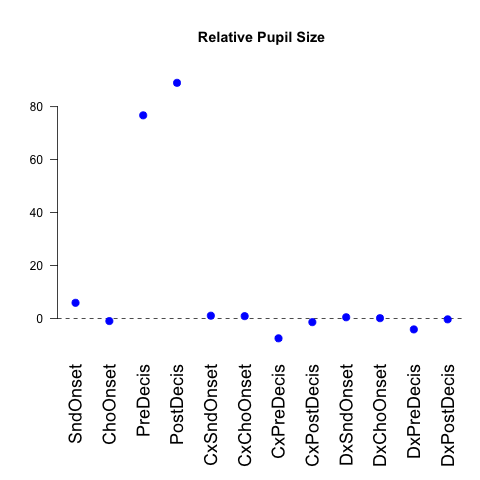

In [107]:
%%R

print(summary(ModelChoiceH_1))
BIC1 = BIC(ModelChoiceH_1)

print("High BIC:")
print(BIC1)
title_plot = "Relative Pupil Size"
coefplot(ModelChoiceH_1, intercept=FALSE, vertical = FALSE, col.pts="blue", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1),,main=title_plot)

# Separate by frame GLM analysis, focus only on predecision effects for simplicity

In [133]:
def generatePupilRegress(pupilInfo,choiceFrameAll,pupiIdxBehav,frameIdx):
    pupilTrialAll = []
    # initialize regressors trials together
    regSndOnsetlAll = []
    regChoOnsetlAll = []
    regPreDecAll = []
   # regPostDeclAll = []
    
    regSndOnsetlAll_C = []
    regChoOnsetlAll_C = []
    regPreDecAll_C= []
   # regPostDeclAll_C = []
    
    regSndOnsetlAll_D = []
    regChoOnsetlAll_D = []
    regPreDecAll_D = []
   # regPostDeclAll_D = []

    regSndOnsetlAll_Cho = []
    regChoOnsetlAll_Cho = []
    regPreDecAll_Cho = []
     
    regSndOnsetlAll_SumCli = []
    regChoOnsetlAll_SumCli = []
    regPreDecAll_SumCli = []
    

    partInfo = []
    
    # extract trials from the relevant frame
    
    choiceFrameSelect =  choiceFrameAll.loc[choiceFrameAll['frame'] == frameIdx]
    indexFrame = choiceFrameSelect.index.values # select only the frame relevant trials 
    
    pupiIdxBehavFrame = pupiIdxBehav.iloc[indexFrame]
    
    beginTrialIdx = pupiIdxBehavFrame['itiIdx'].values.astype(int)
    endTrialIdx = pupiIdxBehavFrame['confBeginIdx'].values.astype(int)
    
    j = 0
    for i in beginTrialIdx:
        
        trialPupilIter = pupilInfo.iloc[ i : endTrialIdx[j]]
        
        # define regressors:
        regSndOnset = ((trialPupilIter.SAMPLE_MESSAGE.str.contains('FIRST_SOUND_R'))*1).values # regressor for stimulus onset
        regChoiceOnset = (((trialPupilIter.SAMPLE_MESSAGE.str.contains('DISPLAY_FEEDBACK_R')) | (trialPupilIter.SAMPLE_MESSAGE.str.contains('DISPLAY_FEEDBACK_L')))*1).values # regressor for choice onset
    
        
        
        # boxcar regressor pre-decision
        reg0 = np.zeros(len(regSndOnset))
        reg0Begin = np.where(regSndOnset == 1)[0][0] # from the sound presentation
        reg0End = np.where(regChoiceOnset == 1)[0][0] # to the choice
        
        regLen = len(reg0[reg0Begin:reg0End])    
        reg0[reg0Begin:reg0End] = [1/regLen] * regLen # normalize boxcar regressor by its length
        regPreDecision = reg0
        
        ## boxcar regressor post-decision
        #reg0 = np.zeros(len(regSndOnset))
        #reg0Begin = np.where(regChoiceOnset == 1)[0][0] # from the choice
        #reg0End = len(regSndOnset) # to the end of the trial
        #
        #regLen = len(reg0[reg0Begin:reg0End])    
        #reg0[reg0Begin:reg0End] = [1/regLen] * regLen # normalize boxcar regressor by its length
        #regPostDecision = reg0
        
        # add pupil data
        pupilTrialAll.extend(trialPupilIter.zPupil.values)
        
        # calculate convolved regressors
        conRegSndOnset =  numpy.convolve(regSndOnset, h, mode='full')[0:len(regSndOnset)]
        conRegChoiceOnset = numpy.convolve(regChoiceOnset, h, mode='full')[0:len(regChoiceOnset)]
        conRegPreDecision = numpy.convolve(regPreDecision, h, mode='full')[0:len(regPreDecision)]
       # conRegPostDecision = numpy.convolve(regPostDecision, h, mode='full')[0:len(regPostDecision)]
        
        # add up the regressor
        regSndOnsetlAll.extend(conRegSndOnset)
        regChoOnsetlAll.extend(conRegChoiceOnset)
        regPreDecAll.extend(conRegPreDecision)
       # regPostDeclAll.extend(conRegPostDecision)
        
        ################################################
        # extract parametric modulators from behaviour.#
        ################################################
        
        confParamIter = choiceFrameSelect.iloc[j].zConf    
        absDFreqParamIter = choiceFrameSelect.iloc[j].zAbsDFreq    
        choFreqParamIter = choiceFrameSelect.iloc[j].zChoFreq    
        sumFreqParamIter = choiceFrameSelect.iloc[j].zTotFreq    

        partIter = choiceFrameSelect.iloc[j].part    

        
        # confidence modulated regressor
        regSndOnsetlAll_C.extend(conRegSndOnset*confParamIter)
        regChoOnsetlAll_C.extend(conRegChoiceOnset*confParamIter)
        regPreDecAll_C.extend(conRegPreDecision*confParamIter)
      #  regPostDeclAll_C.extend(conRegPostDecision*confParamIter)
        
        # difficulty modulated regressor
        regSndOnsetlAll_D.extend(conRegSndOnset*absDFreqParamIter)
        regChoOnsetlAll_D.extend(conRegChoiceOnset*absDFreqParamIter)
        regPreDecAll_D.extend(conRegPreDecision*absDFreqParamIter)
      #  regPostDeclAll_D.extend(conRegPostDecision*absDFreqParamIter)

        regSndOnsetlAll_Cho.extend(conRegSndOnset*choFreqParamIter)
        regChoOnsetlAll_Cho.extend(conRegChoiceOnset*choFreqParamIter)    
        regPreDecAll_Cho.extend(conRegPreDecision*choFreqParamIter)
        
        
        regSndOnsetlAll_SumCli.extend(conRegSndOnset*sumFreqParamIter)
        regChoOnsetlAll_SumCli.extend(conRegChoiceOnset*sumFreqParamIter)    
        regPreDecAll_SumCli.extend(conRegPreDecision*sumFreqParamIter)
        
        
        partInfo.extend([partIter]*len(conRegPreDecision)) # add column including participant information

    
        j = j + 1
        
    pupilRegressModel = pd.DataFrame()   
    pupilRegressModel['pupil'] = pupilTrialAll
    pupilRegressModel['SndOnset']=regSndOnsetlAll
    pupilRegressModel['ChoOnset']=regChoOnsetlAll
    pupilRegressModel['PreDecis']=regPreDecAll
   # pupilRegressModel['PostDecis']=regPostDeclAll
    pupilRegressModel['CxSndOnset']=regSndOnsetlAll_C
    pupilRegressModel['CxChoOnset']=regChoOnsetlAll_C
    pupilRegressModel['CxPreDecis']=regPreDecAll_C
   # pupilRegressModel['CxPostDecis']=regPostDeclAll_C
    pupilRegressModel['DxSndOnset']=regSndOnsetlAll_D
    pupilRegressModel['DxChoOnset']=regChoOnsetlAll_D
    pupilRegressModel['DxPreDecis']=regPreDecAll_D
   # pupilRegressModel['DxPostDecis']=regPostDeclAll_D
    
    
    pupilRegressModel['ChoCxSndOnset']=regSndOnsetlAll_Cho
    pupilRegressModel['ChoCxChoOnset']=regChoOnsetlAll_Cho
    pupilRegressModel['ChoCxPreDecis']=regPreDecAll_Cho
    
    
    pupilRegressModel['SumCxSndOnset']=regSndOnsetlAll_SumCli
    pupilRegressModel['SumCxChoOnset']=regChoOnsetlAll_SumCli
    pupilRegressModel['SumCxPreDecis']=regPreDecAll_SumCli

    pupilRegressModel['Part']=partInfo
    
    
    return pupilRegressModel

In [134]:
pupilRegressModelH = generatePupilRegress(pupilInfo,choiceFrameAll,pupiIdxBehav,1)
pupilRegressModelL = generatePupilRegress(pupilInfo,choiceFrameAll,pupiIdxBehav,2)

In [135]:
%R -i pupilRegressModelH -i pupilRegressModelL

## regression separated by frame using $\Sigma$Clicks

In [136]:
%%R
ModelPupilH_1 <- glm(pupil ~  SndOnset + ChoOnset + PreDecis  + CxSndOnset + CxChoOnset + CxPreDecis  +  DxSndOnset+DxChoOnset+ DxPreDecis + SumCxSndOnset + SumCxChoOnset + SumCxPreDecis , data=pupilRegressModelH)
ModelPupilL_1 <- glm(pupil ~  SndOnset + ChoOnset + PreDecis  + CxSndOnset + CxChoOnset + CxPreDecis  +  DxSndOnset+DxChoOnset+ DxPreDecis + SumCxSndOnset + SumCxChoOnset + SumCxPreDecis , data=pupilRegressModelL)


Call:
glm(formula = pupil ~ SndOnset + ChoOnset + PreDecis + CxSndOnset + 
    CxChoOnset + CxPreDecis + DxSndOnset + DxChoOnset + DxPreDecis + 
    SumCxSndOnset + SumCxChoOnset + SumCxPreDecis, data = pupilRegressModelH)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-8.1606  -0.3637   0.0867   0.4745   2.9019  

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.007639   0.000803   9.513  < 2e-16 ***
SndOnset       1.720460   0.069013  24.930  < 2e-16 ***
ChoOnset       9.927124   0.068831 144.224  < 2e-16 ***
PreDecis      51.243277   0.123496 414.938  < 2e-16 ***
CxSndOnset     1.146761   0.070770  16.204  < 2e-16 ***
CxChoOnset     0.394526   0.070535   5.593 2.23e-08 ***
CxPreDecis    -4.620842   0.122210 -37.811  < 2e-16 ***
DxSndOnset     0.062695   0.070427   0.890  0.37335    
DxChoOnset     0.119311   0.070143   1.701  0.08895 .  
DxPreDecis    -2.233415   0.115755 -19.294  < 2e-16 ***
SumCxSndOnset  0.709668   0.066

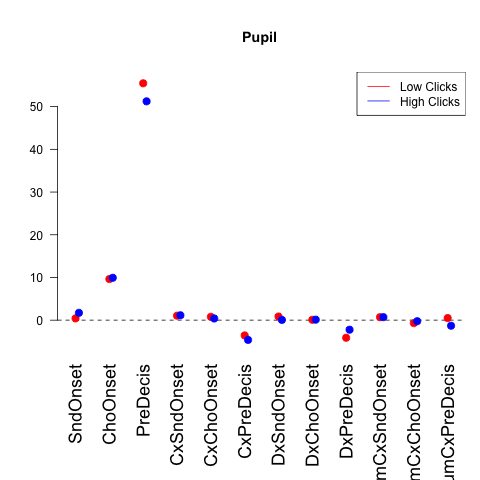

In [137]:
%%R
title_plot = "Pupil "

BIC1 = BIC(ModelPupilH_1)
BIC2 = BIC(ModelPupilL_1)

print(summary(ModelPupilH_1))
print(summary(ModelPupilL_1))
print("High BIC:")
print(BIC1)
print("Low BIC:")
print(BIC2)

coefplot(ModelPupilL_1,intercept=FALSE,vertical = FALSE,  col.pts="red", cex.var=1.5, cex.pts=2, mar = c(8,4,5,1)  ,main=title_plot)
coefplot(ModelPupilH_1, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="blue", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1))
legend("topright",  legend=c("Low Clicks", "High Clicks"),col=c("red", "blue"), lty=1:1, cex=1)

## regression separated by frame using Chosen Clicks number

In [111]:
%%R
ModelPupilH_1 <- glm(pupil ~  SndOnset + ChoOnset + PreDecis  + CxSndOnset + CxChoOnset + CxPreDecis  +  DxSndOnset+DxChoOnset+ DxPreDecis + ChoCxSndOnset + ChoCxChoOnset + ChoCxPreDecis , data=pupilRegressModelH)
ModelPupilL_1 <- glm(pupil ~  SndOnset + ChoOnset + PreDecis  + CxSndOnset + CxChoOnset + CxPreDecis  +  DxSndOnset+DxChoOnset+ DxPreDecis + ChoCxSndOnset + ChoCxChoOnset + ChoCxPreDecis , data=pupilRegressModelL)


Call:
glm(formula = pupil ~ SndOnset + ChoOnset + PreDecis + CxSndOnset + 
    CxChoOnset + CxPreDecis + DxSndOnset + DxChoOnset + DxPreDecis + 
    ChoCxSndOnset + ChoCxChoOnset + ChoCxPreDecis, data = pupilRegressModelH)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-8.1604  -0.3638   0.0863   0.4744   2.9021  

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.0073691  0.0008031   9.176  < 2e-16 ***
SndOnset       1.3248447  0.0802166  16.516  < 2e-16 ***
ChoOnset       9.9548407  0.0799995 124.436  < 2e-16 ***
PreDecis      52.7041738  0.1434858 367.313  < 2e-16 ***
CxSndOnset     1.0395449  0.0708941  14.663  < 2e-16 ***
CxChoOnset     0.4123402  0.0706564   5.836 5.35e-09 ***
CxPreDecis    -4.3621528  0.1221326 -35.717  < 2e-16 ***
DxSndOnset    -0.2511932  0.0777915  -3.229  0.00124 ** 
DxChoOnset     0.1353799  0.0774938   1.747  0.08064 .  
DxPreDecis    -1.0858503  0.1293896  -8.392  < 2e-16 ***
ChoCxSndOnset  0.883

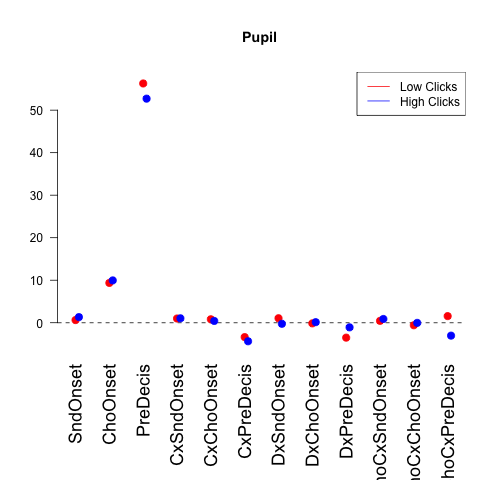

In [112]:
%%R
title_plot = "Pupil "

BIC1 = BIC(ModelPupilH_1)
BIC2 = BIC(ModelPupilL_1)

print(summary(ModelPupilH_1))
print(summary(ModelPupilL_1))
print("High BIC:")
print(BIC1)
print("Low BIC:")
print(BIC2)

coefplot(ModelPupilL_1,intercept=FALSE,vertical = FALSE,  col.pts="red", cex.var=1.5, cex.pts=2, mar = c(8,4,5,1)  ,main=title_plot)
coefplot(ModelPupilH_1, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="blue", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1))
legend("topright",  legend=c("Low Clicks", "High Clicks"),col=c("red", "blue"), lty=1:1, cex=1)

# Hierarchical GLM, splitted by frame

In [117]:
from pymer4.models import Lmer
#
regFormula1 = "pupil ~   ChoOnset + PreDecis + CxPreDecis + DxPreDecis+ ChoCxPreDecis + (ChoOnset + PreDecis + CxPreDecis + DxPreDecis+ ChoCxPreDecis |Part)"
#
model1 = Lmer(regFormula1, data=pupilRegressModelH)
model2 = Lmer(regFormula1, data=pupilRegressModelL)

#
model1.fit()
model2.fit()

table_data1 = model1.coefs.T
par_table_data1 = model1.fixef

table_data2 = model2.coefs.T
par_table_data2 = model2.fixef


unable to evaluate scaled gradient 

Model failed to converge: degenerate  Hessian with 11 negative eigenvalues 

Formula: pupil~ChoOnset+PreDecis+CxPreDecis+DxPreDecis+ChoCxPreDecis+(ChoOnset+PreDecis+CxPreDecis+DxPreDecis+ChoCxPreDecis|Part)

Family: gaussian	 Inference: parametric

Number of observations: 1324582	 Groups: {'Part': 20.0}

Log-likelihood: -1402262.073 	 AIC: 2804524.147

Random effects:

                   Name      Var     Std
Part        (Intercept)    0.007   0.086
Part           ChoOnset   48.163   6.940
Part           PreDecis  521.012  22.826
Part         CxPreDecis   27.329   5.228
Part         DxPreDecis   20.075   4.480
Part      ChoCxPreDecis   19.797   4.449
Residual                   0.486   0.697

              IV1            IV2   Corr
Part  (Intercept)       ChoOnset -0.275
Part  (Intercept)       PreDecis -0.643
Part  (Intercept)     CxPreDecis  0.063
Part  (Intercept)     DxPreDecis  0.356
Part  (Intercept)  ChoCxPreDecis -0.266
Part     ChoOnset     

In [118]:
# FULL MODEL TAKES TOO LONG TO RUN.

# from pymer4.models import Lmer
# #
# regFormula1 = "pupil ~   SndOnset + ChoOnset + PreDecis  + CxSndOnset + CxChoOnset + CxPreDecis  +  DxSndOnset+DxChoOnset+ DxPreDecis + ChoCxSndOnset + ChoCxChoOnset + ChoCxPreDecis + (SndOnset + ChoOnset + PreDecis  + CxSndOnset + CxChoOnset + CxPreDecis  +  DxSndOnset+DxChoOnset+ DxPreDecis + ChoCxSndOnset + ChoCxChoOnset + ChoCxPreDecis|Part)"
# #
# model1 = Lmer(regFormula1, data=pupilRegressModelH)
# model2 = Lmer(regFormula1, data=pupilRegressModelL)
# 
# #
# model1.fit()
# model2.fit()
# 
# table_data1 = model1.coefs.T
# par_table_data1 = model1.fixef
# 
# table_data2 = model2.coefs.T
# par_table_data2 = model2.fixef
# 

In [119]:
table_data1

,(Intercept),ChoOnset,PreDecis,CxPreDecis,DxPreDecis,ChoCxPreDecis
Estimate,0.00737471,9.69338,54.5191,-4.54701,-0.31349,-2.11449
2.5_ci,-0.0303407,6.64922,44.512,-6.84799,-2.28867,-4.08086
97.5_ci,0.0450901,12.7375,64.5262,-2.24603,1.66169,-0.148111
SE,0.0192429,1.55317,5.10576,1.17399,1.00776,1.00327
DF,24.2158,18.88,28.2505,18.3474,19.7581,19.0043
T-stat,0.383243,6.24102,10.678,-3.87312,-0.311075,-2.10759
P-val,0.704883,5.56057e-06,1.99531e-11,0.00108112,0.759002,0.0485748
Sig,,***,***,**,,*


In [120]:
table_data2

,(Intercept),ChoOnset,PreDecis,CxPreDecis,DxPreDecis,ChoCxPreDecis
Estimate,0.00837556,9.75746,59.3478,-3.00878,-2.60815,0.840919
2.5_ci,-0.0339741,6.89536,49.7446,-5.09596,-3.96216,-0.509997
97.5_ci,0.0507252,12.6196,68.951,-0.921587,-1.25413,2.19183
SE,0.0216074,1.46028,4.8997,1.06491,0.690836,0.689255
DF,27.1314,19.0642,35.9169,18.0498,18.2938,23.92
T-stat,0.387625,6.68189,12.1125,-2.82538,-3.77535,1.22004
P-val,0.701318,2.13833e-06,3.03722e-14,0.0111884,0.00135266,0.234343
Sig,,***,***,*,**,


([<matplotlib.axis.XTick at 0x7fcacef47cc0>,
 [Text(1.25, 0, '(Inter)'),
  Text(2.25, 0, 'ChoOnset'),
  Text(3.25, 0, 'PreDecis'),
  Text(4.25, 0, 'ConfxPreDecis'),
  Text(5.25, 0, '|ΔClicks|xPreDecis'),
  Text(6.25, 0, 'ChoClicksxPreDecis')])

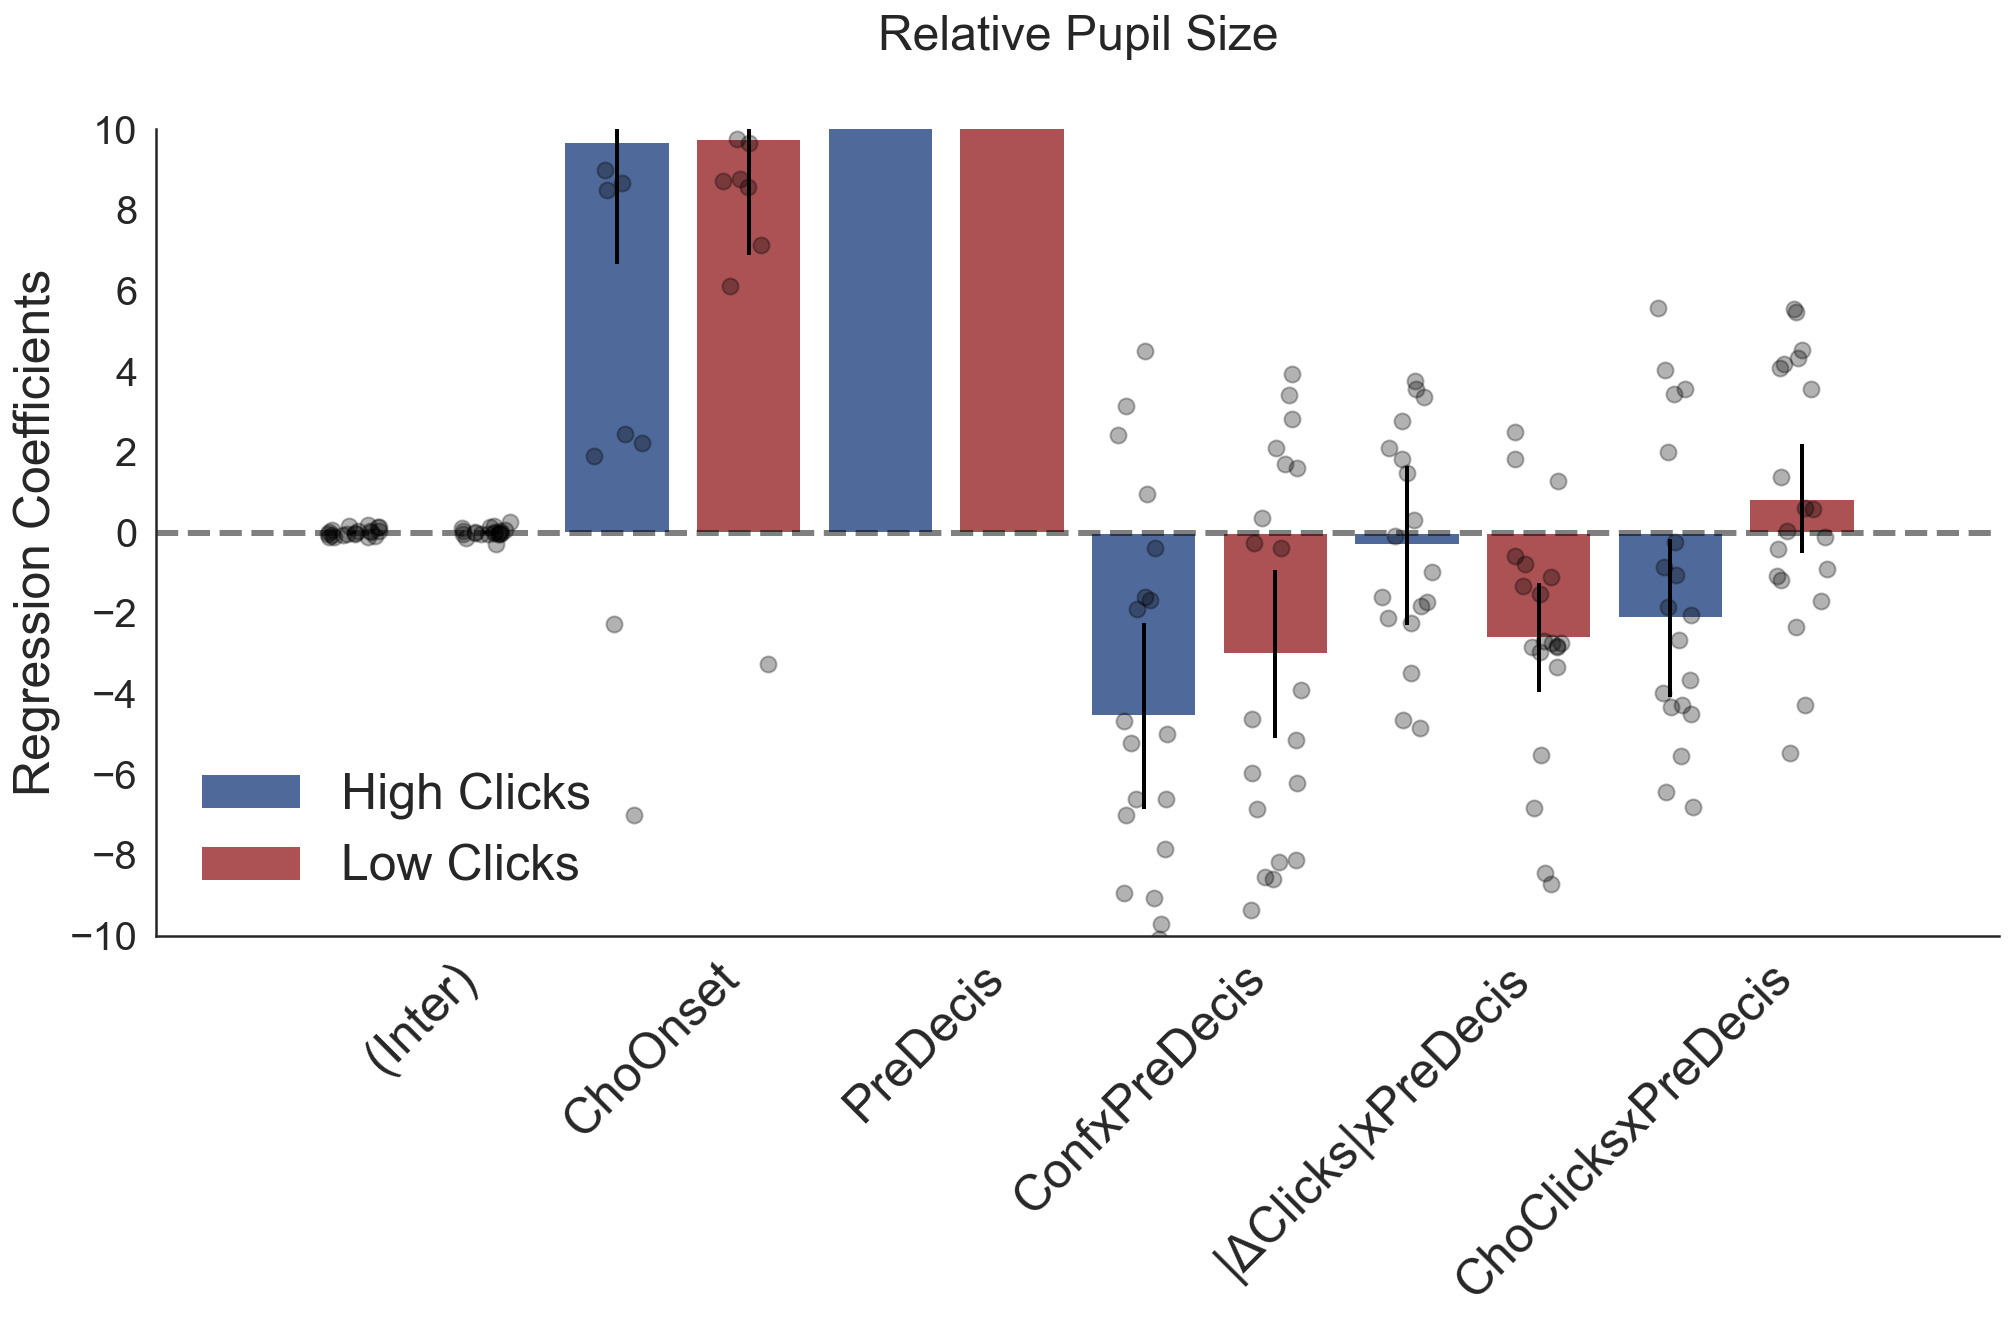

In [132]:
Coefpresplot_bar2(table_data1, par_table_data1,table_data2, par_table_data2, barcol1='#4F6A9A',barcol2='#AC5255', 
                  title='Relative Pupil Size', size='big',ymultiple=2, ticklabsize=20,labels= ['High Clicks','Low Clicks'])
plt.ylim(-10,10)
plt.xticks([1.25,2.25,3.25, 4.25,5.25,6.25],['(Inter)','ChoOnset','PreDecis','ConfxPreDecis','|ΔClicks|xPreDecis','ChoClicksxPreDecis'], rotation=45)

([<matplotlib.axis.XTick at 0x7fcab4954320>,
 [Text(1.25, 0, '(Inter)'),
  Text(2.25, 0, 'ChoOnset'),
  Text(3.25, 0, 'PreDecis'),
  Text(4.25, 0, 'ConfxPreDecis'),
  Text(5.25, 0, '|ΔClicks|xPreDecis'),
  Text(6.25, 0, 'ChoClicksxPreDecis')])

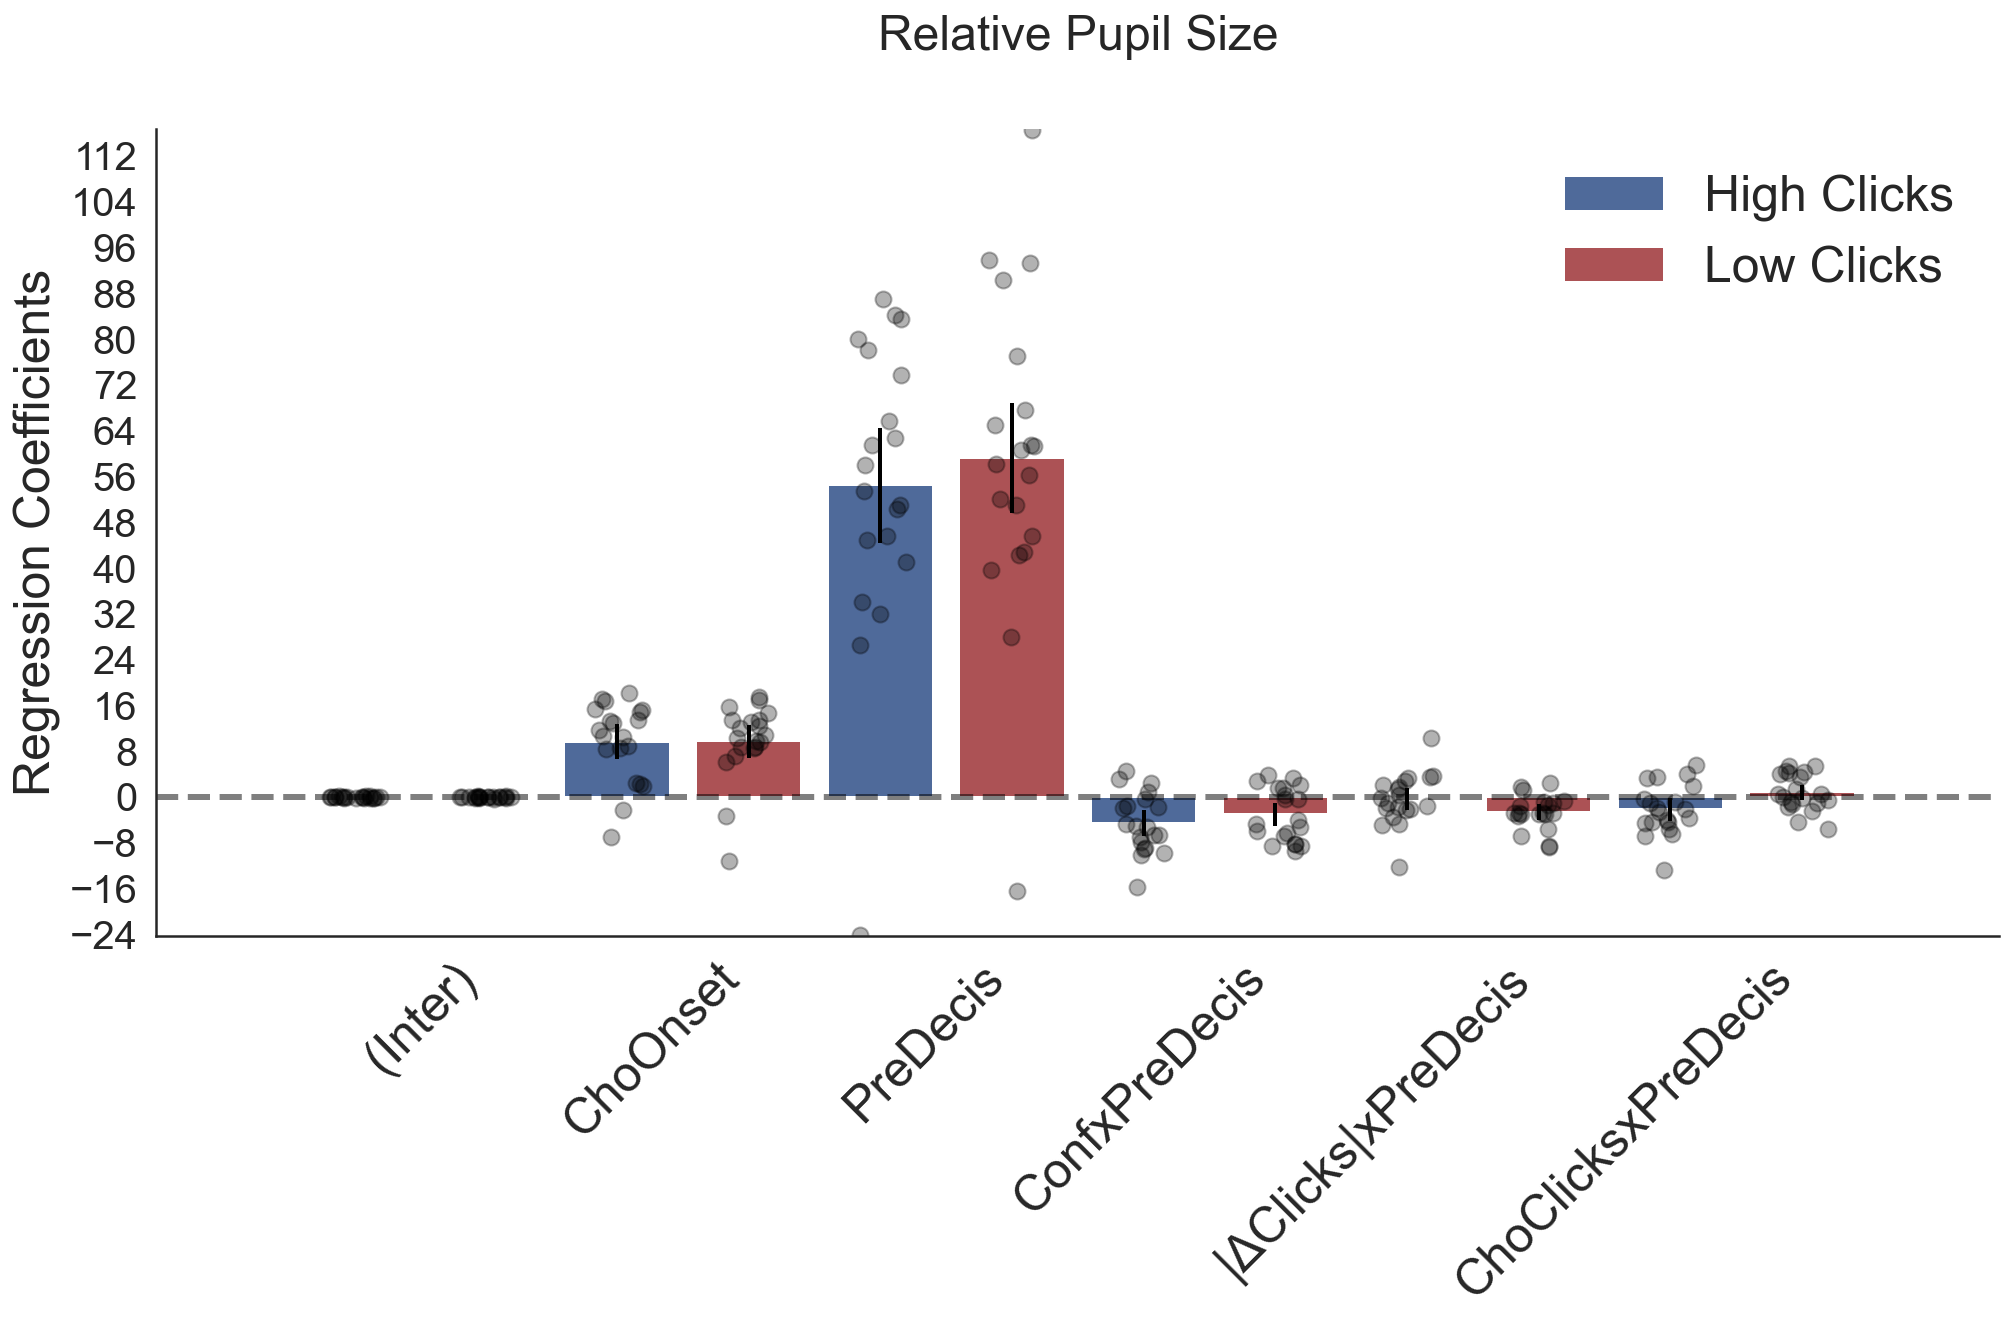

In [127]:
Coefpresplot_bar2(table_data1, par_table_data1,table_data2, par_table_data2, barcol1='#4F6A9A',barcol2='#AC5255', 
                  title='Relative Pupil Size', size='big',ymultiple=8, ticklabsize=20,labels= ['High Clicks','Low Clicks'])
plt.xticks([1.25,2.25,3.25, 4.25,5.25,6.25],['(Inter)','ChoOnset','PreDecis','ConfxPreDecis','|ΔClicks|xPreDecis','ChoClicksxPreDecis'], rotation=45)

In [ ]:
stats.ttest_rel(par_table_data1.ChoCxPreDecis.values,par_table_data2.ChoCxPreDecis.values)

In [128]:
stats.ttest_rel(par_table_data1.ChoCxPreDecis.values,par_table_data2.ChoCxPreDecis.values)

Ttest_relResult(statistic=-2.057036872007583, pvalue=0.05367572210591977)

In [131]:
print(np.mean(par_table_data1.ChoCxPreDecis.values))
print(np.mean(par_table_data2.ChoCxPreDecis.values))
print(np.mean(par_table_data1.ChoCxPreDecis.values) - np.mean(par_table_data2.ChoCxPreDecis.values))

-2.114486240454737
0.8409185869733099
-2.9554048274280467


## -- [end ]

## Import packages

In [1]:
import numpy as np
import pandas as pd
from pandas.core.frame import DataFrame as DF

import seaborn as sns
sns.set(color_codes=True)
#np.random.seed(sum(map(ord, "distributions")))
from sklearn import linear_model  # packages for the logistic regression function to plot the logistic regression 
from sklearn.linear_model import LogisticRegression # packages for the logistic regression function to plot the logistic regression 
import scipy
from scipy import stats, integrate
from scipy.stats import mode
from scipy.stats.stats import pearsonr # Pearson's correlation
from copy import copy as copy
import operator as operator
import pylab

# Plotting tools
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%pylab inline
figsize(5, 5)

import glob

import os
# Added to avoid OMP:error#15
os.environ['KMP_DUPLICATE_LIB_OK']='True'

Populating the interactive namespace from numpy and matplotlib


/Users/pradyumna/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['copy', 'pylab']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
import rpy2

%load_ext rpy2.ipython
# Set up interface with R
# Make it easy to set and find values in a multi-index DF
idx = pd.IndexSlice
# Set up interface with R
%config InlineBackend.figure_format = 'retina'
import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore", category=RRuntimeWarning)


In [3]:
%%R
library(lme4)
#library(car)
library(optimx)
#library(ggplot2)
library(MASS)
#library(broom)
#library(dplyr)
library(reshape2)
library(arm)
library(multcomp)
library(pbkrtest)

R[write to console]: Loading required package: Matrix

R[write to console]: 
arm (Version 1.10-1, built: 2018-4-12)


R[write to console]: Working directory is /Users/pradyumna/Documents/GiTs/pupilPEB2021/Code PupilClicks


R[write to console]: Loading required package: mvtnorm

R[write to console]: Loading required package: survival

R[write to console]: Loading required package: TH.data

R[write to console]: 
Attaching package: ‘TH.data’


R[write to console]: The following object is masked from ‘package:MASS’:

    geyser




In [4]:
%%R
# Use in case the libraries are not available in the system
#install.packages('lme4')
#install.packages("car")
#install.packages("ggplot2")
#install.packages("broom")
#install.packages("arm")
#install.packages("ggplot2")
#install.packages("optimx")
#install.packages("multcomp")

NULL


<a id='LoadFunc'></a>
# 2. Defining Functions

#### Taken from Folke et al. (2016)

### Plot distributions

In [5]:
def participant_densities(data, var, xlim=(0,100), rug=True, title = ''):
    # a counter that tells us where a given participant's data should be plotted
    order = 1

    # a list of all the participants in the dataset
    participants = data.loc[:, 'part'].unique()

    # defining the figure size
    sns.set_style('white')
    fig = figure(figsize=(10,10))

    for x in participants:
        # defining the sub figures
     #       sub={}
     #       sub['%s' % x] = plt.subplot(len(participants)/2, 4, order)
     #       sns.kdeplot(data.loc[data['part'] == x, var].values, ax = sub['%s' % x], shade=True)
     #       #if rug==True:
     #       #    sns.rugplot(data.loc[data['Part'] == x, var].values, ax = sub['%s' % x])
     #       sub['%s' % x].set_title('participant %s' % x)
     #       #sub['%s' % x].set_xlim(xlim)

            sns.kdeplot(data.loc[data['part'] == x, var].values, shade=True)

            
            order += 1
    fig.suptitle(title, fontsize = 25)


### Split variable into participantwise quantiles

In [6]:
def parsplit(DF, input, quantiles):
    qvalues = pd.qcut(DF[input], quantiles, labels = range(1, quantiles+1))
    return qvalues

### Full simple logistic graph

In [7]:
def logisticplot_all (moderator, modhigh, modlow, data, xaxis='zDV', yaxis='G_choice', ylab='P(Chose Reference Item)', xlab='DV (Z-score)',
                 modhighcol='#000000', modlowcol='#AAAAAA', title='empty', parvar='SubNo'):
    
    sns.set(font_scale=1.5, style='white')
    fig = figure(figsize=(6,5))
    fig.set_facecolor('white')
    
    # defining the sigmoid function
    def model(x):
        y = 1 / (1 + np.exp(-x))
        return y
    
    sub = plt.subplot()


    #run the classifier
    clf = linear_model.LogisticRegression(C=1e5)

    # Paula used these dictionaries to store the values of the predictive lines for all the participants.
    logit_low = {}
    logit_high = {}

    # I think this defines the problem space
    X_test = np.linspace(-5,10,300)

    # fitting the predictive logistic model for the low_confidence trials, for a participant specified by x
    # first I specify the value difference right - left, then I specify the choices, left or right
    clf.fit(data.loc[data[(data[moderator]==0)].index, xaxis][:, np.newaxis],
            data.loc[data[(data[moderator]==0)].index, yaxis])
    logit_low = model(X_test*clf.coef_ + clf.intercept_).ravel()

    print ('Low measure:logit coef =',clf.coef_, '; Intercept: ', clf.intercept_)


    # fitting the predictive logistic model for the high_confidence trials, for a participant specified by x
    # first I specify the value difference right - left, then I specify the choices, left or right
    clf.fit(data.loc[data[(data[moderator]==1)].index, xaxis][:, np.newaxis],
            data.loc[data[(data[moderator]==1)].index, yaxis])
    logit_high = model(X_test * clf.coef_ + clf.intercept_).ravel()
    
    print ('high measure:logit coef =',clf.coef_, '; Intercept: ', clf.intercept_)

    
    
    #Plotting the predictive lines
    line_high = sub.plot(X_test, logit_high,'r--', color=modhighcol, linewidth=5, label=modhigh, zorder=6)
    line_low = sub.plot(X_test, logit_low,'r--', color=modlowcol, linewidth=5, label=modlow, zorder=5)


    #Plotting the binned data
    data['DVBin2'] = data.groupby(parvar).apply(parsplit, input=xaxis, quantiles=4).values
    
    # determine the x coordinates
    x_cords= data.groupby('DVBin2')[xaxis].mean()
    
    # determine low y coordinates
    y_cords_low = data.loc[(data[moderator]==0), :].groupby('DVBin2')[yaxis].mean().values
    
    # determine low y standard errors
    test = pd.DataFrame(data.loc[(data[moderator]==0), :].groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
    y_low_error = test.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))
    
    
    # determine high y coordinates
    y_cords_high = data.loc[(data[moderator]==1), :].groupby('DVBin2')[yaxis].mean().values
    
    # determine high y standard errors
    test2 = pd.DataFrame(data.loc[data[moderator]==1, :].groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
    y_high_error = test2.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))
    
    # plot the low points
    plt.scatter(x_cords, y_cords_low, c=modlowcol, marker='D', s=60, zorder=1)
    # plot low error bars
    plt.errorbar(x_cords, y_cords_low, yerr=y_low_error, fmt='o', zorder=3, c=modlowcol)
    
    # plot the high points
    plt.scatter(x_cords, y_cords_high, c=modhighcol, marker='o', s=60, zorder=2)
    # plot high error bars
    plt.errorbar(x_cords, y_cords_high, yerr=y_high_error, fmt='o', zorder=4, c=modhighcol)
    
    
    # Set Labels
    sub.set_ylabel(ylab, fontsize=28)
    sub.set_xlabel(xlab, fontsize=28)

    # Set Ticks
    sub.set_xticks((-5,-3,-1,1,3,5))
    sub.set_yticks((0,0.25,0.5,0.75,1))
    sub.tick_params(axis='both', which='major', labelsize=20)

    # Set Limits
    sub.set_ylim(-0.01, 1.01)
    sub.set_xlim(-5, 5)

    # Set Title
    if title == 'empty':
        sub.set_title('')
    else:
        sub.set_title(title)
    
    leg = sub.legend(loc=0, prop={'size':20})
    leg.get_frame().set_linewidth(0.0)

    sns.despine()
    
    return plt

### Full simple logistic graph (no bins)

In [8]:
def logisticplot_simpl (moderator, modhigh, modlow, data, xaxis='zDV', yaxis='G_choice', ylab='P(Chose Reference Item)', xlab='DV (Z-score)',
                 modhighcol='#000000', modlowcol='#AAAAAA', title='empty', parvar='SubNo'):
    
    sns.set(font_scale=1.5, style='white')
    fig = figure(figsize=(8,7))
    fig.set_facecolor('white')
    
    # defining the sigmoid function
    def model(x):
        y = 1 / (1 + np.exp(-x))
        return y
    
    sub = plt.subplot()


    #run the classifier
    clf = linear_model.LogisticRegression(C=1e5)

    # Paula used these dictionaries to store the values of the predictive lines for all the participants.
    logit_low = {}
    logit_high = {}

    # I think this defines the problem space
    X_test = np.linspace(-5,10,300)

    # fitting the predictive logistic model for the low_confidence trials, for a participant specified by x
    # first I specify the value difference right - left, then I specify the choices, left or right
    clf.fit(data.loc[data[(data[moderator]==0)].index, xaxis][:, np.newaxis],
            data.loc[data[(data[moderator]==0)].index, yaxis])
    logit_low = model(X_test*clf.coef_ + clf.intercept_).ravel()
    print ('Low measure coef',clf.coef_)
    
    # fitting the predictive logistic model for the high_confidence trials, for a participant specified by x
    # first I specify the value difference right - left, then I specify the choices, left or right
    clf.fit(data.loc[data[(data[moderator]==1)].index, xaxis][:, np.newaxis],
            data.loc[data[(data[moderator]==1)].index, yaxis])
    logit_high = model(X_test * clf.coef_ + clf.intercept_).ravel()
    print ('High measure coef',clf.coef_)



    #Plotting the predictive lines
    line_high = sub.plot(X_test, logit_high, color=modhighcol, linewidth=5, label=modhigh, zorder=6)
    line_low = sub.plot(X_test, logit_low, color=modlowcol, linewidth=5, label=modlow, zorder=5) 
    
    # Set Labels
    sub.set_ylabel(ylab, fontsize=30)
    sub.set_xlabel(xlab, fontsize=30)

    # Set Ticks
    sub.set_xticks((-5,-3,-1,1,3,5))
    sub.set_yticks((0,0.25,0.5,0.75,1))
    sub.tick_params(axis='both', which='major', labelsize=20)

    # Set Limits
    sub.set_ylim(-0.01, 1.01)
    sub.set_xlim(-5, 5)

    # Set Title
    if title == 'empty':
        sub.set_title('')
    else:
        sub.set_title(title)
    
    sub.legend(loc=0, prop={'size':20})
    leg.get_frame().set_linewidth(0.0)

    sns.despine()

### Regression Coefficients Plot

In [9]:
def Coefpresplot(regtable, intercept=False, title='Regression Coefficients', size='big', ylimits=(), ymultiple=0.5, ticklabsize=25, n_ET_predictors = 0):

    # Import itertools so that we can iterate through the colours
    import itertools
    
    # Import locators so that we can tidy up the yaxis
    from matplotlib.ticker import MultipleLocator, FormatStrFormatter
    
    # rounding function to get edges to even 0.5 values
    def round_to(n, precision):
        correction = 0.5 if n >= 0 else -0.5
        return int( n/precision+correction ) * precision

    def round_to_5(n):
        return round_to(n, 0.5)

    # Set seaborn style for the plot
    sns.set(style='white')
    
    # Generate the figure
    if size=='big':
        fig = plt.figure(figsize=[20,8])
    elif size=='long':
        fig = plt.figure(figsize=[20,4])
    elif size=='narrow':
        fig = plt.figure(figsize=[10,4])
        
    fig.suptitle(title, fontsize=20)
    gs = GridSpec(1,1,bottom=0.18,left=0.18,right=0.82)
    ax = fig.add_subplot(gs[0,0])
    
    # Set axis limits based on whether to include the intercept or not    
    if intercept == True:
        XLim = (0.75, len(regtable.columns) + 0.25)
        YLim = (round_to_5(regtable.loc['CImin', :].min()-0.1), round_to_5(regtable.loc['CImax', :].max()+0.2))
    else:
        XLim = (0.75, len(regtable.columns) - 0.75)
        YLim = (round_to_5(regtable.loc['CImin', regtable.columns[1]:].min()-0.2), round_to_5(regtable.loc['CImax', regtable.columns[1]:].max()+0.2))
    if ylimits != ():
        YLim = ylimits
    ax.set_xlim(XLim)
    ax.set_ylim(YLim)
    
    # Draw a line through the 0-value on the y-axis
    line = ax.plot(XLim, [0, 0], color='black', ls='--', alpha = 0.5, lw=3)
    
    
    # If intercept is true, plot the coefficient for the intercept
    if intercept == True:
        Coefficients = regtable.columns
    else:
        Coefficients = regtable.columns[1:]
        
    # Determine the colours for the coefficients based on the n_ET_variable
    n_predictors = len(Coefficients)
    n_non_ET_predictors = n_predictors - n_ET_predictors
    
    colourlist = ['#000000'] * n_non_ET_predictors + ['#03719c'] * n_ET_predictors
    
        
    # Plot all the coefficients with 95% CI
    position = 0
    for Coefficient in Coefficients:
        position += 1
        ax.plot(position, regtable.loc['coefficient', Coefficient], marker='o', ms=8, color=colourlist[position-1],)
        ax.errorbar(position, regtable.loc['coefficient', Coefficient],
                    yerr=regtable.loc['se', Coefficient]*1.96, lw=2, color=colourlist[position-1])

    # Setting the x-axis major tick's location
    ax.set_xticks(range(1, position+1))
    
    # set the y-axis major tick position
    ax.yaxis.set_major_locator(MultipleLocator(ymultiple))


    # Setting the x-axis major tick's label
    if intercept == True:
        ax.set_xticklabels(regtable.columns, rotation=40)
    else: 
        ax.set_xticklabels(regtable.columns[1:], rotation=40)
    
    ax.tick_params(axis='both', which='major', labelsize=ticklabsize)
    ax.set_ylabel('Fixed Effects Coefficients', fontsize=18)
    
    # Autoformats the ticklabels for the xaxis
    fig.autofmt_xdate()
    
    sns.despine()

In [10]:
def Coefpresplot2(regtable,regtable2, intercept=False, title='Regression Coefficients', size='big', ylimits=(), ymultiple=0.5, ticklabsize=25, n_ET_predictors = 0):

    # Import itertools so that we can iterate through the colours
    import itertools
    
    # Import locators so that we can tidy up the yaxis
    from matplotlib.ticker import MultipleLocator, FormatStrFormatter
    
    # rounding function to get edges to even 0.5 values
    def round_to(n, precision):
        correction = 0.5 if n >= 0 else -0.5
        return int( n/precision+correction ) * precision

    def round_to_5(n):
        return round_to(n, 0.5)

    # Set seaborn style for the plot
    sns.set(style='white')
    
    # Generate the figure
    if size=='big':
        fig = plt.figure(figsize=[20,8])
    elif size=='long':
        fig = plt.figure(figsize=[20,4])
    elif size=='narrow':
        fig = plt.figure(figsize=[10,4])
        
    fig.suptitle(title, fontsize=20)
    gs = GridSpec(1,1,bottom=0.18,left=0.18,right=0.82)
    ax = fig.add_subplot(gs[0,0])
    

    # Set axis limits based on whether to include the intercept or not    
    
       
    
    if intercept == True:
        
        XLim = (0.75, len(regtable.columns) + 0.25)
        
        #Determine the Ymax and Ymin for both regresions results
        if round_to_5(regtable.loc['CImin', :].min()) < round_to_5(regtable2.loc['CImin', :].min()):
            Ymin = round_to_5(regtable.loc['CImin', :].min()-0.5)
        else :
            Ymin = round_to_5(regtable2.loc['CImin',:].min()-0.5)
        if round_to_5(regtable.loc['CImax', :].max()) > round_to_5(regtable2.loc['CImax', :].max()):
            Ymax = round_to_5(regtable.loc['CImax', :].max()+0.5)
        else :
            Ymax = round_to_5(regtable2.loc['CImax', :].max()+0.5)      

        YLim = (Ymin, Ymax)    
    else:
        XLim = (0.75, len(regtable.columns) - 0.75)
        
        #Determine the Ymax and Ymin for both regresions results
        if round_to_5(regtable.loc['CImin', regtable.columns[1]:].min()) < round_to_5(regtable2.loc['CImin', regtable.columns[1]:].min()):
            Ymin = round_to_5(regtable.loc['CImin', regtable.columns[1]:].min()-0.5)
        else :
            Ymin = round_to_5(regtable2.loc['CImin',regtable.columns[1]:].min()-0.5)
        if round_to_5(regtable.loc['CImax', regtable.columns[1]:].max()) > round_to_5(regtable2.loc['CImax', regtable.columns[1]:].max()):
            Ymax = round_to_5(regtable.loc['CImax', regtable.columns[1]:].max()+0.5)
        else :
            Ymax = round_to_5(regtable2.loc['CImax', regtable.columns[1]:].max()+0.5)      
        
        YLim = (Ymin, Ymax)
    
    if ylimits != ():
        YLim = ylimits
    ax.set_xlim(XLim)
    ax.set_ylim(YLim)
    
    # Draw a line through the 0-value on the y-axis
    line = ax.plot(XLim, [0, 0], color='black', ls='--', alpha = 0.5, lw=3)
    
    
    # If intercept is true, plot the coefficient for the intercept
    # both regtable should have the same regressors (and in the same order)

    if intercept == True:
        Coefficients = regtable.columns
 #       Coefficients2 = regtable2.columns
    else:
        Coefficients = regtable.columns[1:]
#        Coefficients2 = regtable2.columns[1:]
        
    # Determine the colours for the coefficients based on the n_ET_variable
    n_predictors = len(Coefficients)
    n_non_ET_predictors = n_predictors - n_ET_predictors
    
    colourlist = ['#000000'] * n_non_ET_predictors + ['#03719c'] * n_ET_predictors
    
        
    # Plot all the coefficients with 95% CI
    position = 0
    for Coefficient in Coefficients:
        position += 1
        ax.plot(position-0.1, regtable.loc['coefficient', Coefficient], marker='o', ms=8, color='blue',label = 'Like')
        ax.plot(position+0.1, regtable2.loc['coefficient', Coefficient], marker='X', ms=8, color='red', label = 'Dislike')


        ax.errorbar(position-0.1, regtable.loc['coefficient', Coefficient],
                    yerr=regtable.loc['se', Coefficient]*1.96, lw=2, color='blue')
        ax.errorbar(position+0.1, regtable2.loc['coefficient', Coefficient],
                    yerr=regtable2.loc['se', Coefficient]*1.96, lw=2, color='red')
        
        if position == 1:
            ax.legend( prop={'size': 20})

 
    # Setting the x-axis major tick's location
    ax.set_xticks(range(1, position+1))
    
    # set the y-axis major tick position
    ax.yaxis.set_major_locator(MultipleLocator(ymultiple))

    # Setting the x-axis major tick's label
    if intercept == True:
        ax.set_xticklabels(regtable.columns, rotation=40)
    else: 
        ax.set_xticklabels(regtable.columns[1:], rotation=40)
    
    ax.tick_params(axis='both', which='major', labelsize=ticklabsize)
    ax.set_ylabel('Fixed Effects Coefficients', fontsize=18)
    
    # Autoformats the ticklabels for the xaxis
    fig.autofmt_xdate()

    sns.despine()
    fig.savefig(str('SavedFigures/'+title +'.png'), dpi = 200 )

In [11]:
def Coefpresplot_bar(regtable, mixtable, intercept=False, barcol='#000000', title='Regression Coefficients', size='big', ylimits=(), ymultiple=0.5, ticklabsize=25, n_ET_predictors = 0 ):

    # Import itertools so that we can iterate through the colours
    import itertools
    
    # Import locators so that we can tidy up the yaxis
    from matplotlib.ticker import MultipleLocator, FormatStrFormatter
    
    # rounding function to get edges to even 0.5 values
    def round_to(n, precision):
        correction = 0.5 if n >= 0 else -0.5
        return int( n/precision+correction ) * precision

    def round_to_5(n):
        return round_to(n, 0.5)
            
    # Set seaborn style for the plot
    sns.set(style='white')
    
    # Generate the figure
    if size=='big':
        fig = plt.figure(figsize=[20,8])
    elif size=='long':
        fig = plt.figure(figsize=[20,4])
    elif size=='narrow':
        fig = plt.figure(figsize=[10,4])
        
    fig.suptitle(title, fontsize=20)
    gs = GridSpec(1,1,bottom=0.18,left=0.18,right=0.82)
    ax = fig.add_subplot(gs[0,0])
    
    # Set axis limits based on whether to include the intercept or not    
    if intercept == True:
        XLim = (0, len(regtable.columns) + 1)
        YLim = (round_to_5(np.min(mixtable)-0.2), round_to_5(np.max(mixtable)+0.2))
    else:
        XLim = (0, len(regtable.columns) )
        YLim = (round_to_5(np.min(mixtable)-0.2), round_to_5(np.max(mixtable)+0.2))
    if ylimits != ():
        YLim = ylimits
    ax.set_xlim(XLim)
    ax.set_ylim(YLim)
    
    # Draw a line through the 0-value on the y-axis
    line = ax.plot(XLim, [0, 0], color='black', ls='--', alpha = 0.5, lw=3)
    
    
    # If intercept is true, plot the coefficient for the intercept
    if intercept == True:
        Coefficients = regtable.columns
    else:
        Coefficients = regtable.columns[1:]
        
    # Determine the colours for the coefficients based on the n_ET_variable
    n_predictors = len(Coefficients)
    n_non_ET_predictors = n_predictors - n_ET_predictors
    
    colourlist = [barcol] * n_non_ET_predictors + ['#03719c'] * n_ET_predictors
    
        
    # Plot all the coefficients with 95% CI
    position = 0
    for Coefficient in Coefficients:
        position += 1
        ax.bar(position, regtable.loc['coefficient', Coefficient], width=0.8,color=colourlist[position-1],)
        ax.errorbar(position, regtable.loc['coefficient', Coefficient],
                    yerr=regtable.loc['se', Coefficient]*1.96, lw=2, color='#000000')
        
   # Plot dots for the individual coefficients
    coef_num = len(mixtable)
    for i in range(1,coef_num):
        part_coefs = mixtable[i]
        position_parts= np.full(len(part_coefs), i, dtype=int)
        jittr = np.random.uniform(low=-0.5,high=0.5,size=len(part_coefs))/2
        ax.plot(position_parts+jittr, part_coefs, marker='o', ms=8, color='#000000',alpha=0.3,linestyle="None")

        

    # Setting the x-axis major tick's location
    ax.set_xticks(range(1, position+1))
    
    # set the y-axis major tick position
    ax.yaxis.set_major_locator(MultipleLocator(ymultiple))


    # Setting the x-axis major tick's label
    if intercept == True:
        ax.set_xticklabels(regtable.columns, rotation=40)
    else: 
        ax.set_xticklabels(regtable.columns[1:], rotation=40)
    
    ax.tick_params(axis='both', which='major', labelsize=ticklabsize)
    ax.set_ylabel('Regression Coefficients', fontsize=18)
    
    # Autoformats the ticklabels for the xaxis
    fig.autofmt_xdate()
    
    sns.despine()

In [12]:
def Coefpresplot_bar2(regtable1, mixtable1,regtable2, mixtable2, intercept=False, barcol1='#000000',barcol2='#000000', title='Regression Coefficients', size='big', ylimits=(), ymultiple=0.5, ticklabsize=25, n_ET_predictors = 0 ):

    # Import itertools so that we can iterate through the colours
    import itertools
    
    # Import locators so that we can tidy up the yaxis
    from matplotlib.ticker import MultipleLocator, FormatStrFormatter
    
    # rounding function to get edges to even 0.5 values
    def round_to(n, precision):
        correction = 0.5 if n >= 0 else -0.5
        return int( n/precision+correction ) * precision

    def round_to_5(n):
        return round_to(n, 0.5)
            
    # Set seaborn style for the plot
    sns.set(style='white')
    
    # Generate the figure
    if size=='big':
        fig = plt.figure(figsize=[20,8])
    elif size=='long':
        fig = plt.figure(figsize=[20,4])
    elif size=='narrow':
        fig = plt.figure(figsize=[10,4])
        
    fig.suptitle(title, fontsize=20)
    gs = GridSpec(1,1,bottom=0.18,left=0.18,right=0.82)
    ax = fig.add_subplot(gs[0,0])
    
    # Set axis limits based on whether to include the intercept or not   
    # Assumuing that regtable1 and regtable2 have exactly the same number of coefficients
    if intercept == True:
        XLim = (0, len(regtable1.columns) + 2)
        YLim = (round_to_5(np.min([mixtable1,mixtable2]))-0.2, round_to_5(np.max([mixtable1,mixtable2]))+0.2)
    else:
        XLim = (0, len(regtable1.columns) +1)
        YLim = (round_to_5(np.min([mixtable1,mixtable2]))-0.2, round_to_5(np.max([mixtable1,mixtable2]))+0.2)
    if ylimits != ():
        YLim = ylimits
    ax.set_xlim(XLim)
    ax.set_ylim(YLim)
    
    # Draw a line through the 0-value on the y-axis
    line = ax.plot(XLim, [0, 0], color='black', ls='--', alpha = 0.5, lw=3)
    
    
    # If intercept is true, plot the coefficient for the intercept
    # Assumuing that regtable1 and regtable2 have exactly the same number of coefficients

    if intercept == True:
        Coefficients = regtable1.columns
    else:
        if len(regtable1.columns)<len(mixtable1):
            Coefficients = regtable1.columns
        else:
            Coefficients = regtable1.columns[1:]
        
    # Determine the colours for the coefficients based on the n_ET_variable
    n_predictors = len(Coefficients)
    n_non_ET_predictors = n_predictors - n_ET_predictors
    
    # Color for conditions 1 and 2
    colourlist1 = [barcol1] * n_non_ET_predictors + ['#03719c'] * n_ET_predictors
    colourlist2 = [barcol2] * n_non_ET_predictors + ['#03719c'] * n_ET_predictors
    
        
    # Plot all the coefficients with 95% CI
    position = 0
    for Coefficient in Coefficients:
        position += 1
        # Plot condition 1
        ax.bar(position-0.2, regtable1.loc['coefficient', Coefficient], width=0.4,color=colourlist1[position-1],)
        ax.errorbar(position-0.2, regtable1.loc['coefficient', Coefficient],
                    yerr=regtable1.loc['se', Coefficient]*1.96, lw=2, color='#000000')

        # Plot condition 2
        ax.bar(position+0.2, regtable2.loc['coefficient', Coefficient], width=0.4,color=colourlist2[position-1],)
        ax.errorbar(position+0.2, regtable2.loc['coefficient', Coefficient],
                    yerr=regtable2.loc['se', Coefficient]*1.96, lw=2, color='#000000')

        
   # Plot dots for the individual coefficients
    # Assumuing that mixtable1 and mixtable2 have exactly the same number of elements 
    
    if intercept == True:
        coef_num = range(0,len(mixtable1)) 
    else:
        coef_num = range(1,len(mixtable1))
        
    for i in coef_num:
        # Plot dots condition 1
        part_coefs = mixtable1[i]
        position_parts= np.full(len(part_coefs), i, dtype=int)
        jittr = np.random.uniform(low=-0.2,high=0.2,size=len(part_coefs))/2
        ax.plot(position_parts-0.2+jittr, part_coefs, marker='o', ms=8, color='#000000',alpha=0.3,linestyle="None")

        # Plot dots condition 1
        part_coefs = mixtable2[i]
        position_parts= np.full(len(part_coefs), i, dtype=int)
        jittr = np.random.uniform(low=-0.2,high=0.2,size=len(part_coefs))/2
        ax.plot(position_parts+0.2+jittr, part_coefs, marker='o', ms=8, color='#000000',alpha=0.3,linestyle="None")
        

    # Setting the x-axis major tick's location
    ax.set_xticks(range(1, position+1))
    
    # set the y-axis major tick position
    ax.yaxis.set_major_locator(MultipleLocator(ymultiple))


    # Setting the x-axis major tick's label
    if intercept == True:
        ax.set_xticklabels(regtable1.columns, rotation=0)        
    else:
        if len(regtable1.columns)<len(mixtable1):
            ax.set_xticklabels(regtable1.columns, rotation=0)
        else:    
            ax.set_xticklabels(regtable1.columns[1:], rotation=0)
    
    ax.tick_params(axis='both', which='major', labelsize=ticklabsize)
    ax.set_ylabel('Regression Coefficients', fontsize=18)
    
    # Autoformats the ticklabels for the xaxis
    fig.autofmt_xdate()
    
    sns.despine()

In [13]:
def regtable(fix, fix_se, names):
    fixed_betas = DF(np.array(fix)); fixed_betas = fixed_betas.transpose(); fixed_betas.columns = names
    fixed_betas.loc[1] = np.array(fix_se)
    fixed_betas.loc[2] = fixed_betas.loc[0] - (fixed_betas.loc[1]*1.96)
    fixed_betas.loc[3] = fixed_betas.loc[0] + (fixed_betas.loc[1]*1.96)
    fixed_betas.index = ['coefficient', 'se', 'CImin', 'CImax']
    return fixed_betas

In [14]:
def correl_plot2 (data_all,data_all2,x_variable,y_variable,color1 = '#000000',color2 = '#000000',x_varlabel = "x_variable" ,y_varlabel = "y_variable", data_label =('Correct', 'Error'), title = "Pretty PLot"):

    f = plt.figure(figsize=(5, 8))
    sns.set(style='white', font_scale=1.8)
    ax = sns.regplot(data=data_all, x= x_variable, y=y_variable, fit_reg=False, ci=0, color= color1, scatter_kws={'s':70,'alpha':0.3},)
    ax = sns.regplot(data=data_all2, x= x_variable, y=y_variable, fit_reg=False, ci=0, color= color2, scatter_kws={'s':70,'alpha':0.3})
    ax.set(ylabel=y_varlabel, xlabel=x_varlabel)

    # For data 1
    x=data_all[x_variable]
    y=data_all[y_variable]
    fit = np.polyfit(x, y, deg=1)
    future = np.arange(min(x)-0.2, max(x)+0.2, 0.01)
    fit_fn = np.poly1d(fit)
    future_fit = np.polyval(fit_fn, future)
    p1 = ax.plot(future, future_fit, color=color1, lw=3, label = data_label[0])
    
    results = pearsonr(data_all[x_variable], data_all[y_variable])
    print ("Pearson's r = {0}".format(np.round(results[0], 3)), "p = ", np.round(results[1], 3))
    
    # For data 2
    x=data_all2[x_variable]
    y=data_all2[y_variable]
    fit = np.polyfit(x, y, deg=1)
    future = np.arange(min(x)-0.2, max(x)+0.2, 0.01)
    fit_fn = np.poly1d(fit)
    future_fit = np.polyval(fit_fn, future)
    p2 = ax.plot(future, future_fit, color=color2, lw=3,label = data_label[1] )
    sns.despine()
    #ax.set_title(title)    
    results = pearsonr(data_all2[x_variable], data_all2[y_variable])
    print ("Pearson's r = {0}".format(np.round(results[0], 3)), "p = ", np.round(results[1], 3))
    
    ax.legend()
    ax.set_title(title)

    #plt.legend((p1, p2), data_label )
    
    plt.show()

In [15]:
def logisticplot_all_sbj_slope(moderator, modhigh, modlow, data, xaxis='zDV', yaxis='G_choice', ylab='P(Chose Reference Item)', xlab='DV (Z-score)',
                 modhighcol='#000000', modlowcol='#AAAAAA', title='empty', parvar='SubNo'):
    
#inputs example   
#logisticplot_all('DDTSplit', 'High DDT', 'Low DDT', data=data_expL, xaxis='zDVal', yaxis='Choice', ylab='P(Right Item)', xlab='Difference in Value (DVal)',
#                 modhighcol='#4F6A9A', modlowcol='#B5C8E9', title='empty', parvar='Part')


    # Counter to know where to plot the particpant
    order = 1
    # Initialize the array to store coefs
    coefs_all = []

   # a list of all the participants in the dataset
    participants = data.loc[:, 'part'].unique()

    # defining the figure size
    sns.set_style('white')
    fig = figure(figsize=(5,5))

    for x in participants:
        # defining the sub figures
            sub={}
            sub['%s' % x] = plt.subplot(int(len(participants)/5+1), 5, order)
            
            
            # Extract dataframe for that particualt participant
            data_in = data.loc[data['part'] == x]
           
            sns.set(font_scale=1.5, style='white')
           
            # defining the sigmoid function
            def model(x):
                y = 1 / (1 + np.exp(-x))
                return y

            #sub = plt.subplot()
            sub['%s' % x].set_title('part. %s' % x, fontsize = 50 )


            #run the classifier
            clf = linear_model.LogisticRegression(C=1e5)

            # Paula used these dictionaries to store the values of the predictive lines for all the participants.
            logit_low = {}
            logit_high = {}
            logit_all = {}

            
            # I think this defines the problem space
            X_test = np.linspace(-5,10,300)

            # fitting the predictive logistic model for the low_confidence trials, for a participant specified by x
            # first I specify the value difference right - left, then I specify the choices, left or right
            clf.fit(data_in.loc[data_in[(data[moderator]==0)].index, xaxis][:, np.newaxis],
                    data_in.loc[data_in[(data[moderator]==0)].index, yaxis])
            logit_low = model(X_test*clf.coef_ + clf.intercept_).ravel()

            #print ('Part: ',x , ' Low measure:logit coef =',clf.coef_, '; Intercept: ', clf.intercept_)

            low_coef = clf.coef_
            low_intercept = clf.intercept_
            
            # fitting the predictive logistic model for the high_confidence trials, for a participant specified by x
            # first I specify the value difference right - left, then I specify the choices, left or right
            clf.fit(data_in.loc[data_in[(data_in[moderator]==1)].index, xaxis][:, np.newaxis],
                    data_in.loc[data_in[(data_in[moderator]==1)].index, yaxis])
            logit_high = model(X_test * clf.coef_ + clf.intercept_).ravel()

            #print ('Part: ',x ,' High measure:logit coef =',clf.coef_, '; Intercept: ', clf.intercept_)
            
            high_coef = clf.coef_
            high_intercept = clf.intercept_
            
            
            # fitting the predictive logistic model for all the trials, for a participant specified by x
            # first I specify the value difference right - left, then I specify the choices, left or right
            clf.fit(data_in[xaxis][:, np.newaxis],
                    data_in[yaxis])
            logit_all = model(X_test * clf.coef_ + clf.intercept_).ravel()

            #print ('Part: ',x ,' High measure:logit coef =',clf.coef_, '; Intercept: ', clf.intercept_)
            
            all_coef = clf.coef_
            all_intercept = clf.intercept_
    
            #Plotting the predictive lines
            line_high = sub['%s' % x].plot(X_test, logit_high, color=modhighcol, linewidth=5, label=modhigh, zorder=6,linestyle='-')
            line_low = sub['%s' % x].plot(X_test, logit_low, color=modlowcol, linewidth=5, label=modlow, zorder=5,linestyle='-')
            line_all = sub['%s' % x].plot(X_test, logit_all, color="#000000", linewidth=3, label=modlow, zorder=5,linestyle='-')
            
            coefs_part= np.column_stack((x,low_coef,low_intercept,high_coef,high_intercept,all_coef,all_intercept))
            coefs_all.append(coefs_part[0])

            
            #Plotting the binned data
            data_in['DVBin2'] = data_in.groupby(parvar).apply(parsplit, input=xaxis, quantiles=4).values[0]

            # determine the x coordinates
            x_cords= data.groupby('DVBin2')[xaxis].mean()

            # determine low y coordinates
            y_cords_low = data_in.loc[(data_in[moderator]==0), :].groupby('DVBin2')[yaxis].mean().values

            # determine low y standard errors
            test = pd.DataFrame(data_in.loc[(data_in[moderator]==0), :].groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
            y_low_error = test.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))

    
            # determine high y coordinates
            y_cords_high = data_in.loc[(data_in[moderator]==1), :].groupby('DVBin2')[yaxis].mean().values

            # determine high y standard errors
            test2 = pd.DataFrame(data_in.loc[data_in[moderator]==1, :].groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
            y_high_error = test2.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))

            # plot the low points
            plt.scatter(x_cords, y_cords_low, c=modlowcol, marker='D', s=60, zorder=1)
            # plot low error bars
            plt.errorbar(x_cords, y_cords_low, yerr=y_low_error, fmt='o', zorder=3, c=modlowcol)

            # plot the high points
            plt.scatter(x_cords, y_cords_high, c=modhighcol, marker='o', s=60, zorder=2)
            # plot high error bars
            plt.errorbar(x_cords, y_cords_high, yerr=y_high_error, fmt='o', zorder=4, c=modhighcol)

    
            # Set Labels
           # sub['%s' % x].set_ylabel(ylab, fontsize=30)
           # sub['%s' % x].set_xlabel(xlab, fontsize=30)

            # Set Ticks
            sub['%s' % x].set_xticks((-5,-3,-1,1,3,5))
            sub['%s' % x].set_yticks((0,0.25,0.5,0.75,1))
            sub['%s' % x].tick_params(axis='both', which='major', labelsize=30)

            # Set Limits
            sub['%s' % x].set_ylim(-0.01, 1.01)
            sub['%s' % x].set_xlim(-5, 5)
        

            sns.despine()
            
            order += 1
    
    custom_lines = [Line2D([0], [0], color=modhighcol, lw=4),
                Line2D([0], [0], color=modlowcol, lw=4)]
    fig.legend(custom_lines, [modhigh, modlow],loc = 4,fontsize=50)       

    fig.text(0.5, -0.01, xlab, ha='center',fontsize = 70)
    fig.text(-0.01, 0.5, ylab, va='center', rotation='vertical',fontsize = 70)
    
    coefs_all = pd.DataFrame(coefs_all,columns=['Participant','Low Coef','Low Intercept','High Coef','High Intercept','All Coef','All Intercept'])
    return coefs_all

In [16]:
def z_score1(data_all, part_def,z_score_var):
    z_matrix=[]
    z_matrix_aux=[]

    for i in (data_all[part_def].unique()):
        Choicedata = data_all.loc[data_all[part_def] == i]    
    
        pX_A= pd.to_numeric(Choicedata[z_score_var]) 
        pX_zA= (pX_A - np.mean(pX_A))/np.std(pX_A)

        z_matrix_aux= pX_zA.values
    
        for  j in range(len(z_matrix_aux)):    
            z_matrix.append(z_matrix_aux[j])
    return z_matrix

In [17]:
def splitBy(data_exp1, Splits_headers = ['ConfSplit', 'GSFMedSplit','DDTMedSplit'],Splits_variables = ['Conf', 'tGSF','tDDT']):
    
    median_matrix=[]
    median_matrix_aux=[]
    median_matrix_aux_cond=[]
    Split_cols = []
    
    for h in range(len(Splits_variables)):
        median_matrix=[]
        for i in unique(data_exp1["part"]):
            median_matrix_aux=[]
    
            for j in unique(data_exp1["frame"]):
                #median_matrix_aux_cond=[]
    
                #Extract data by participant and BlockCond (1: Like, 2: Dislike)
                Splitdata = data_exp1.loc[data_exp1['part'] == i]
                Splitdata = Splitdata.loc[Splitdata['frame'] == j]
                
                # Select the column to split
                Splitdata = Splitdata.loc[:,['Trial_Index_',Splits_variables[h]]]
                SplitSort = Splitdata.values
                # Sort for confidence column
                SplitSort = SplitSort[np.argsort(SplitSort[:, 1])]
                #print(SplitSort)
                lenPart = len(Splitdata)
                #print(lenPart)
                # Generate column with median order
                median_low = [0] * int (lenPart/2)
    
                if len(SplitSort) != 2*len(median_low):
                    median_high=  [1] * int(len(SplitSort)-len(median_low))
                else: median_high = [1] * int (lenPart/2)
            
                median_split_order = median_low + median_high
                #Attach split median order column (1 and 0)
                median_aux= np.column_stack((SplitSort,median_split_order))
                #Sort back to trial number
                SplitSorted = median_aux[np.argsort(median_aux[:, 0])]
                #print(len(SplitSorted))
                
                for kk in range(len(SplitSorted)): 
                    if len(median_matrix_aux) == 0 :
                        median_matrix_aux = SplitSorted[0]
                    else:
                        median_matrix_aux = np.vstack([median_matrix_aux, SplitSorted[kk]])
            
            
            #print(["participant "+ str(i)+ " done"])
            # sort after adding both conditions    
            median_matrix_aux = median_matrix_aux[np.argsort(median_matrix_aux[:, 0])]
            
            #Extract only the column with the median split information
            median_matrix_aux = median_matrix_aux[:,2]
            
            #append to median matrix for the participants
            for k in range(len(median_matrix_aux)):    
                median_matrix.append(median_matrix_aux [k])
        
        median_matrix = pd.DataFrame(median_matrix,columns=[Splits_headers[h]])
        #print(len (median_matrix))
        #add new column (new split variable columns) to the split matrix
        if  h == 0:
            Split_cols = median_matrix
        else:
            Split_cols = pd.concat([Split_cols,median_matrix ],axis =1)   
    
    return Split_cols

In [18]:
# Add asterisk
def add_star(RT_like, RT_dislike):
    x1, x2 = 0, 1   
    y_max = max([np.max(RT_like), np.max(RT_dislike)])
    y, h, col = y_max + y_max/50, y_max/50, 'k'
    plt.plot( [x1+0.25, x2-0.25], [ y+h, y+h], lw=1.5, c=col)
    plt.text((x1+x2)*.5, y+h, "*", ha='center', va='bottom', color=col)
    
    
# Add asterisk
def add_star1(RT_like, RT_dislike, p):
    
    if p<0.001:
        star_text = '***'
    elif p<0.01:
        star_text = '**'
    elif p<0.05:
        star_text = '*'
        
    x1, x2 = 1, 2   
    y_max = max([np.max(RT_like), np.max(RT_dislike)])
    y, h, col = y_max + y_max/50, y_max/50, 'k'
    plt.plot( [x1+0.25, x2-0.25], [ y+h, y+h], lw=1.5, c=col)
    plt.text((x1+x2)*.5, y+h, star_text, ha='center', va='bottom', color=col)

In [19]:
def adjacent_values(vals, q1, q3):
    upper_adjacent_value = q3 + (q3 - q1) * 1.5
    upper_adjacent_value = np.clip(upper_adjacent_value, q3, vals[-1])

    lower_adjacent_value = q1 - (q3 - q1) * 1.5
    lower_adjacent_value = np.clip(lower_adjacent_value, vals[0], q1)
    return lower_adjacent_value, upper_adjacent_value



def add_violin(all_arr):
    parts = plt.violinplot( all_arr, showmeans=False, showextrema=False, showmedians=False)
    for i, face in enumerate(parts['bodies']):
        face.set_hatch('//')
        face.set_facecolor(colr_dict[i])
        face.set_edgecolor('white')
        face.set_alpha(1)
  #  parts2 = plt.violinplot( all_arr
   #                         , showmeans=False, showextrema=False, showmedians=False)
  #  for i, face in enumerate(parts2['bodies']):
       # face.set_hatch('//')
       # face.set_facecolor('None')
   #     face.set_alpha(1)

    quartile1, medians, quartile3 = np.percentile(all_arr, [25, 50, 75], axis=1)
    whiskers = np.array([
        adjacent_values(sorted_array, q1, q3) 
        for sorted_array, q1, q3 in zip(all_arr, quartile1, quartile3)])
    whiskersMin, whiskersMax = whiskers[:, 0], whiskers[:, 1]

    inds = np.arange(1, len(medians)+1)
    plt.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=3,alpha = 0.7)
    plt.vlines(inds, whiskersMin, whiskersMax, color='k', linestyle='-', lw=1,alpha = 0.7)
    plt.scatter(inds, medians, marker='o', color='white', s=2, zorder=2,alpha = 1)    

In [20]:
def logisticplot_all_part (data, xaxis='zDV', yaxis='G_choice', ylab='P(Chose Reference Item)', xlab='DV (Z-score)',
                 modlowcol='#AAAAAA', title='empty', parvar='SubNo'):
    
 
    # a list of all the participants in the dataset
    participants = data.loc[:, parvar].unique()
    fig = figure(figsize=(20,10))
    fig.set_facecolor('white')
    
    
    # Counter to know where to plot the particpant
    order = 1

    
    for x in participants:

            sub={}
            sub['%s' % x] = plt.subplot(int(len(participants)/6+1), 6, order)

            data_in = data.loc[data[parvar] == x]
            sns.set(font_scale=1.5, style='white')
            
            # defining the sigmoid function
            def model(x):
                y = 1 / (1 + np.exp(-x))
                return y

            sub['%s' % x].set_title('participant %s' % x)


            #run the classifier
            clf = linear_model.LogisticRegression(C=1e5)

            logit_all = {}

            # I think this defines the problem space
            X_test = np.linspace(-5,10,300)

           #fitting the predictive logistic model for all the trials, for a participant specified by x
                    # first I specify the value difference right - left, then I specify the choices, left or right
            clf.fit(data_in[xaxis][:, np.newaxis],
                    data_in[yaxis])
            logit_all = model(X_test * clf.coef_ + clf.intercept_).ravel()

            #print ('Part: ',x ,' High measure:logit coef =',clf.coef_, '; Intercept: ', clf.intercept_)

            all_coef = clf.coef_
            all_intercept = clf.intercept_

            #Plotting the predictive lines
            line_all = sub['%s' % x].plot(X_test, logit_all, color=modlowcol, linewidth=3, linestyle='-')
            #line_all = sub['%s' % x].plot(X_test, logit_all, color="#000000", linewidth=3, label=modlow, zorder=5,linestyle='--')

           # #Plotting the binned data
           # data['DVBin2'] = data.groupby(parvar).apply(parsplit, input=xaxis, quantiles=4).values

           # # determine the x coordinates
           # x_cords= data.groupby('DVBin2')[xaxis].mean()

           # # determine low y coordinates
           # y_cords_low = data.loc[(data[moderator]==0), :].groupby('DVBin2')[yaxis].mean().values

           # # determine low y standard errors
           # test = pd.DataFrame(data.loc[(data[moderator]==0), :].groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
           # y_low_error = test.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))

    
           # # determine high y coordinates
           # y_cords_high = data.loc[(data[moderator]==1), :].groupby('DVBin2')[yaxis].mean().values

           # # determine high y standard errors
           # test2 = pd.DataFrame(data.loc[data[moderator]==1, :].groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
           # y_high_error = test2.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))

           # # plot the low points
           # plt.scatter(x_cords, y_cords_low, c=modlowcol, marker='D', s=60, zorder=1)
           # # plot low error bars
           # plt.errorbar(x_cords, y_cords_low, yerr=y_low_error, fmt='o', zorder=3, c=modlowcol)

           # # plot the high points
           # plt.scatter(x_cords, y_cords_high, c=modhighcol, marker='o', s=60, zorder=2)
           # # plot high error bars
           # plt.errorbar(x_cords, y_cords_high, yerr=y_high_error, fmt='o', zorder=4, c=modhighcol)

    
            # Set Labels
            #sub['%s' % x].set_ylabel(ylab, fontsize=30)
           # sub['%s' % x].set_xlabel(xlab, fontsize=30)

            # Set Ticks
            sub['%s' % x].set_xticks((-5,-3,-1,1,3,5))
            sub['%s' % x].set_yticks((0,0.25,0.5,0.75,1))
            sub['%s' % x].tick_params(axis='both', which='major', labelsize=20)

            # Set Limits
            sub['%s' % x].set_ylim(-0.01, 1.01)
            sub['%s' % x].set_xlim(-5, 5)
            order += 1


    fig.text(0.5, 0.0, xlab, fontsize= 30, ha='center')
    fig.text(0.0, 0.5, ylab,fontsize= 30, va='center', rotation='vertical')
    
    #sub.legend(loc=0, prop={'size':20})
    fig.suptitle(title, fontsize = 25)

    
    sns.despine()

In [21]:
def Coefpresplot_bar2(regtable1, mixtable1,regtable2, mixtable2, intercept=True, barcol1='#000000',barcol2='#000000', title='Regression Coefficients', size='big', ylimits=(), ymultiple=0.5, ticklabsize=25, n_ET_predictors = 0, hatch2 ='',labels = ['',''] ):

    # Import itertools so that we can iterate through the colours
    import itertools
    
    # Import locators so that we can tidy up the yaxis
    from matplotlib.ticker import MultipleLocator, FormatStrFormatter
    
    # rounding function to get edges to even 0.5 values
    def round_to(n, precision):
        correction = 0.5 if n >= 0 else -0.5
        return int( n/precision+correction ) * precision

    def round_to_5(n):
        return round_to(n, 0.5)
            
    # Set seaborn style for the plot
    sns.set(style='white')
    
    bar_sep= 0.25
    
    # Generate the figure
    if size=='big':
        fig = plt.figure(figsize=[20,8])
    elif size=='long':
        fig = plt.figure(figsize=[20,4])
    elif size=='narrow':
        fig = plt.figure(figsize=[10,4])
        
    fig.suptitle(title, fontsize=24)
    gs = GridSpec(1,1,bottom=0.18,left=0.18,right=0.82)
    ax = fig.add_subplot(gs[0,0])
    
    # Set axis limits based on whether to include the intercept or not   
    # Assumuing that regtable1 and regtable2 have exactly the same number of coefficients
    XLim = (0, len(regtable1.columns)+1  )
    YLim = (round_to_5(np.min([np.min(mixtable1),np.min(mixtable2)]))-0.2, round_to_5(np.max([np.max(mixtable1),np.max(mixtable2)]))+0.2)
   # else:
   #     XLim = (0, len(regtable1.columns) +1)
   #     YLim = (round_to_5(np.min([np.min(mixtable1),np.min(mixtable2)]))-0.2, round_to_5(np.max([np.max(mixtable1),np.max(mixtable2)]))+0.2)
   # if ylimits != ():
    #    YLim = ylimits
    ax.set_xlim(XLim)
    ax.set_ylim(YLim)
    
    # Draw a line through the 0-value on the y-axis
    line = ax.plot(XLim, [0, 0], color='black', ls='--', alpha = 0.5, lw=3)
    
    
    # If intercept is true, plot the coefficient for the intercept
    # Assumuing that regtable1 and regtable2 have exactly the same number of coefficients

    
    Coefficients = regtable1.columns
        
    # Determine the colours for the coefficients based on the n_ET_variable
    n_predictors = len(Coefficients)
    n_non_ET_predictors = n_predictors - n_ET_predictors
    
    # Color for conditions 1 and 2
    colourlist1 = [barcol1] * n_non_ET_predictors + ['#03719c'] * n_ET_predictors
    colourlist2 = [barcol2] * n_non_ET_predictors + ['#03719c'] * n_ET_predictors
    
        
    # Plot all the coefficients with 95% CI
    position = 0
    for Coefficient in Coefficients:
        # Plot condition 1
        position += 1
        ax.bar(position-bar_sep, regtable1.loc['Estimate', Coefficient], width=0.4,color=colourlist1[position-1],)
        ax.errorbar(position-bar_sep, regtable1.loc['Estimate', Coefficient],
                    yerr=regtable1.loc['SE', Coefficient]*1.96, lw=2, color='#000000')

        # Plot condition 2
        ax.bar(position+bar_sep, regtable2.loc['Estimate', Coefficient], width=0.4,color=colourlist2[position-1],)
        ax.errorbar(position+bar_sep, regtable2.loc['Estimate', Coefficient],
                    yerr=regtable2.loc['SE', Coefficient]*1.96, lw=2, color='#000000')


   



   # Plot dots for the individual coefficients
    # Assumuing that mixtable1 and mixtable2 have exactly the same number of elements 
    
    coef_num1 = range(0,len(mixtable1)) 
    for i in coef_num1:
        # Plot dots condition 1
        part_coefs = mixtable1.iloc[i]
        position_parts= range(len(part_coefs))
        jittr = np.random.uniform(low=-0.2,high=0.2,size=len(part_coefs))/2
        ax.plot(np.sum([list(position_parts) ,1 -  bar_sep+jittr], axis = 0), part_coefs.values, marker='o', ms=8, color='#000000',alpha=0.3,linestyle="None")

        
    coef_num2 = range(0,len(mixtable2)) 
        
    for i in coef_num2:       
        
        # Plot dots condition 1
        part_coefs = mixtable2.iloc[i]
        position_parts= range(len(part_coefs))
        jittr = np.random.uniform(low=-0.2,high=0.2,size=len(part_coefs))/2
        ax.plot(np.sum([list(position_parts) , 1 +bar_sep-jittr], axis = 0), part_coefs.values, marker='o', ms=8, color='#000000',alpha=0.3,linestyle="None")
        

    # Setting the x-axis major tick's location
    ax.set_xticks(range(1, len(regtable1.columns)+1))
    
    # set the y-axis major tick position
    ax.yaxis.set_major_locator(MultipleLocator(ymultiple))

    # Setting the x-axis major tick's label

    ax.set_xticklabels(regtable1.columns, rotation=0)        
   
    ax.tick_params(axis='both', which='major', labelsize=ticklabsize)
    ax.set_ylabel('Regression Coefficients', fontsize=25)
    ax.xaxis.set_tick_params(labelsize=25)

    
    # Autoformats the ticklabels for the xaxis
    fig.autofmt_xdate()
    

    patch1 = mpatches.Patch(facecolor=colourlist1[position-1],hatch=r'', label=labels[0])
    patch2 = mpatches.Patch(facecolor=colourlist2[position-1],hatch=r'', label=labels[1])

    leg = plt.legend(handles=[patch1,patch2],fontsize=25)
    leg.get_frame().set_facecolor('none')
    leg.get_frame().set_linewidth(0.0)
    
    
    sns.despine()